<a href="https://colab.research.google.com/github/muratgguzel/AIML-DeepLearnig-Introduction-Neural-Networks/blob/main/UNSUPERVISED_RESEARCH_LeadGenAIEngineev_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective

EPAM is willing to dedect past contacts from linked in whom had a period of interaction with EPAM based on different seniority levels.

EPAM willing to increase Leads with reaching out these valuable contacts by using AI functionality.

### Data Dictionary







 0    LeadGen

 1   LinkedIn_Profile

 2   LinkedIn_Follower_Count

 3   Linkedin_Connection_Count

 4   Full_Name

 5   Searched_Email

 6   Previous_Seniority_Level

 7   Current_Seniority_Level

 8   Previous_Company

 9   Previous_Company_Size

 10  Previous_Company_Industry_EPAM

 11  Previous_Company_Employess_On_Linkedin

 12  Previous_Company_Followers

 13  Previous_Company_Parent_Cmp_exist

 14  Previous_Company_Forbes

 15  Previous_Company_Average_NPS

 16  Communication_intensity

 17  Engagement_Duration_Epam

 18  Engegement_Cnt_Epam

 19  First_engagement_year

 20  Seniority_Level_Of_Epam

 21  Engegement_Cnt_Epam_C_track

 22  Engegement_Cnt_Epam_C_track_CommIntens

 23  Current_Company

 24  Current_Company_Size

 25  Current_Company_Employess_On_Linkedin

 26  Current_Company_Followers

 27  Current_Company_Tier

 28  Current_Company_Parent_Cmp_exist

 29  Current_Company_Industry_EPAM

 30  Current_Company_Rev

 31  Current_Company_Forbes

## 1-LOADING LIBRARIES

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [118]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay as plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# To impute missing values
from sklearn.impute import KNNImputer

# To oversample and undersample data
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA


# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

##2-LOADING AND EXPLORING DATA

- Loading Data Form CSV

In [5]:
Row_Data = pd.read_csv("https://raw.githubusercontent.com/SergeyKrupeninEPAM/LeadGenAIEngine/master/Release_4_Generated_test_06-26-2023.csv?token=GHSAT0AAAAAACCSWB7MYNAUEAUDQVG3A3EOZEZWB4A",encoding='utf-8',dtype="str")


- Copying row data for working

In [6]:
# copying data to another variable to avoid any changes to original data
data = Row_Data.copy()

 View the first and last 5 rows of the dataset.

In [7]:
data.columns

Index(['LeadGen', 'LinkedIn_Profile', 'LinkedIn_Follower_Count',
       'Linkedin_Connection_Count', 'Full_Name', 'Searched_Email',
       'Previous_Seniority_Level', 'Current_Seniority_Level',
       'Previous_Company', 'Previous_Company_Size',
       'Previous_Company_Industry_EPAM',
       'Previous_Company_Employess_On_Linkedin', 'Previous_Company_Followers',
       'Previous_Company_Parent_Cmp_exist', 'Previous_Company_Forbes',
       'Previous_Company_Average_NPS', 'Communication_intensity',
       'Engagement_Duration_Epam', 'Engegement_Cnt_Epam',
       'First_engagement_year', 'Seniority_Level_Of_Epam',
       'Engegement_Cnt_Epam_C_track', 'Engegement_Cnt_Epam_C_track_CommIntens',
       'Current_Company', 'Current_Company_Size',
       'Current_Company_Employess_On_Linkedin', 'Current_Company_Followers',
       'Current_Company_Tier', 'Current_Company_Parent_Cmp_exist',
       'Current_Company_Industry_EPAM', 'Current_Company_Rev',
       'Current_Company_Forbes'],
      dty

In [8]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 1356 rows and 32 columns.


The dataset has 1356 rows and 32 columns

In [9]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Previous_Company_Average_NPS              0.084071
Current_Company_Employess_On_Linkedin     0.046460
Linkedin_Connection_Count                 0.037611
LinkedIn_Follower_Count                   0.036873
Engegement_Cnt_Epam_C_track_CommIntens    0.028024
Engegement_Cnt_Epam_C_track               0.028024
First_engagement_year                     0.028024
Engegement_Cnt_Epam                       0.028024
Engagement_Duration_Epam                  0.028024
Communication_intensity                   0.028024
Current_Company_Industry_EPAM             0.021386
Current_Company_Followers                 0.019174
Current_Company_Rev                       0.016962
Previous_Company_Employess_On_Linkedin    0.015487
Current_Company_Tier                      0.005900
Previous_Company_Followers                0.002212
Previous_Company_Industry_EPAM            0.002212
dtype: float64

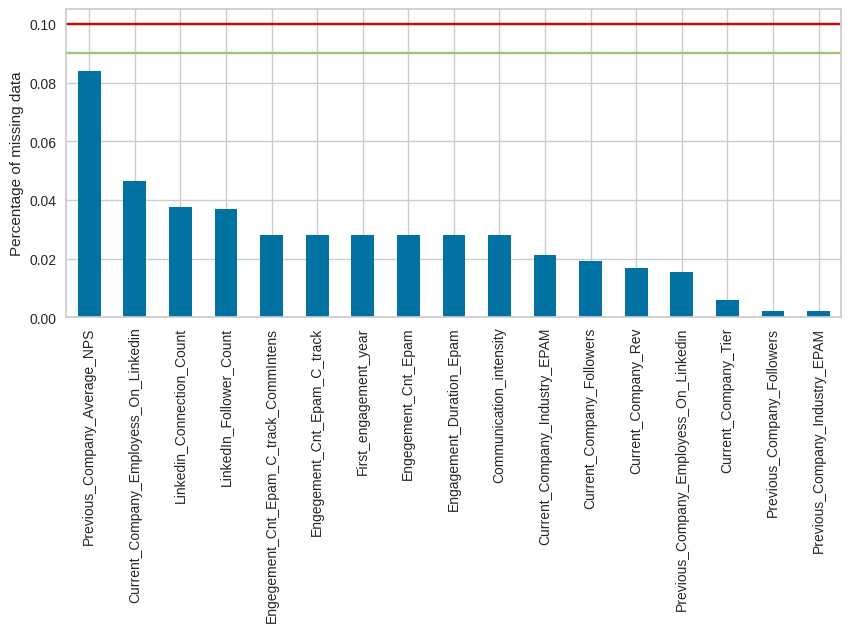

In [10]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.axhline(y=0.09, color='g', linestyle='-')

plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   LeadGen                                 1356 non-null   object
 1   LinkedIn_Profile                        1356 non-null   object
 2   LinkedIn_Follower_Count                 1306 non-null   object
 3   Linkedin_Connection_Count               1305 non-null   object
 4   Full_Name                               1356 non-null   object
 5   Searched_Email                          1356 non-null   object
 6   Previous_Seniority_Level                1356 non-null   object
 7   Current_Seniority_Level                 1356 non-null   object
 8   Previous_Company                        1356 non-null   object
 9   Previous_Company_Size                   1356 non-null   object
 10  Previous_Company_Industry_EPAM          1353 non-null   object
 11  Prev

In [12]:
data.isnull().sum()

LeadGen                                     0
LinkedIn_Profile                            0
LinkedIn_Follower_Count                    50
Linkedin_Connection_Count                  51
Full_Name                                   0
Searched_Email                              0
Previous_Seniority_Level                    0
Current_Seniority_Level                     0
Previous_Company                            0
Previous_Company_Size                       0
Previous_Company_Industry_EPAM              3
Previous_Company_Employess_On_Linkedin     21
Previous_Company_Followers                  3
Previous_Company_Parent_Cmp_exist           0
Previous_Company_Forbes                     0
Previous_Company_Average_NPS              114
Communication_intensity                    38
Engagement_Duration_Epam                   38
Engegement_Cnt_Epam                        38
First_engagement_year                      38
Seniority_Level_Of_Epam                     0
Engegement_Cnt_Epam_C_track       

In [13]:
data.isnull().values.any()

True

Missing Values counts  per Row

In [14]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    1084
1     151
2      48
6      31
3      21
7      11
5       6
4       4
dtype: int64

In [15]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

In [16]:
data["Current_Company_Tier"]

0       TIER 1
1       TIER 1
2       TIER 1
3       TIER 1
4       TIER 1
         ...  
1351    TIER 1
1352    TIER 2
1353    TIER 3
1354    TIER 3
1355    TIER 1
Name: Current_Company_Tier, Length: 1356, dtype: object

In [17]:
data.describe(include="all").T

count unique  \
LeadGen                                 1356      2   
LinkedIn_Profile                        1356   1356   
LinkedIn_Follower_Count                 1306    955   
Linkedin_Connection_Count               1305    957   
Full_Name                               1356   1353   
Searched_Email                          1356   1356   
Previous_Seniority_Level                1356      4   
Current_Seniority_Level                 1356      4   
Previous_Company                        1356    195   
Previous_Company_Size                   1356      7   
Previous_Company_Industry_EPAM          1353     13   
Previous_Company_Employess_On_Linkedin  1335    172   
Previous_Company_Followers              1353    177   
Previous_Company_Parent_Cmp_exist       1356      2   
Previous_Company_Forbes                 1356      2   
Previous_Company_Average_NPS            1242      8   
Communication_intensity                 1318    629   
Engagement_Duration_Epam                1318      6   
Engegement_Cnt_Epam                     1318     63   
First_engagement_year                   1318      6   
Seniority_Level_Of_Epam                 1356      4   
Engegement_Cnt_Epam_C_track             1318      5   
Engegement_Cnt_Epam_C_track_CommIntens  1318     33   
Current_Company                         1356   1069   
Current_Company_Size                    1356      7   
Current_Company_Employess_On_Linkedin   1293    830   
Current_Company_Followers               1330   1023   
Current_Company_Tier                    1348      3   
Current_Company_Parent_Cmp_exist        1356      2   
Current_Company_Industry_EPAM           1327     13   
Current_Company_Rev                     1333    727   
Current_Company_Forbes                  1356      2   

                                                                          top  \
LeadGen                                                                     0   
LinkedIn_Profile                        https://www.linkedin.com/in/bajjarapu   
LinkedIn_Follower_Count                                                 915.0   
Linkedin_Connection_Count                                               468.0   
Full_Name                                                        Deepak Kumar   
Searched_Email                                   bhaskar.ajjarapu@equifax.com   
Previous_Seniority_Level                                                    B   
Current_Seniority_Level                                                     B   
Previous_Company                                           Cerner Corporation   
Previous_Company_Size                                                  10001+   
Previous_Company_Industry_EPAM                                            ISV   
Previous_Company_Employess_On_Linkedin                               207773.0   
Previous_Company_Followers                                          8997155.0   
Previous_Company_Parent_Cmp_exist                                           0   
Previous_Company_Forbes                                                     0   
Previous_Company_Average_NPS                                              8.0   
Communication_intensity                                                  25.0   
Engagement_Duration_Epam                                                  2.0   
Engegement_Cnt_Epam                                                       4.0   
First_engagement_year                                                  2017.0   
Seniority_Level_Of_Epam                                                     B   
Engegement_Cnt_Epam_C_track                                               0.0   
Engegement_Cnt_Epam_C_track_CommIntens                                    0.0   
Current_Company                                          Procore Technologies   
Current_Company_Size                                                   10001+   
Current_Company_Employess_On_Linkedin                                  3906.0   
Current_Company_Followers           

**2.1** **Observations About Data**

**2.2** **Statistical Observations**

In [18]:
data[data.duplicated()].count()

LeadGen                                   0
LinkedIn_Profile                          0
LinkedIn_Follower_Count                   0
Linkedin_Connection_Count                 0
Full_Name                                 0
Searched_Email                            0
Previous_Seniority_Level                  0
Current_Seniority_Level                   0
Previous_Company                          0
Previous_Company_Size                     0
Previous_Company_Industry_EPAM            0
Previous_Company_Employess_On_Linkedin    0
Previous_Company_Followers                0
Previous_Company_Parent_Cmp_exist         0
Previous_Company_Forbes                   0
Previous_Company_Average_NPS              0
Communication_intensity                   0
Engagement_Duration_Epam                  0
Engegement_Cnt_Epam                       0
First_engagement_year                     0
Seniority_Level_Of_Epam                   0
Engegement_Cnt_Epam_C_track               0
Engegement_Cnt_Epam_C_track_Comm

No duplicated rows exits

In [19]:

print(data.LeadGen.value_counts())
print(data.LinkedIn_Profile.value_counts())
print(data.LinkedIn_Follower_Count.value_counts())
print(data.Linkedin_Connection_Count.value_counts())
print(data.Full_Name.value_counts())
print(data.Searched_Email.value_counts())
print(data.Previous_Seniority_Level.value_counts())
print(data.Current_Seniority_Level.value_counts())
print(data.Previous_Company.value_counts())
print(data.Previous_Company_Size.value_counts())
print(data.Previous_Company_Industry_EPAM.value_counts())
print(data.Previous_Company_Employess_On_Linkedin.value_counts())
print(data.Previous_Company_Followers.value_counts())
print(data.Previous_Company_Parent_Cmp_exist.value_counts())
print(data.Previous_Company_Forbes.value_counts())
print(data.Previous_Company_Average_NPS.value_counts())
print(data.Communication_intensity.value_counts())
print(data.Engagement_Duration_Epam.value_counts())
print(data.Engegement_Cnt_Epam.value_counts())
print(data.First_engagement_year.value_counts())
print(data.Seniority_Level_Of_Epam.value_counts())
print(data.Engegement_Cnt_Epam_C_track.value_counts())
print(data.Engegement_Cnt_Epam_C_track_CommIntens.value_counts())
print(data.Current_Company.value_counts())
print(data.Current_Company_Size.value_counts())
print(data.Current_Company_Employess_On_Linkedin.value_counts())
print(data.Current_Company_Followers.value_counts())
print(data.Current_Company_Tier.value_counts())
print(data.Current_Company_Parent_Cmp_exist.value_counts())
print(data.Current_Company_Industry_EPAM.value_counts())
print(data.Current_Company_Rev.value_counts())
print(data.Current_Company_Forbes.value_counts())


0    840
1    516
Name: LeadGen, dtype: int64
https://www.linkedin.com/in/bajjarapu                      1
https://www.linkedin.com/in/shakeel-sorathia-62932a6/      1
https://www.linkedin.com/in/melynda-bissmeyer-b8609123/    1
https://www.linkedin.com/in/alexandra-powell-bba29b74/     1
https://www.linkedin.com/in/joseph-h-5196323/              1
                                                          ..
https://www.linkedin.com/in/munishgupta                    1
https://www.linkedin.com/in/rodney-marable-5766b65         1
https://www.linkedin.com/in/tharney                        1
https://www.linkedin.com/in/mgescheidle                    1
https://www.linkedin.com/in/daliya-asuma-7632046/          1
Name: LinkedIn_Profile, Length: 1356, dtype: int64
915.0      6
647.0      5
319.0      5
349.0      5
608.0      5
          ..
1733.0     1
1132.0     1
1717.0     1
2189.0     1
18573.0    1
Name: LinkedIn_Follower_Count, Length: 955, dtype: int64
468.0      6
190.0      5
612.0 

In [20]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   LeadGen                                 1356 non-null   object
 1   LinkedIn_Profile                        1356 non-null   object
 2   LinkedIn_Follower_Count                 1306 non-null   object
 3   Linkedin_Connection_Count               1305 non-null   object
 4   Full_Name                               1356 non-null   object
 5   Searched_Email                          1356 non-null   object
 6   Previous_Seniority_Level                1356 non-null   object
 7   Current_Seniority_Level                 1356 non-null   object
 8   Previous_Company                        1356 non-null   object
 9   Previous_Company_Size                   1356 non-null   object
 10  Previous_Company_Industry_EPAM          1353 non-null   object
 11  Prev

In [22]:
data.head(3)

LeadGen                                  LinkedIn_Profile  \
0       1             https://www.linkedin.com/in/bajjarapu   
1       1  https://www.linkedin.com/in/kat-ashford-87383222   
2       1  https://www.linkedin.com/in/usha-karnala-966120a   

  LinkedIn_Follower_Count Linkedin_Connection_Count         Full_Name  \
0                  1210.0                    1220.0  Bhaskar Ajjarapu   
1                   642.0                     629.0       Kat Ashford   
2                   810.0                     808.0      Usha Karnala   

                  Searched_Email Previous_Seniority_Level  \
0   bhaskar.ajjarapu@equifax.com                        C   
1  katherine.ashford@equifax.com                        C   
2       usha.karnala@equifax.com                        B   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       B          Equifax                10001+   

  Previous_Company_Industry_EPAM Previous_Company_Employess_On_Linkedin  \
0                             FS                                14124.0   
1                             FS                                14124.0   
2                             FS                                14124.0   

  Previous_Company_Followers Previous_Company_Parent_Cmp_exist  \
0                   173891.0                                 0   
1                   173891.0                                 0   
2                   173891.0                                 0   

  Previous_Company_Forbes Previous_Company_Average_NPS  \
0                       1                          8.0   
1                       1                          8.0   
2                       1                          8.0   

  Communication_intensity Engagement_Duration_Epam Engegement_Cnt_Epam  \
0                    13.0                      1.0                 2.0   
1                   402.0                      1.0                14.0   
2                  1892.0                      2.0                24.0   

  First_engagement_year Seniority_Level_Of_Epam Engegement_Cnt_Epam_C_track  \
0                2019.0                       C                         1.0   
1                2019.0                       B                         0.0   
2                2020.0                       B                         0.0   

  Engegement_Cnt_Epam_C_track_CommIntens      Current_Company  \
0                                    3.0              Shopify   
1                                    0.0  Centene Corporation   
2                                    0.0        Floor & Decor   

  Current_Company_Size Current_Company_Employess_On_Linkedin  \
0               10001+                               16747.0   
1               10001+                               28158.0   
2           5001-10000                                5238.0   

  Current_Company_Followers Current_Company_Tier  \
0                  713684.0               TIER 1   
1                  196232.0               TIER 1   
2                   45063.0               TIER 1   

  Current_Company_Parent_Cmp_exist Current_Company_Industry_EPAM  \
0                                0                           ISV   
1                                0                            HC   
2                                0                           CPG   

  Current_Company_Rev Current_Company_Forbes  
0              4611.9                      1  
1             74000.0                      0  
2              3433.5                      0

Type Casting the Data since all Features comes within String Format

In [23]:
data["LeadGen"]=data["LeadGen"].astype(int)

In [24]:
data["LinkedIn_Follower_Count"]=data["LinkedIn_Follower_Count"].astype(float)

In [25]:
data["Linkedin_Connection_Count"]=data["Linkedin_Connection_Count"].astype(float)

In [26]:
data["Previous_Company_Employess_On_Linkedin"]=data["Previous_Company_Employess_On_Linkedin"].astype(float)

In [27]:
data["Previous_Company_Followers"]=data["Previous_Company_Followers"].astype(float)

In [28]:
data["Previous_Company_Parent_Cmp_exist"]=data["Previous_Company_Parent_Cmp_exist"].astype(int)

In [29]:
data["Current_Company_Employess_On_Linkedin"]=data["Current_Company_Employess_On_Linkedin"].astype(float)

In [30]:
data["Current_Company_Followers"]=data["Current_Company_Followers"].astype(float)

In [31]:
data["Current_Company_Rev"]=data["Current_Company_Rev"].astype(float)

In [32]:
data["Current_Company_Parent_Cmp_exist"]=data["Current_Company_Parent_Cmp_exist"].astype(int)

In [33]:
data["Engegement_Cnt_Epam"]=data["Engegement_Cnt_Epam"].astype(float)

In [34]:
data["Communication_intensity"]=data["Communication_intensity"].astype(float)

In [35]:
data["Engagement_Duration_Epam"]=data["Engagement_Duration_Epam"].astype(float)

In [36]:
data["Engegement_Cnt_Epam_C_track_CommIntens"]=data["Engegement_Cnt_Epam_C_track_CommIntens"].astype(float)

In [37]:
data["Engegement_Cnt_Epam_C_track"]=data["Engegement_Cnt_Epam_C_track"].astype(float)

In [38]:
data["Previous_Company_Forbes"]=data["Previous_Company_Forbes"].astype(int)

In [39]:
data["Current_Company_Forbes"]=data["Current_Company_Forbes"].astype(int)

In [40]:
data["Previous_Company_Average_NPS"]=data["Previous_Company_Average_NPS"].astype(float)

In [41]:
data["First_engagement_year"]=data["First_engagement_year"].astype(float)

In [42]:
num_cols=data.select_dtypes(include=np.number).columns.tolist()

In [43]:
num_cols

['LeadGen',
 'LinkedIn_Follower_Count',
 'Linkedin_Connection_Count',
 'Previous_Company_Employess_On_Linkedin',
 'Previous_Company_Followers',
 'Previous_Company_Parent_Cmp_exist',
 'Previous_Company_Forbes',
 'Previous_Company_Average_NPS',
 'Communication_intensity',
 'Engagement_Duration_Epam',
 'Engegement_Cnt_Epam',
 'First_engagement_year',
 'Engegement_Cnt_Epam_C_track',
 'Engegement_Cnt_Epam_C_track_CommIntens',
 'Current_Company_Employess_On_Linkedin',
 'Current_Company_Followers',
 'Current_Company_Parent_Cmp_exist',
 'Current_Company_Rev',
 'Current_Company_Forbes']

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LeadGen                                 1356 non-null   int64  
 1   LinkedIn_Profile                        1356 non-null   object 
 2   LinkedIn_Follower_Count                 1306 non-null   float64
 3   Linkedin_Connection_Count               1305 non-null   float64
 4   Full_Name                               1356 non-null   object 
 5   Searched_Email                          1356 non-null   object 
 6   Previous_Seniority_Level                1356 non-null   object 
 7   Current_Seniority_Level                 1356 non-null   object 
 8   Previous_Company                        1356 non-null   object 
 9   Previous_Company_Size                   1356 non-null   object 
 10  Previous_Company_Industry_EPAM          1353 non-null   obje

##3-EXPLOTARY DATA ANALYSIS

**3.1-Univarity DATA ANALYSIS**

In [45]:
data_EDA=data.copy()

In [46]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

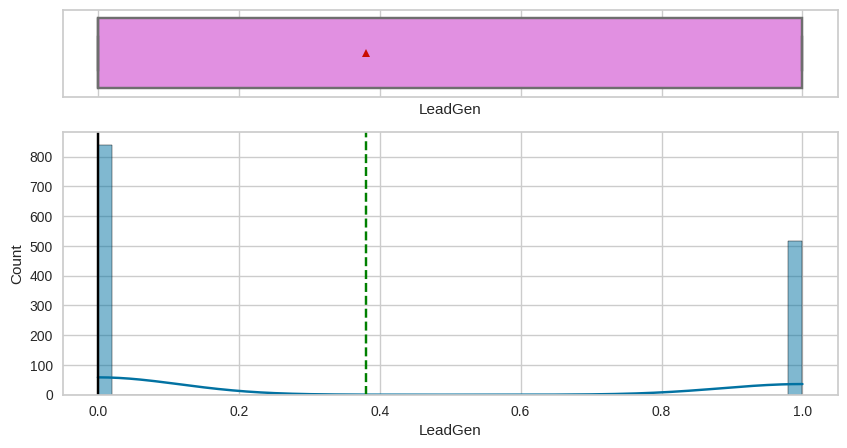

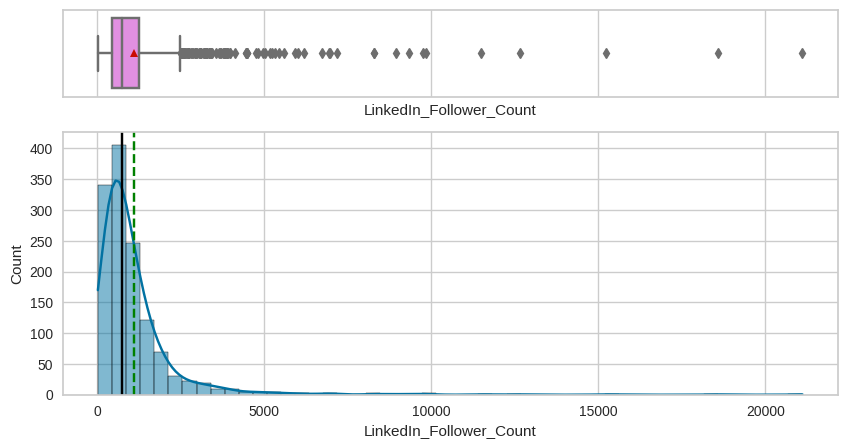

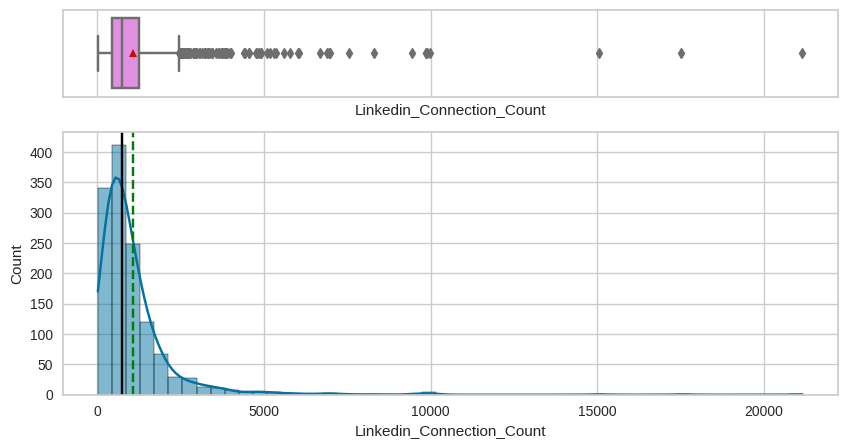

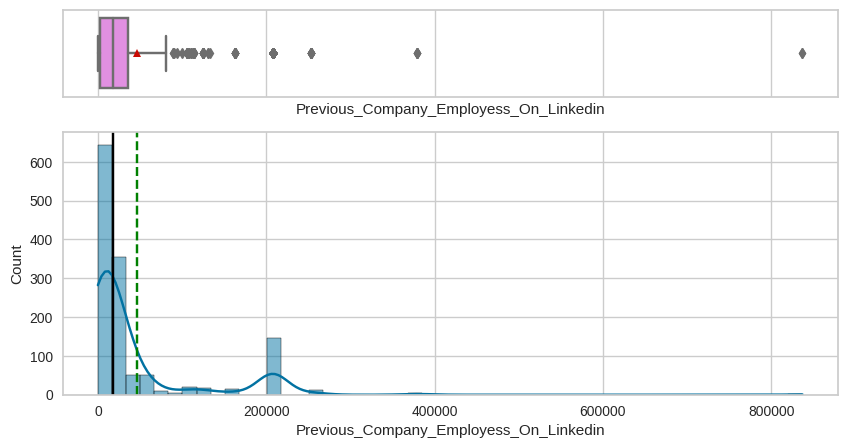

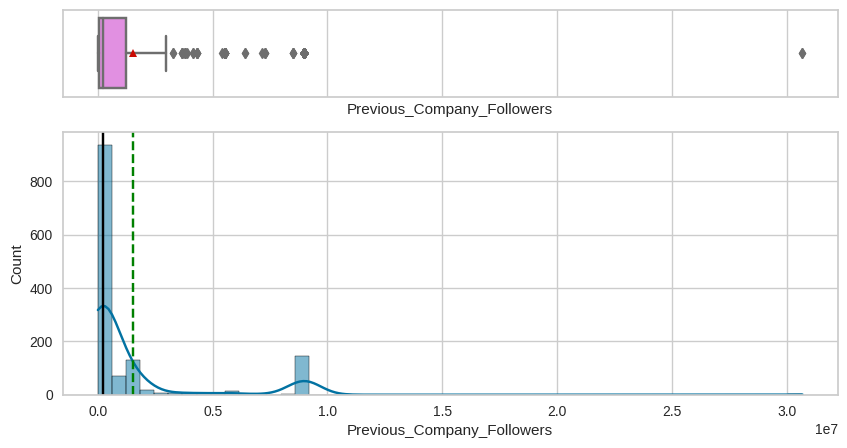

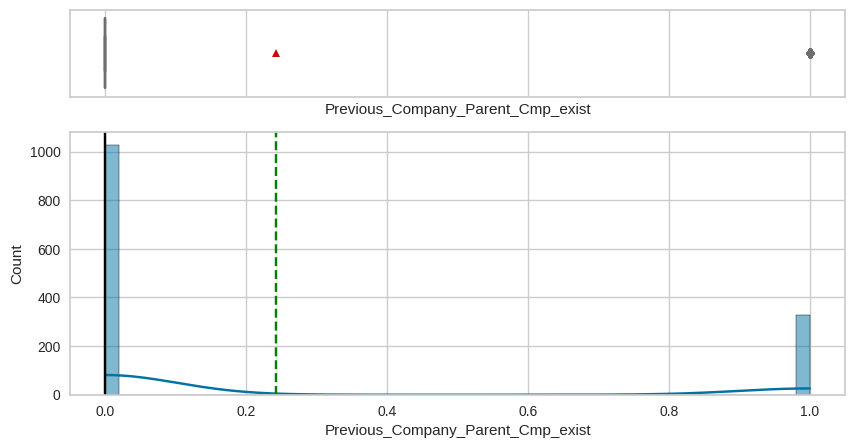

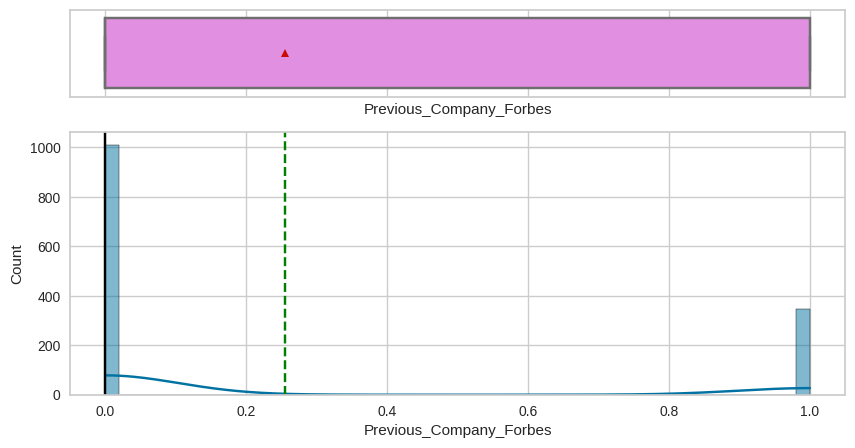

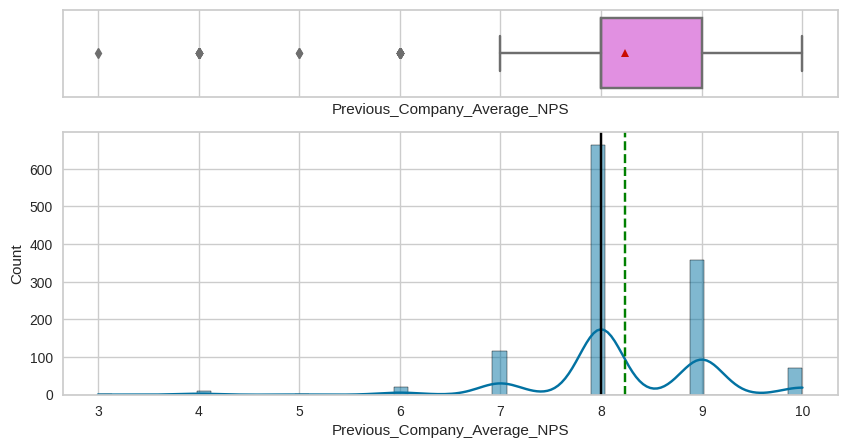

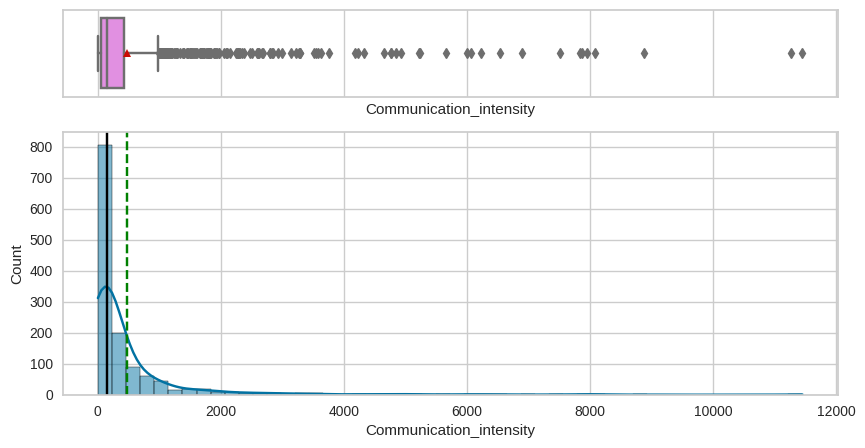

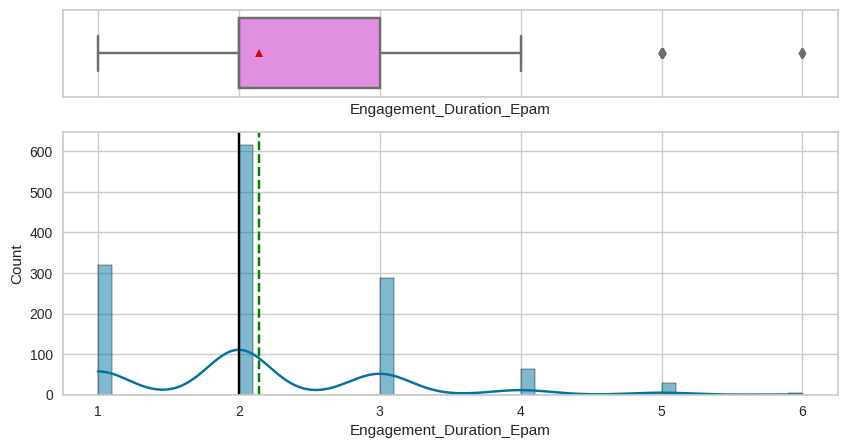

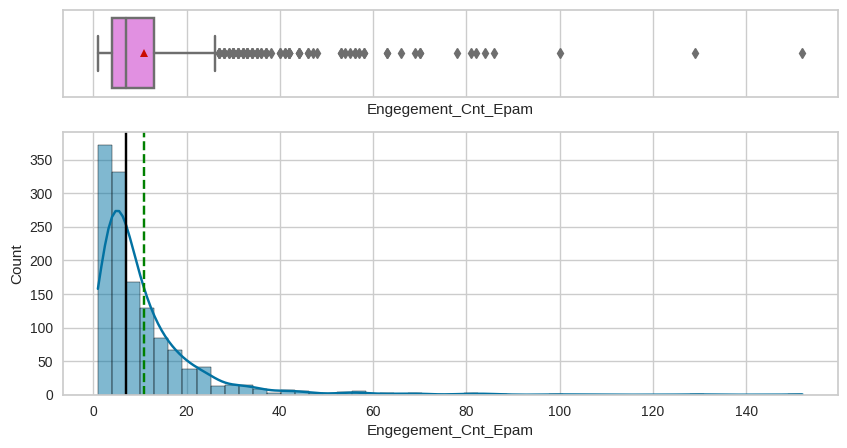

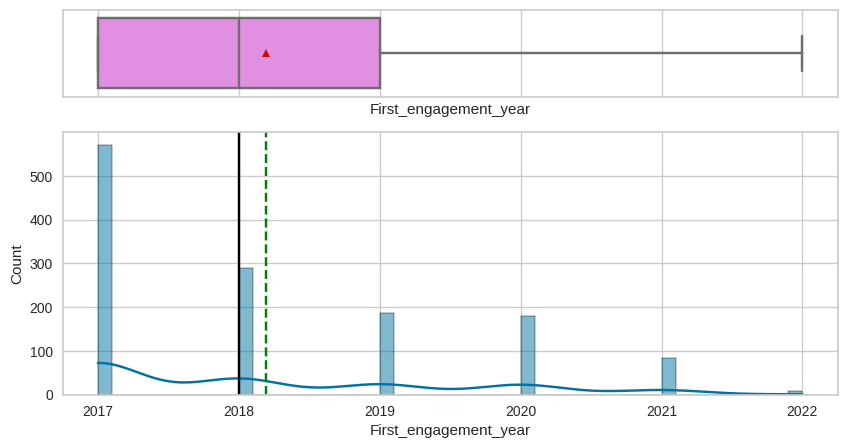

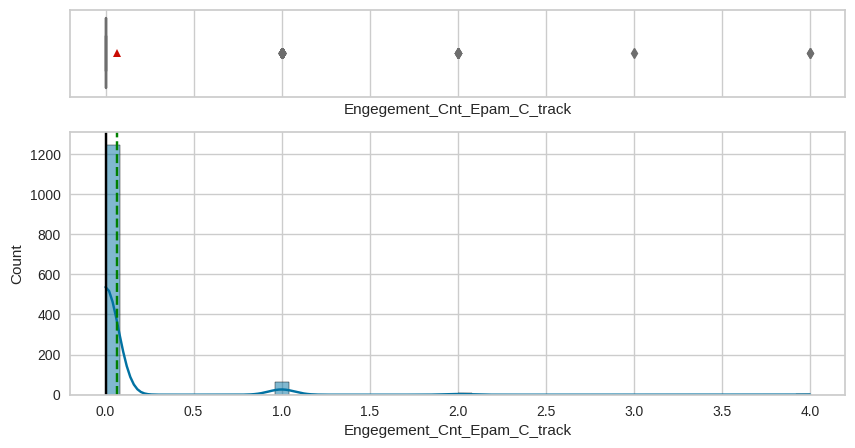

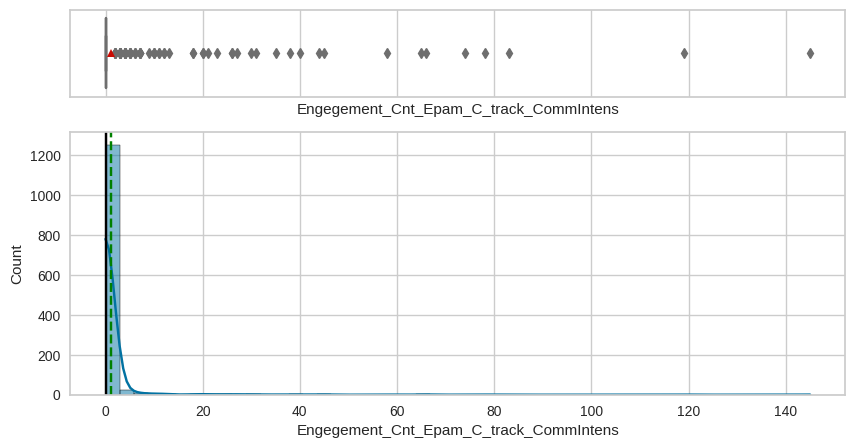

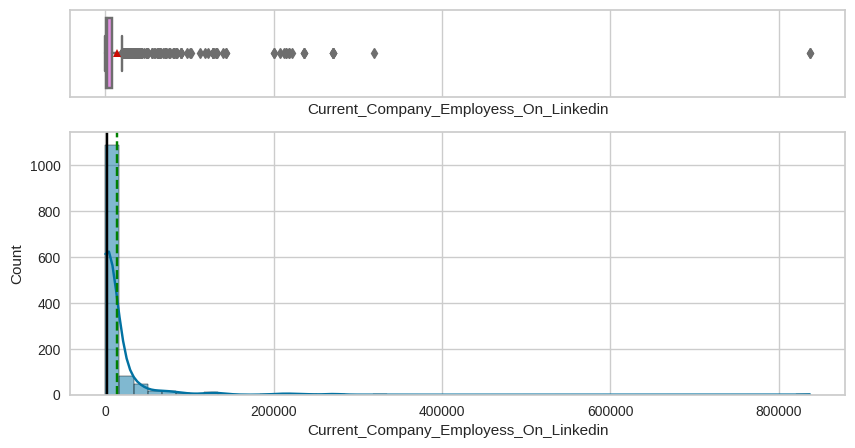

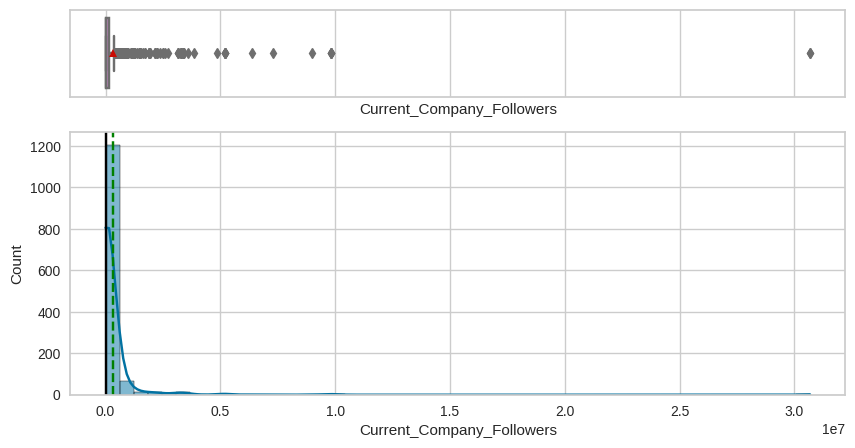

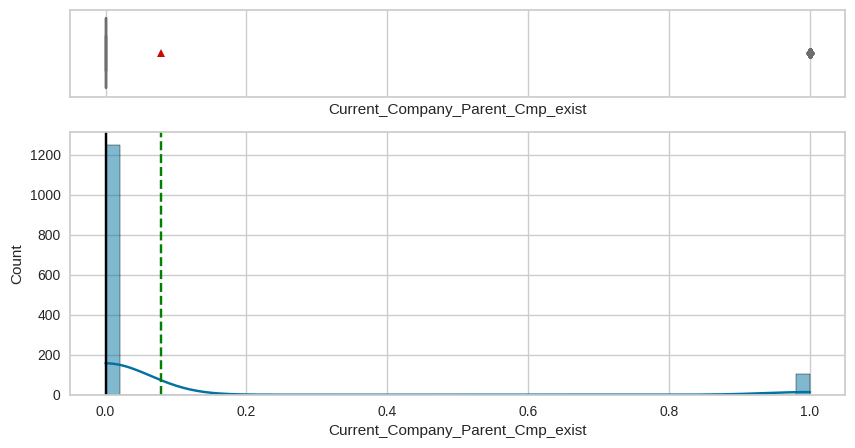

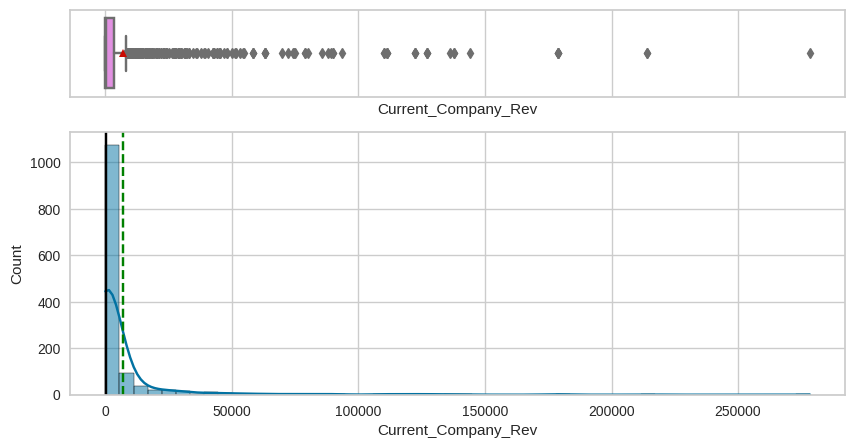

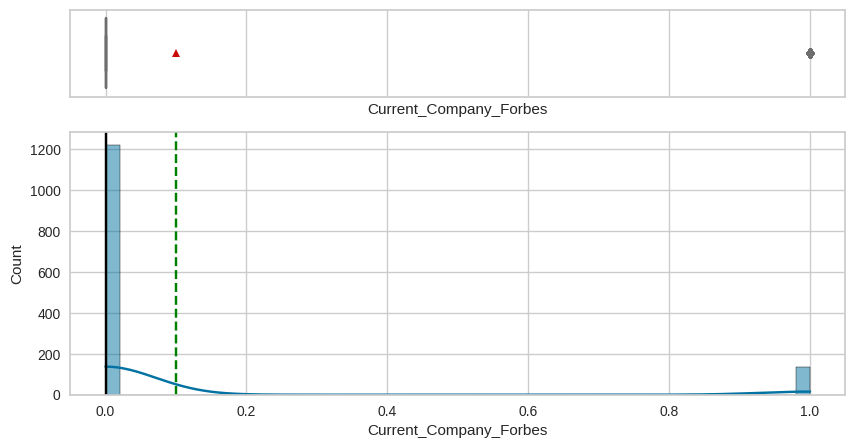

In [47]:
# selecting numerical columns
num_cols = data_EDA.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

**3.1** **UNIVARITY ANALYZES**

In [48]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data:    dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [49]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [50]:
num_cols

['LeadGen',
 'LinkedIn_Follower_Count',
 'Linkedin_Connection_Count',
 'Previous_Company_Employess_On_Linkedin',
 'Previous_Company_Followers',
 'Previous_Company_Parent_Cmp_exist',
 'Previous_Company_Forbes',
 'Previous_Company_Average_NPS',
 'Communication_intensity',
 'Engagement_Duration_Epam',
 'Engegement_Cnt_Epam',
 'First_engagement_year',
 'Engegement_Cnt_Epam_C_track',
 'Engegement_Cnt_Epam_C_track_CommIntens',
 'Current_Company_Employess_On_Linkedin',
 'Current_Company_Followers',
 'Current_Company_Parent_Cmp_exist',
 'Current_Company_Rev',
 'Current_Company_Forbes']

3.1.0 LeadGen

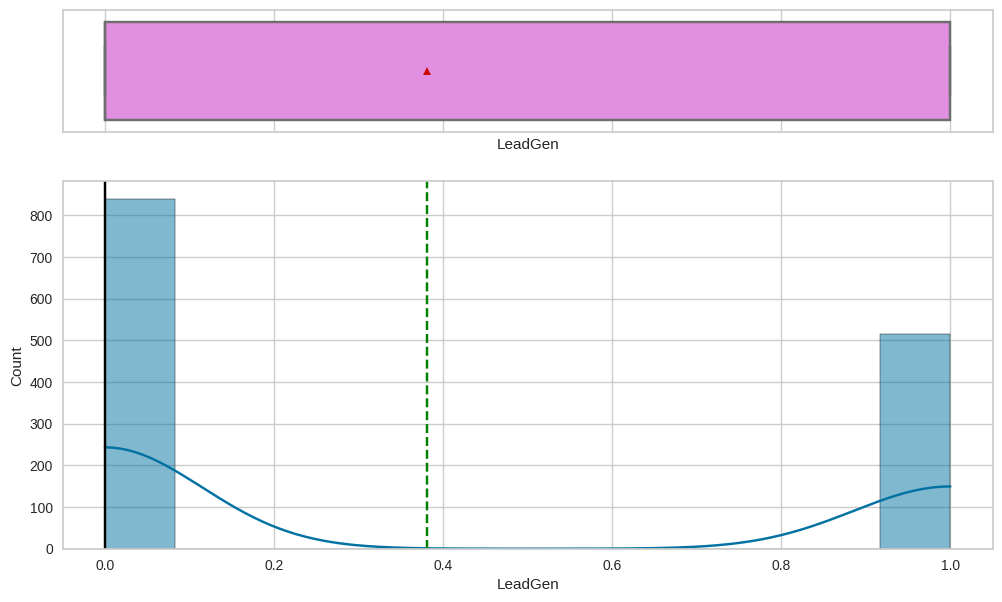

In [51]:
histogram_boxplot(data_EDA,"LeadGen",kde=True)

3.1.1 **LinkedIn Follower Count**

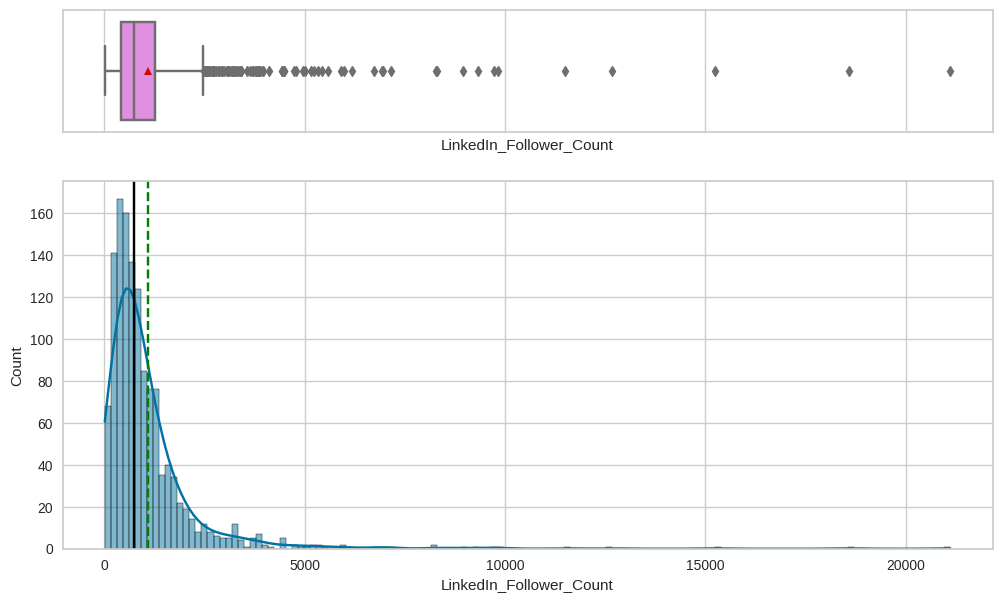

In [52]:
histogram_boxplot(data_EDA,"LinkedIn_Follower_Count",kde=True)

In [53]:
data_EDA["LinkedIn_Follower_Count"].mean()

1092.0819295558958

In [54]:
data_EDA["LinkedIn_Follower_Count"].median()

743.5

3.1.2 **LinkedIn Connection Count**

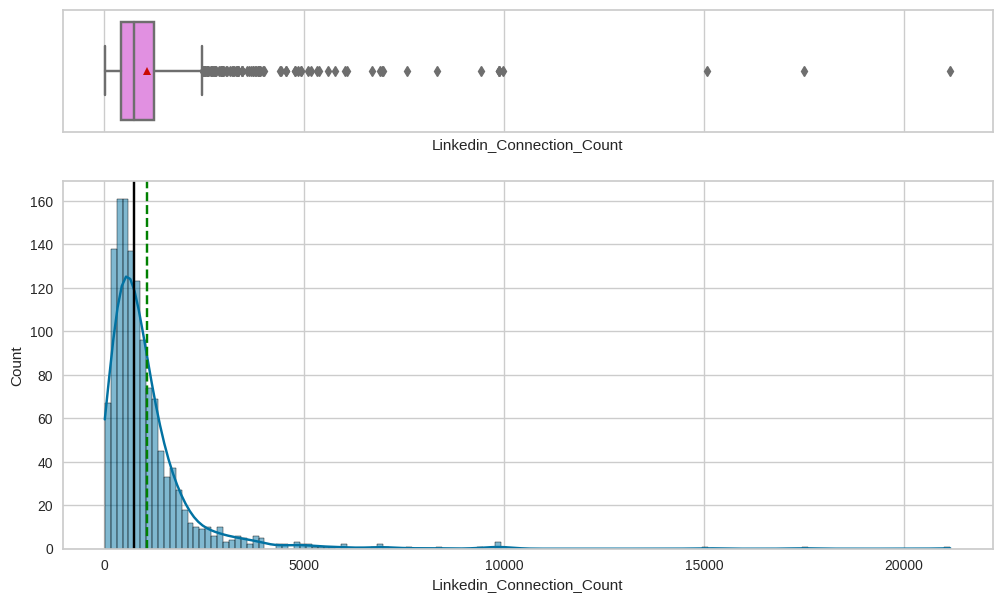

In [55]:
histogram_boxplot(data_EDA,"Linkedin_Connection_Count",kde=True)

In [56]:
data_EDA["Linkedin_Connection_Count"].mean()

1068.4429118773946

In [57]:
data_EDA["Linkedin_Connection_Count"].median()

735.0

3.1.3 **Previous_Company_Employess_On_Linkedin**

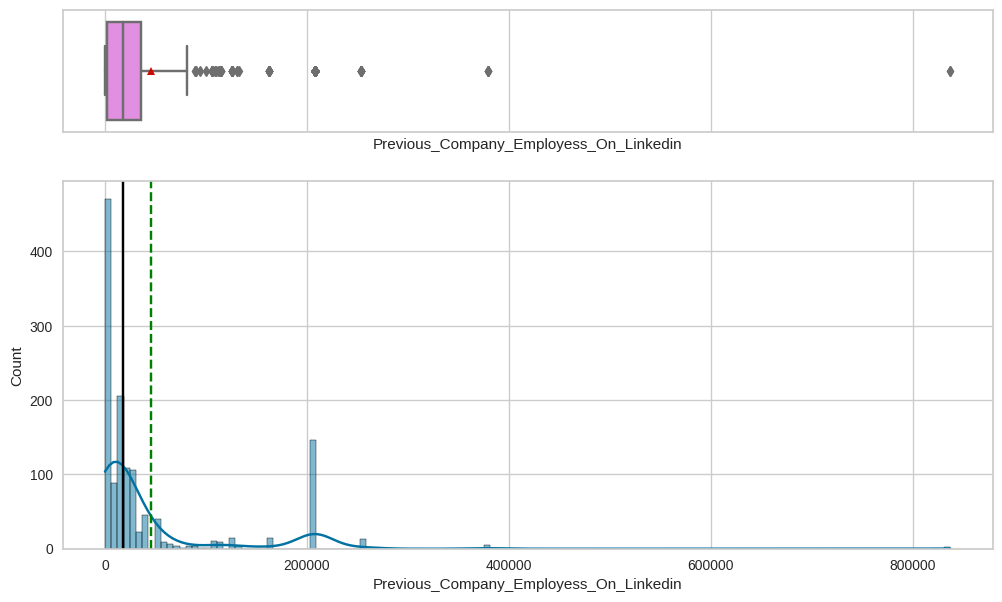

In [58]:
histogram_boxplot(data_EDA,"Previous_Company_Employess_On_Linkedin",kde=True)

In [59]:
data_EDA["Previous_Company_Employess_On_Linkedin"].mean()

45966.66591760299

In [60]:
data_EDA["Previous_Company_Employess_On_Linkedin"].median()

17426.0

3.1.3 **Previous_Company_Followers**

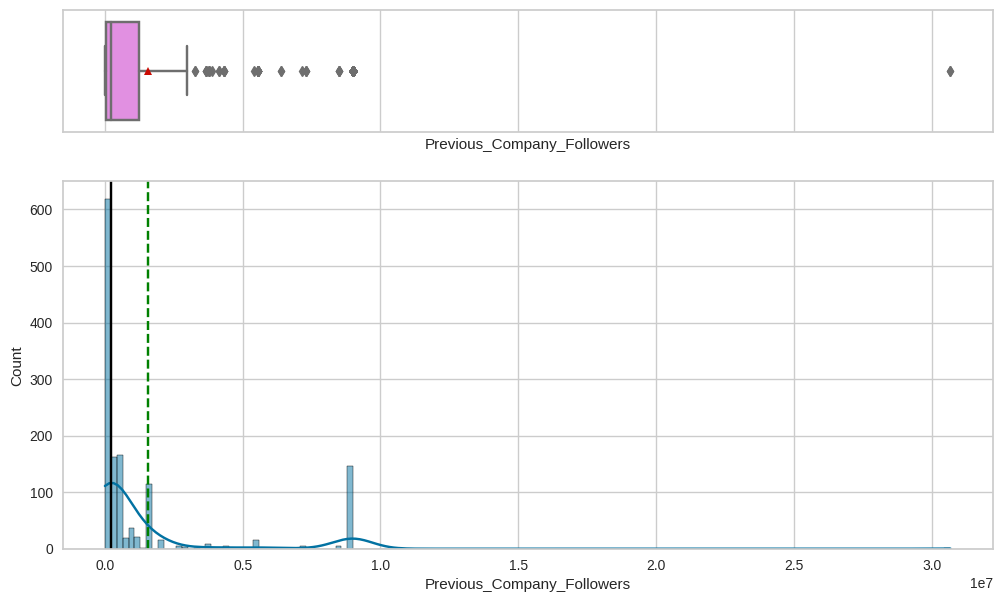

In [61]:
histogram_boxplot(data_EDA,"Previous_Company_Followers",kde=True)

In [62]:
data_EDA["Previous_Company_Followers"].mean()

1549202.2616407983

In [63]:
data_EDA["Previous_Company_Followers"].median()

233155.0

3.1.4 **Current_Company_Employess_On_Linkedin**

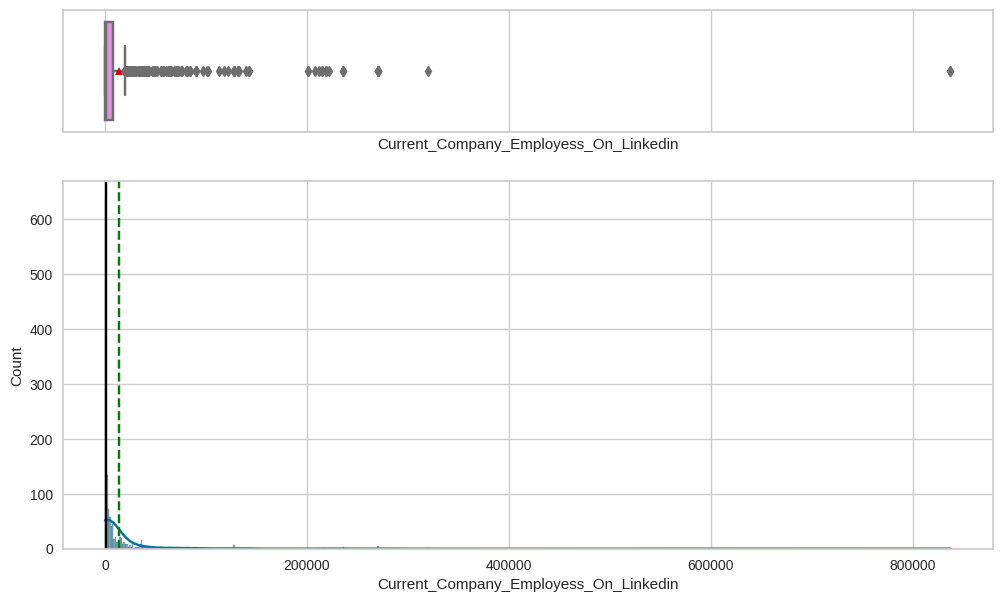

In [64]:
histogram_boxplot(data_EDA,"Current_Company_Employess_On_Linkedin",kde=True)

In [65]:
data_EDA["Current_Company_Employess_On_Linkedin"].mean()

13661.549110595513

In [66]:
data_EDA["Current_Company_Employess_On_Linkedin"].median()

1449.0

3.1.5 **Current_Company_Followers**

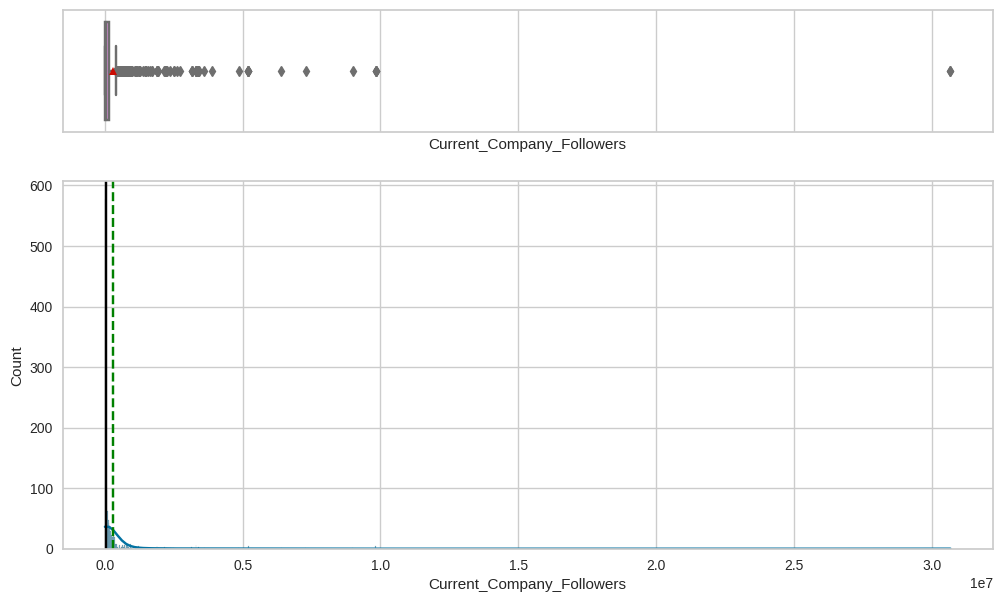

In [67]:
histogram_boxplot(data_EDA,"Current_Company_Followers",kde=True)

In [68]:
data_EDA["Current_Company_Followers"].mean()

308508.36917293235

In [69]:
data_EDA["Current_Company_Followers"].median()

39855.5

3.1.5 **Engegement_Cnt_Epam**

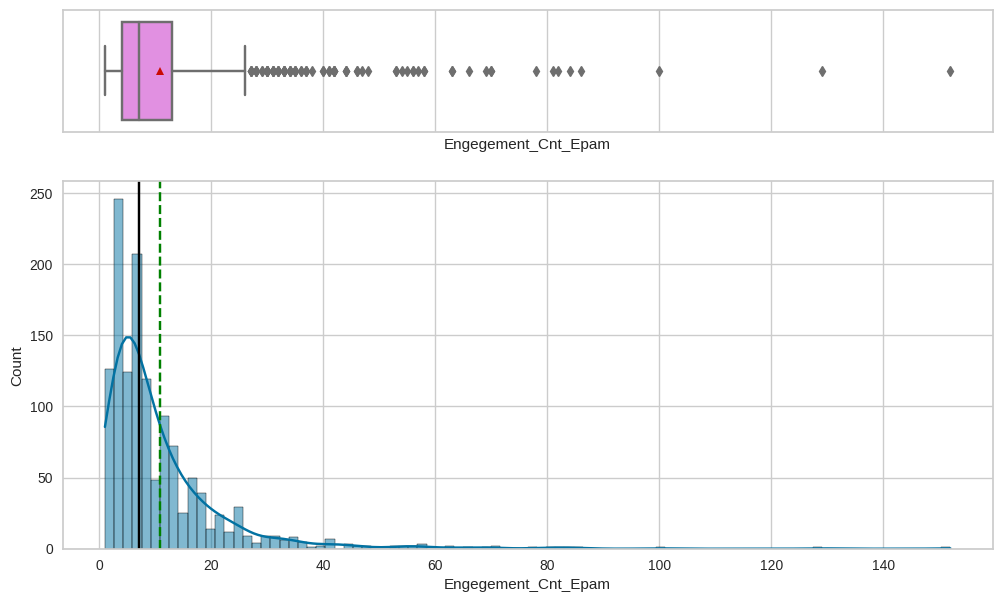

In [70]:
histogram_boxplot(data_EDA,"Engegement_Cnt_Epam",kde=True)

In [71]:
data_EDA["Engegement_Cnt_Epam"].mean()

10.805007587253414

In [72]:
data_EDA["Engegement_Cnt_Epam"].median()

7.0

3.1.6 **Communication_intensity**

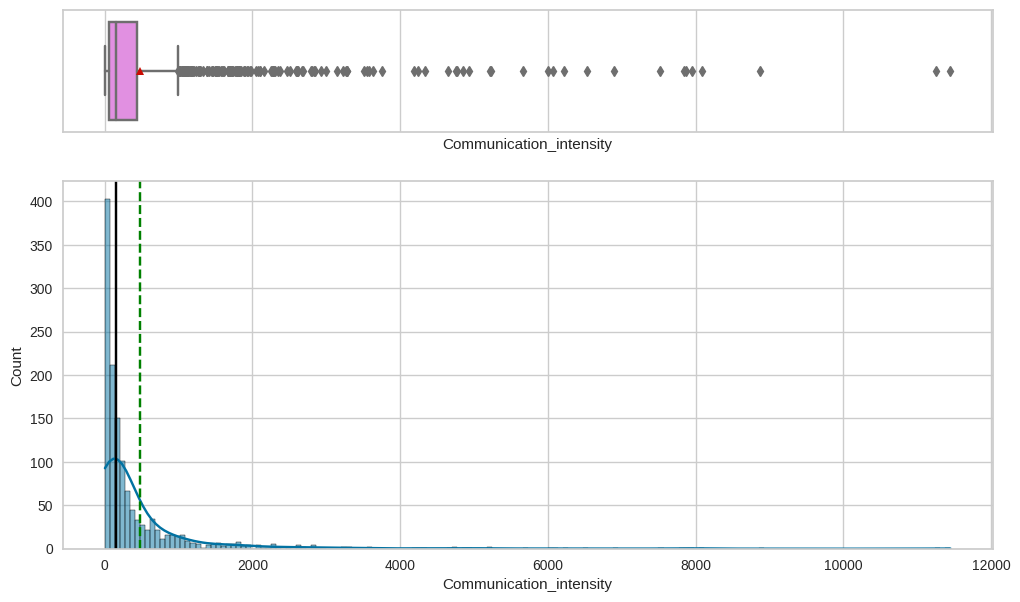

In [73]:
histogram_boxplot(data_EDA,"Communication_intensity",kde=True)

In [74]:
data_EDA["Communication_intensity"].mean()

476.76934749620636

In [75]:
data_EDA["Communication_intensity"].median()

157.5

3.1.7 **First Engagement Year**

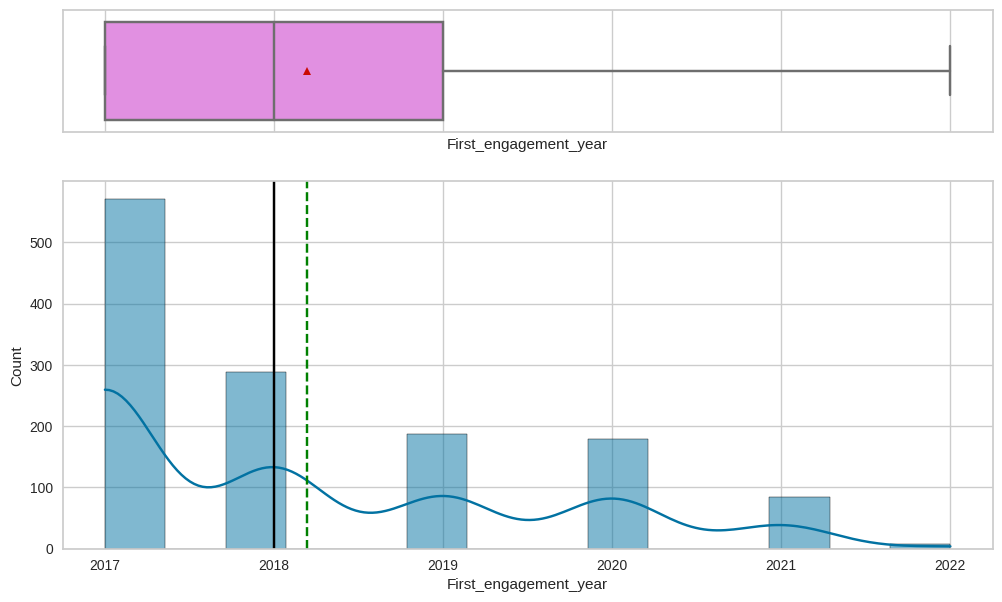

In [76]:
histogram_boxplot(data_EDA,"First_engagement_year",kde=True)

In [77]:
data_EDA["First_engagement_year"].mean()

2018.195751138088

In [78]:
data_EDA["First_engagement_year"].mean()

2018.195751138088

3.1.8 **Engagement_Duration_Epam**

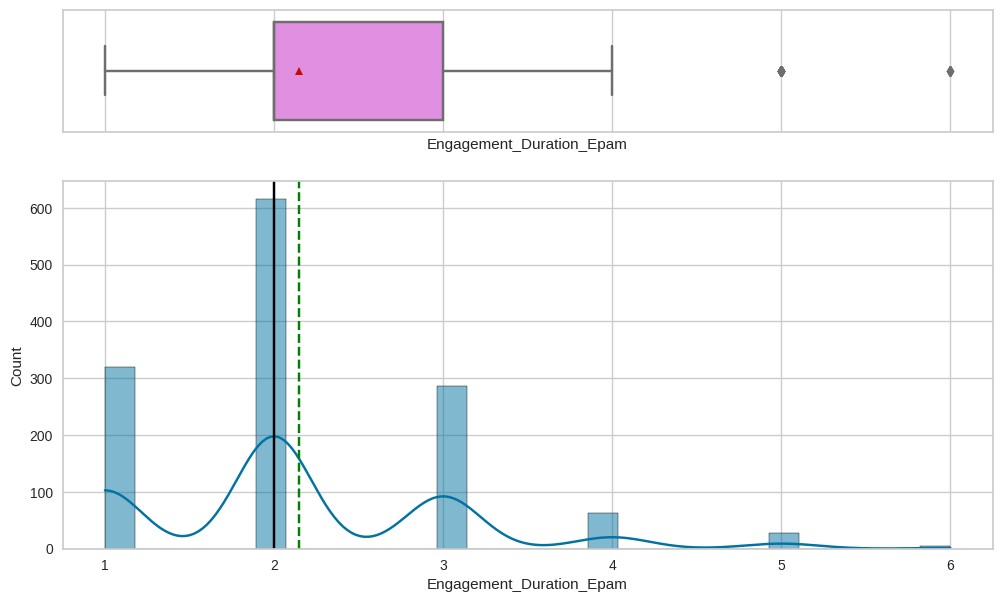

In [79]:
histogram_boxplot(data_EDA,"Engagement_Duration_Epam",kde=True)

In [80]:
data.head()

LeadGen                                  LinkedIn_Profile  \
0        1             https://www.linkedin.com/in/bajjarapu   
1        1  https://www.linkedin.com/in/kat-ashford-87383222   
2        1  https://www.linkedin.com/in/usha-karnala-966120a   
3        1           https://www.linkedin.com/in/stevegillam   
4        0      https://www.linkedin.com/in/mitesh-patel-mba   

   LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                   1210.0                     1220.0  Bhaskar Ajjarapu   
1                    642.0                      629.0       Kat Ashford   
2                    810.0                      808.0      Usha Karnala   
3                   3892.0                     3899.0      Steve Gillam   
4                    741.0                      738.0      Mitesh Patel   

                  Searched_Email Previous_Seniority_Level  \
0   bhaskar.ajjarapu@equifax.com                        C   
1  katherine.ashford@equifax.com                        C   
2       usha.karnala@equifax.com                        B   
3       steve.gillam@equifax.com                        C   
4       mitesh.patel@equifax.com                        C   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       B          Equifax                10001+   
3                       C          Equifax                10001+   
4                       C          Equifax                10001+   

  Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                             FS                                 14124.0   
1                             FS                                 14124.0   
2                             FS                                 14124.0   
3                             FS                                 14124.0   
4                             FS                                 14124.0   

   Previous_Company_Followers  Previous_Company_Parent_Cmp_exist  \
0                    173891.0                                  0   
1                    173891.0                                  0   
2                    173891.0                                  0   
3                    173891.0                                  0   
4                    173891.0                                  0   

   Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                        1                           8.0   
1                        1                           8.0   
2                        1                           8.0   
3                        1                           8.0   
4                        1                           8.0   

   Communication_intensity  Engagement_Duration_Epam  Engegement_Cnt_Epam  \
0                     13.0                       1.0                  2.0   
1                    402.0                       1.0                 14.0   
2                   1892.0                       2.0                 24.0   
3                    132.0                       2.0                  7.0   
4                    176.0                       1.0                 11.0   

   First_engagement_year Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track  \
0                 2019.0                       C                          1.0   
1                 2019.0                       B                          0.0   
2                 2020.0                       B                          0.0   
3                 2019.0                       B                          0.0   
4                 2019.0                       C                          1.0   

   Engegement_Cnt_Epam_C_track_CommIntens      Current_Company  \
0                                     3.0              Shopify   
1                                     0.0  Centene Corporation   
2               

In [81]:
data_EDA["Engagement_Duration_Epam"].mean()

2.146433990895296

In [82]:
data_EDA["Engagement_Duration_Epam"].median()

2.0

3.1.9 **Engegement_Cnt_Epam_C_track_CommIntens**

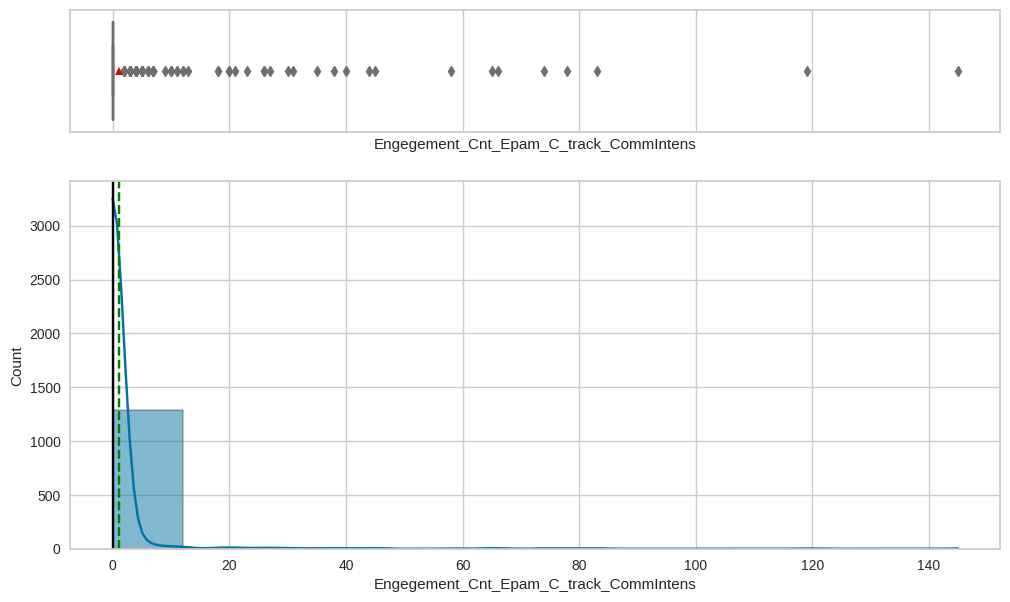

In [83]:
histogram_boxplot(data_EDA,"Engegement_Cnt_Epam_C_track_CommIntens",kde=True)

In [84]:
data_EDA["Engegement_Cnt_Epam_C_track_CommIntens"].mean()

1.0690440060698028

In [85]:
data_EDA["Engegement_Cnt_Epam_C_track_CommIntens"].median()

0.0

3.1.10 **Engegement_Cnt_Epam_C_track**

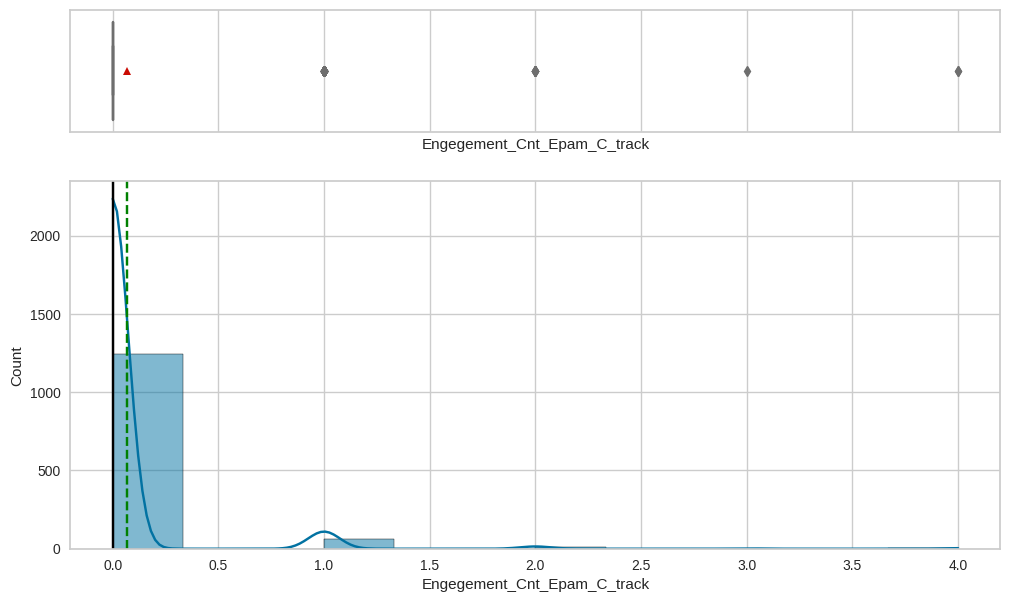

In [86]:
histogram_boxplot(data_EDA,"Engegement_Cnt_Epam_C_track",kde=True)

In [87]:
data_EDA["Engegement_Cnt_Epam_C_track"].mean()

0.06676783004552352

In [88]:
data_EDA["Engegement_Cnt_Epam_C_track"].median()

0.0

3.1.11 **Current_Company_Forbes**

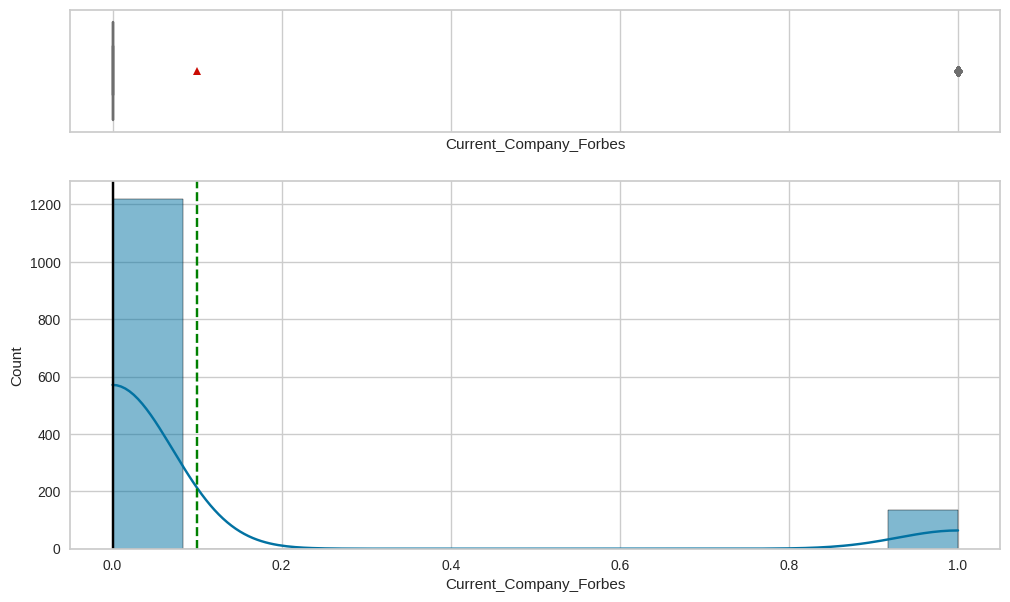

In [89]:
histogram_boxplot(data_EDA,"Current_Company_Forbes",kde=True)

In [90]:
data_EDA["Current_Company_Forbes"].mean()

0.10029498525073746

In [91]:
data_EDA["Current_Company_Forbes"].median()

0.0

In [92]:
data_EDA.head()

LeadGen                                  LinkedIn_Profile  \
0        1             https://www.linkedin.com/in/bajjarapu   
1        1  https://www.linkedin.com/in/kat-ashford-87383222   
2        1  https://www.linkedin.com/in/usha-karnala-966120a   
3        1           https://www.linkedin.com/in/stevegillam   
4        0      https://www.linkedin.com/in/mitesh-patel-mba   

   LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                   1210.0                     1220.0  Bhaskar Ajjarapu   
1                    642.0                      629.0       Kat Ashford   
2                    810.0                      808.0      Usha Karnala   
3                   3892.0                     3899.0      Steve Gillam   
4                    741.0                      738.0      Mitesh Patel   

                  Searched_Email Previous_Seniority_Level  \
0   bhaskar.ajjarapu@equifax.com                        C   
1  katherine.ashford@equifax.com                        C   
2       usha.karnala@equifax.com                        B   
3       steve.gillam@equifax.com                        C   
4       mitesh.patel@equifax.com                        C   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       B          Equifax                10001+   
3                       C          Equifax                10001+   
4                       C          Equifax                10001+   

  Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                             FS                                 14124.0   
1                             FS                                 14124.0   
2                             FS                                 14124.0   
3                             FS                                 14124.0   
4                             FS                                 14124.0   

   Previous_Company_Followers  Previous_Company_Parent_Cmp_exist  \
0                    173891.0                                  0   
1                    173891.0                                  0   
2                    173891.0                                  0   
3                    173891.0                                  0   
4                    173891.0                                  0   

   Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                        1                           8.0   
1                        1                           8.0   
2                        1                           8.0   
3                        1                           8.0   
4                        1                           8.0   

   Communication_intensity  Engagement_Duration_Epam  Engegement_Cnt_Epam  \
0                     13.0                       1.0                  2.0   
1                    402.0                       1.0                 14.0   
2                   1892.0                       2.0                 24.0   
3                    132.0                       2.0                  7.0   
4                    176.0                       1.0                 11.0   

   First_engagement_year Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track  \
0                 2019.0                       C                          1.0   
1                 2019.0                       B                          0.0   
2                 2020.0                       B                          0.0   
3                 2019.0                       B                          0.0   
4                 2019.0                       C                          1.0   

   Engegement_Cnt_Epam_C_track_CommIntens      Current_Company  \
0                                     3.0              Shopify   
1                                     0.0  Centene Corporation   
2               

In [93]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**3.2** **BIVARIATE ANALYSIS**

In [94]:
data_EDA.head()

LeadGen                                  LinkedIn_Profile  \
0        1             https://www.linkedin.com/in/bajjarapu   
1        1  https://www.linkedin.com/in/kat-ashford-87383222   
2        1  https://www.linkedin.com/in/usha-karnala-966120a   
3        1           https://www.linkedin.com/in/stevegillam   
4        0      https://www.linkedin.com/in/mitesh-patel-mba   

   LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                   1210.0                     1220.0  Bhaskar Ajjarapu   
1                    642.0                      629.0       Kat Ashford   
2                    810.0                      808.0      Usha Karnala   
3                   3892.0                     3899.0      Steve Gillam   
4                    741.0                      738.0      Mitesh Patel   

                  Searched_Email Previous_Seniority_Level  \
0   bhaskar.ajjarapu@equifax.com                        C   
1  katherine.ashford@equifax.com                        C   
2       usha.karnala@equifax.com                        B   
3       steve.gillam@equifax.com                        C   
4       mitesh.patel@equifax.com                        C   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       B          Equifax                10001+   
3                       C          Equifax                10001+   
4                       C          Equifax                10001+   

  Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                             FS                                 14124.0   
1                             FS                                 14124.0   
2                             FS                                 14124.0   
3                             FS                                 14124.0   
4                             FS                                 14124.0   

   Previous_Company_Followers  Previous_Company_Parent_Cmp_exist  \
0                    173891.0                                  0   
1                    173891.0                                  0   
2                    173891.0                                  0   
3                    173891.0                                  0   
4                    173891.0                                  0   

   Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                        1                           8.0   
1                        1                           8.0   
2                        1                           8.0   
3                        1                           8.0   
4                        1                           8.0   

   Communication_intensity  Engagement_Duration_Epam  Engegement_Cnt_Epam  \
0                     13.0                       1.0                  2.0   
1                    402.0                       1.0                 14.0   
2                   1892.0                       2.0                 24.0   
3                    132.0                       2.0                  7.0   
4                    176.0                       1.0                 11.0   

   First_engagement_year Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track  \
0                 2019.0                       C                          1.0   
1                 2019.0                       B                          0.0   
2                 2020.0                       B                          0.0   
3                 2019.0                       B                          0.0   
4                 2019.0                       C                          1.0   

   Engegement_Cnt_Epam_C_track_CommIntens      Current_Company  \
0                                     3.0              Shopify   
1                                     0.0  Centene Corporation   
2               

In [95]:
data_heatmap=data_EDA

In [96]:
#data_heatmap = data_heatmap.drop(["Previous_Company_Parent_Cmp_exist"], axis=1)

In [97]:
data_heatmap

LeadGen                                   LinkedIn_Profile  \
0           1              https://www.linkedin.com/in/bajjarapu   
1           1   https://www.linkedin.com/in/kat-ashford-87383222   
2           1   https://www.linkedin.com/in/usha-karnala-966120a   
3           1            https://www.linkedin.com/in/stevegillam   
4           0       https://www.linkedin.com/in/mitesh-patel-mba   
...       ...                                                ...   
1351        1  https://www.linkedin.com/in/lan-anh-nguyen-678...   
1352        0  https://www.linkedin.com/in/priya-almelkar-17a...   
1353        0   https://www.linkedin.com/in/jan-mikrut-09667712/   
1354        0  https://www.linkedin.com/in/brian-tehako-38002...   
1355        1  https://www.linkedin.com/in/daliya-asuma-7632046/   

      LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                      1210.0                     1220.0  Bhaskar Ajjarapu   
1                       642.0                      629.0       Kat Ashford   
2                       810.0                      808.0      Usha Karnala   
3                      3892.0                     3899.0      Steve Gillam   
4                       741.0                      738.0      Mitesh Patel   
...                       ...                        ...               ...   
1351                    406.0                      407.0    Lan Anh Nguyen   
1352                   1278.0                     1009.0    Priya Almelkar   
1353                    339.0                      339.0        Jan Mikrut   
1354                  18573.0                    17510.0      Brian Tehako   
1355                    608.0                      612.0      Daliya Asuma   

                          Searched_Email Previous_Seniority_Level  \
0           bhaskar.ajjarapu@equifax.com                        C   
1          katherine.ashford@equifax.com                        C   
2               usha.karnala@equifax.com                        B   
3               steve.gillam@equifax.com                        C   
4               mitesh.patel@equifax.com                        C   
...                                  ...                      ...   
1351   lananh.nguyen@globalfoundries.com                        A   
1352  priya.almelkar@globalfoundries.com                        C   
1353                jmikrut@hehmeyer.com                        A   
1354                btehako@hehmeyer.com                        C   
1355              daliya.asuma@hilti.com                        A   

     Current_Seniority_Level     Previous_Company Previous_Company_Size  \
0                          A              Equifax                10001+   
1                          C              Equifax                10001+   
2                          B              Equifax                10001+   
3                          C              Equifax                10001+   
4                          C              Equifax                10001+   
...                      ...                  ...                   ...   
1351                       A      GlobalFoundries                10001+   
1352                       C      GlobalFoundries                10001+   
1353                       A             Hehmeyer                 Other   
1354                       C             Hehmeyer                 Other   
1355                       A  Hilti North America                10001+   

     Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                                FS                                 14124.0   
1                                FS                                 14124.0   
2                                FS                                 14124.0   
3                                FS                                 14124.0   
4                                FS                                 14124.0   
...                             ...             

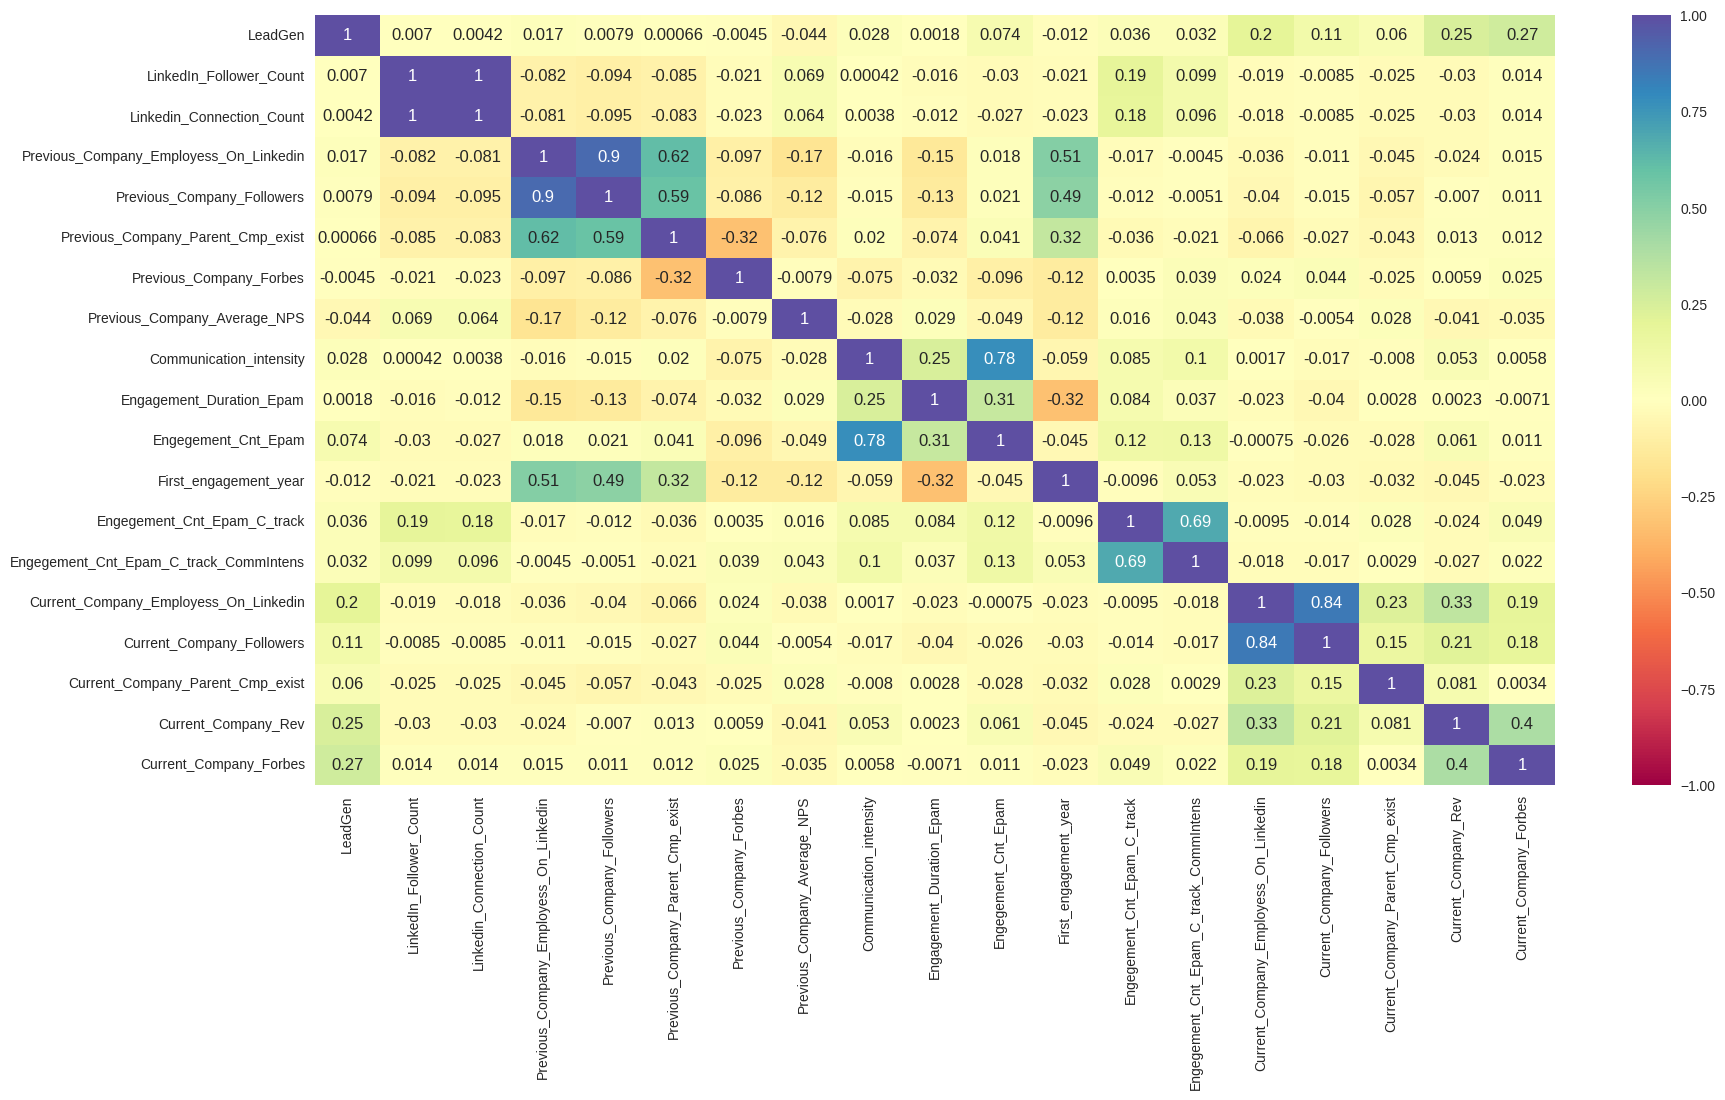

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(data_heatmap.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**OBSERVATIONS**















`LeadGen` : Has a positivie correlation with Current Company Forbes , this means that contacts whom are at big companies generating more leads.
`LeadGen` : Has a positivie correlation with Current Company Revenu , this means that contacts whom are at revenue generating companies more much possible opportunity to generate leads.
`LeadGen` : Has positive correlation with Parent Company Exits which means that contacts in big companies has more probability to genrate leads.
``







**Differentiating Numerical Columns**

In [99]:
numeric_cols = data_EDA.select_dtypes(include=[np.number]).columns

print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['LeadGen', 'LinkedIn_Follower_Count', 'Linkedin_Connection_Count',
       'Previous_Company_Employess_On_Linkedin', 'Previous_Company_Followers',
       'Previous_Company_Parent_Cmp_exist', 'Previous_Company_Forbes',
       'Previous_Company_Average_NPS', 'Communication_intensity',
       'Engagement_Duration_Epam', 'Engegement_Cnt_Epam',
       'First_engagement_year', 'Engegement_Cnt_Epam_C_track',
       'Engegement_Cnt_Epam_C_track_CommIntens',
       'Current_Company_Employess_On_Linkedin', 'Current_Company_Followers',
       'Current_Company_Parent_Cmp_exist', 'Current_Company_Rev',
       'Current_Company_Forbes'],
      dtype='object')


In [100]:

data_EDA.groupby(["First_engagement_year"])[numeric_cols].mean()

LeadGen  LinkedIn_Follower_Count  \
First_engagement_year                                      
2017.0                 0.395797              1060.570397   
2018.0                 0.349481              1189.754513   
2019.0                 0.395722              1125.471910   
2020.0                 0.407821               887.029070   
2021.0                 0.345238              1136.837500   
2022.0                 0.250000               595.428571   

                       Linkedin_Connection_Count  \
First_engagement_year                              
2017.0                               1045.402527   
2018.0                               1150.519856   
2019.0                               1078.870787   
2020.0                                875.104651   
2021.0                               1122.987342   
2022.0                                583.428571   

                       Previous_Company_Employess_On_Linkedin  \
First_engagement_year                                           
2017.0                                           20296.106383   
2018.0                                           29009.318182   
2019.0                                           21004.846154   
2020.0                                          135211.411429   
2021.0                                          148243.560976   
2022.0                                          102886.250000   

                       Previous_Company_Followers  \
First_engagement_year                               
2017.0                               6.357675e+05   
2018.0                               8.661958e+05   
2019.0                               4.189712e+05   
2020.0                               4.940506e+06   
2021.0                               5.744843e+06   
2022.0                               2.661932e+06   

                       Previous_Company_Parent_Cmp_exist  \
First_engagement_year                                      
2017.0                                          0.180385   
2018.0                                          0.128028   
2019.0                                          0.085561   
2020.0                                          0.592179   
2021.0                                          0.654762   
2022.0                                          0.375000   

                       Previous_Company_Forbes  Previous_Company_Average_NPS  \
First_engagement_year                                                          
2017.0                                0.297723                      8.294011   
2018.0                                0.273356                      8.318008   
2019.0                                0.262032                      8.281879   
2020.0                                0.122905                      7.928144   
2021.0                                0.142857                      8.012821   
2022.0                                0.375000                      8.250000   

                       Communication_intensity  Engagement_Duration_Epam  \
First_engagement_year                                                      
2017.0                              545.887916                  2.451839   
2018.0                              425.958478                  2.089965   
2019.0                              402.652406                  1.887701   
2020.0                              566.463687                  1.927374   
2021.0                              191.511905                  1.416667   
2022.0                               99.750000                  1.000000   

                       Engegement_Cnt_Epam  First_engagement_year  \
First_engagement_year                                               
2017.0                           11.795096                 2017.0   
2018.0                            9.470588                 2018.0   
2019.0                            9.010695                 2019.0   
2020.0                           13.446927                 2020.0   
2021.0                            7

**All Numerical Columns Analyzsis**

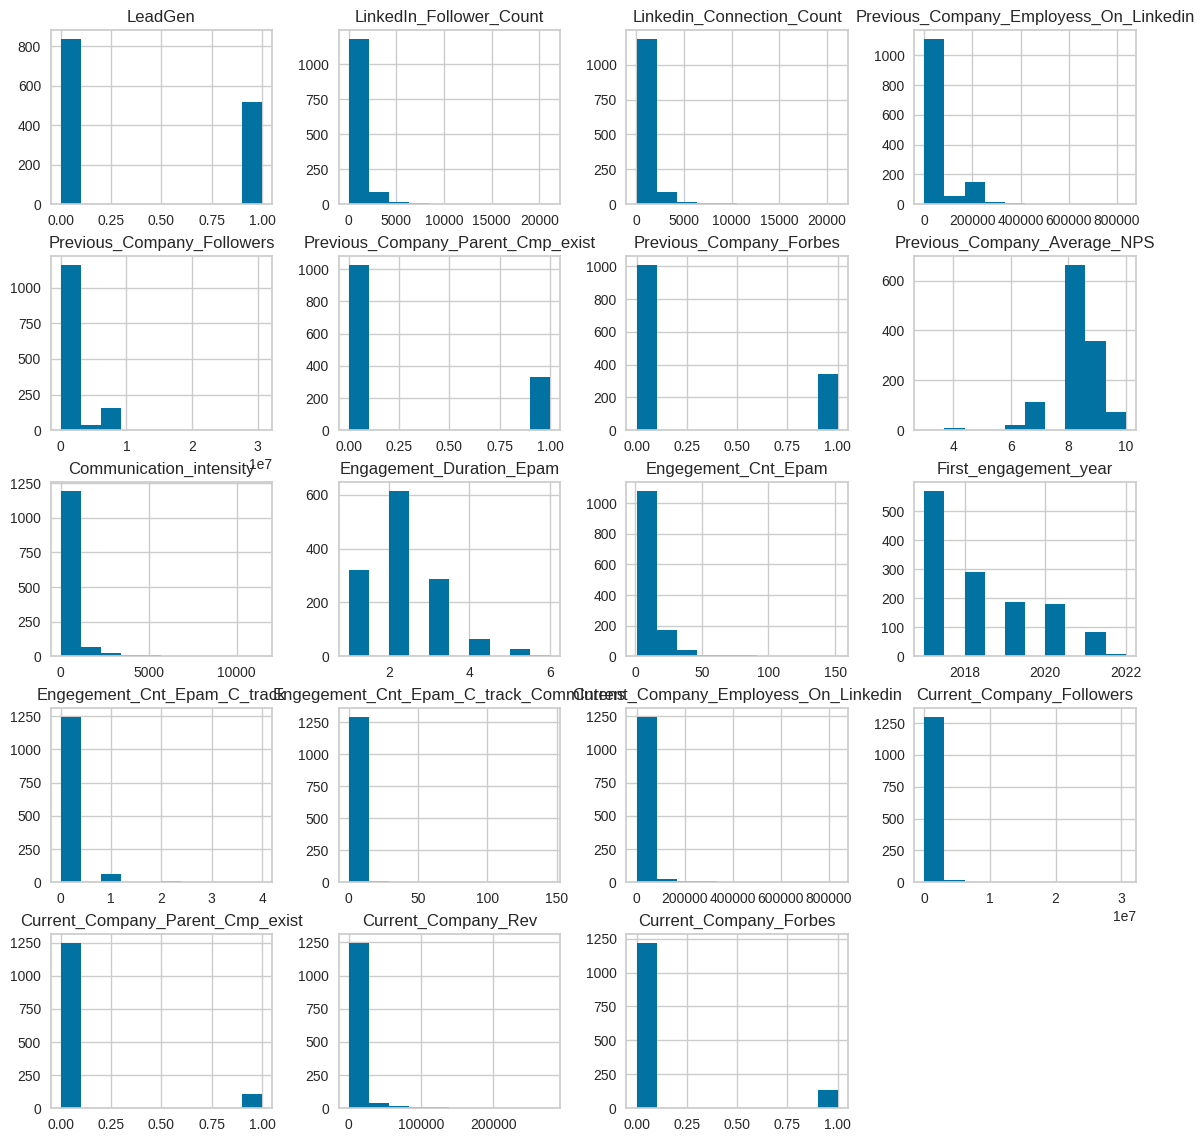

In [101]:
data_EDA[numeric_cols].hist(figsize=(14, 14))
plt.show()

In [102]:
data_EDA.head()

LeadGen                                  LinkedIn_Profile  \
0        1             https://www.linkedin.com/in/bajjarapu   
1        1  https://www.linkedin.com/in/kat-ashford-87383222   
2        1  https://www.linkedin.com/in/usha-karnala-966120a   
3        1           https://www.linkedin.com/in/stevegillam   
4        0      https://www.linkedin.com/in/mitesh-patel-mba   

   LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                   1210.0                     1220.0  Bhaskar Ajjarapu   
1                    642.0                      629.0       Kat Ashford   
2                    810.0                      808.0      Usha Karnala   
3                   3892.0                     3899.0      Steve Gillam   
4                    741.0                      738.0      Mitesh Patel   

                  Searched_Email Previous_Seniority_Level  \
0   bhaskar.ajjarapu@equifax.com                        C   
1  katherine.ashford@equifax.com                        C   
2       usha.karnala@equifax.com                        B   
3       steve.gillam@equifax.com                        C   
4       mitesh.patel@equifax.com                        C   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       B          Equifax                10001+   
3                       C          Equifax                10001+   
4                       C          Equifax                10001+   

  Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                             FS                                 14124.0   
1                             FS                                 14124.0   
2                             FS                                 14124.0   
3                             FS                                 14124.0   
4                             FS                                 14124.0   

   Previous_Company_Followers  Previous_Company_Parent_Cmp_exist  \
0                    173891.0                                  0   
1                    173891.0                                  0   
2                    173891.0                                  0   
3                    173891.0                                  0   
4                    173891.0                                  0   

   Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                        1                           8.0   
1                        1                           8.0   
2                        1                           8.0   
3                        1                           8.0   
4                        1                           8.0   

   Communication_intensity  Engagement_Duration_Epam  Engegement_Cnt_Epam  \
0                     13.0                       1.0                  2.0   
1                    402.0                       1.0                 14.0   
2                   1892.0                       2.0                 24.0   
3                    132.0                       2.0                  7.0   
4                    176.0                       1.0                 11.0   

   First_engagement_year Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track  \
0                 2019.0                       C                          1.0   
1                 2019.0                       B                          0.0   
2                 2020.0                       B                          0.0   
3                 2019.0                       B                          0.0   
4                 2019.0                       C                          1.0   

   Engegement_Cnt_Epam_C_track_CommIntens      Current_Company  \
0                                     3.0              Shopify   
1                                     0.0  Centene Corporation   
2               

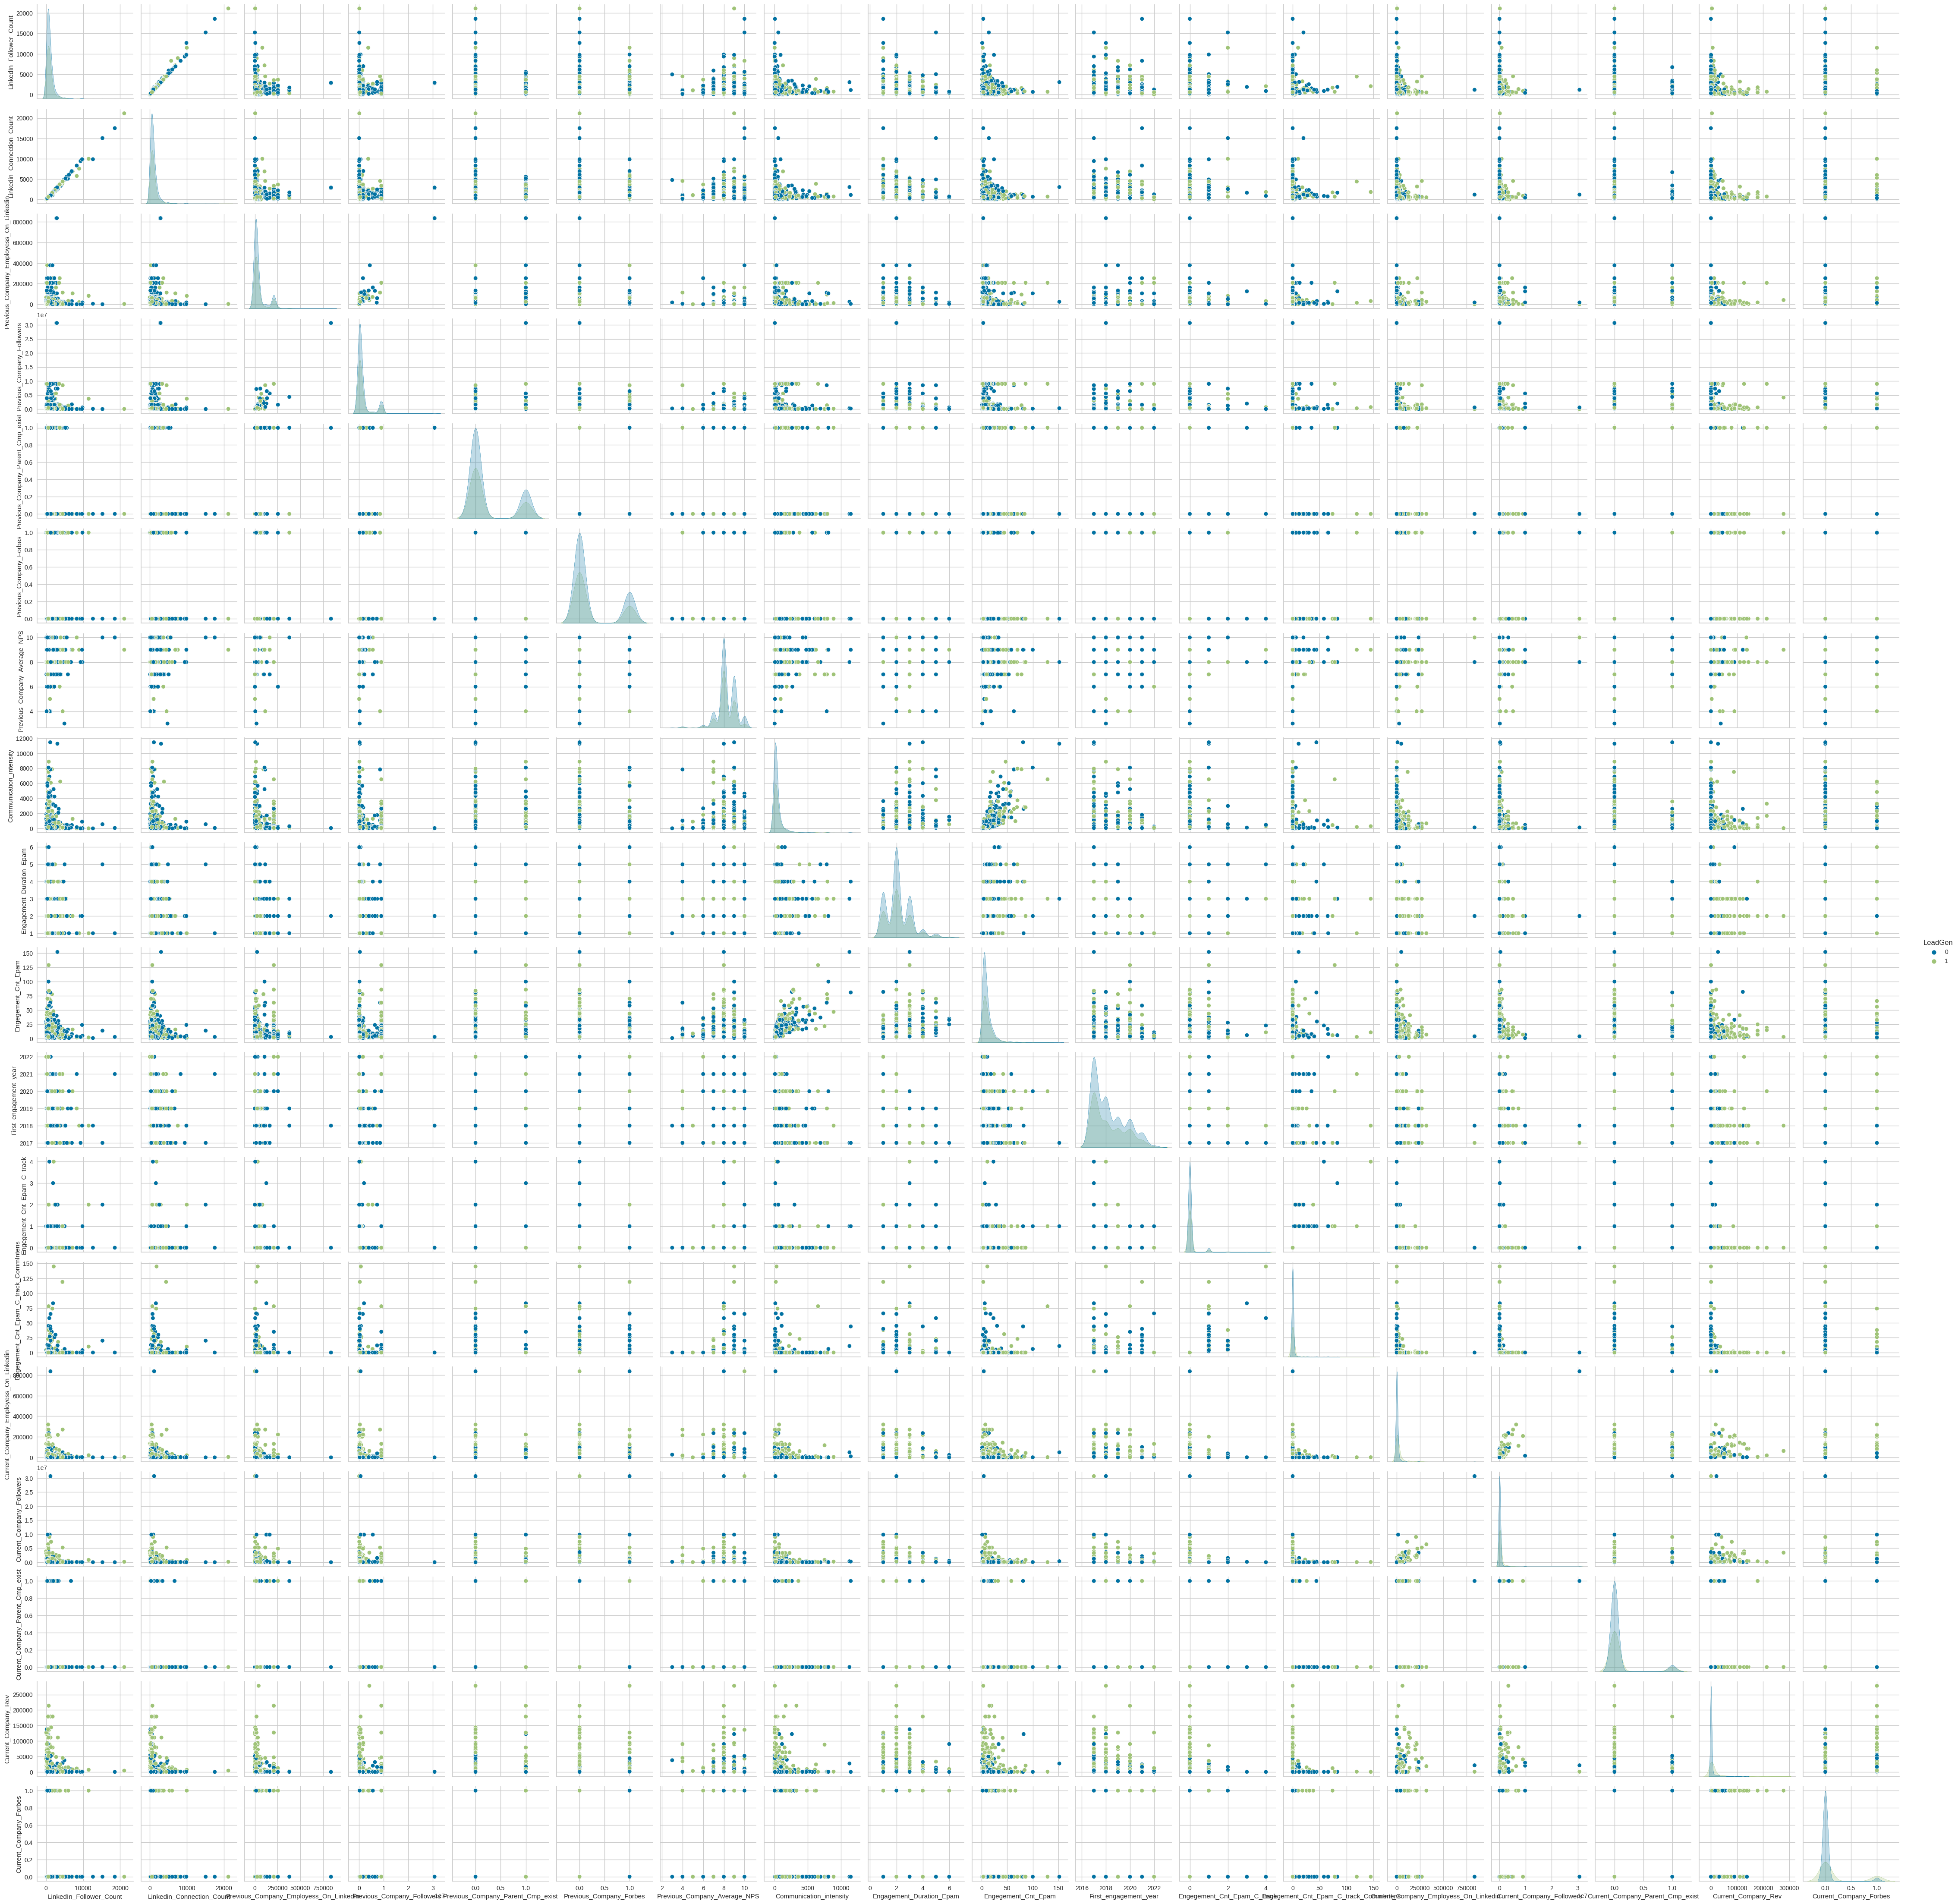

In [103]:
sns.pairplot(data=data_EDA,hue="LeadGen", diag_kind="kde")
plt.show()

In [104]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [105]:
data_EDA.head()

LeadGen                                  LinkedIn_Profile  \
0        1             https://www.linkedin.com/in/bajjarapu   
1        1  https://www.linkedin.com/in/kat-ashford-87383222   
2        1  https://www.linkedin.com/in/usha-karnala-966120a   
3        1           https://www.linkedin.com/in/stevegillam   
4        0      https://www.linkedin.com/in/mitesh-patel-mba   

   LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                   1210.0                     1220.0  Bhaskar Ajjarapu   
1                    642.0                      629.0       Kat Ashford   
2                    810.0                      808.0      Usha Karnala   
3                   3892.0                     3899.0      Steve Gillam   
4                    741.0                      738.0      Mitesh Patel   

                  Searched_Email Previous_Seniority_Level  \
0   bhaskar.ajjarapu@equifax.com                        C   
1  katherine.ashford@equifax.com                        C   
2       usha.karnala@equifax.com                        B   
3       steve.gillam@equifax.com                        C   
4       mitesh.patel@equifax.com                        C   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       B          Equifax                10001+   
3                       C          Equifax                10001+   
4                       C          Equifax                10001+   

  Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                             FS                                 14124.0   
1                             FS                                 14124.0   
2                             FS                                 14124.0   
3                             FS                                 14124.0   
4                             FS                                 14124.0   

   Previous_Company_Followers  Previous_Company_Parent_Cmp_exist  \
0                    173891.0                                  0   
1                    173891.0                                  0   
2                    173891.0                                  0   
3                    173891.0                                  0   
4                    173891.0                                  0   

   Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                        1                           8.0   
1                        1                           8.0   
2                        1                           8.0   
3                        1                           8.0   
4                        1                           8.0   

   Communication_intensity  Engagement_Duration_Epam  Engegement_Cnt_Epam  \
0                     13.0                       1.0                  2.0   
1                    402.0                       1.0                 14.0   
2                   1892.0                       2.0                 24.0   
3                    132.0                       2.0                  7.0   
4                    176.0                       1.0                 11.0   

   First_engagement_year Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track  \
0                 2019.0                       C                          1.0   
1                 2019.0                       B                          0.0   
2                 2020.0                       B                          0.0   
3                 2019.0                       B                          0.0   
4                 2019.0                       C                          1.0   

   Engegement_Cnt_Epam_C_track_CommIntens      Current_Company  \
0                                     3.0              Shopify   
1                                     0.0  Centene Corporation   
2               

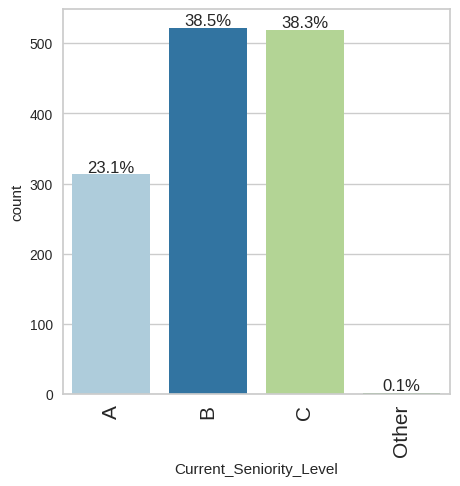

In [106]:
labeled_barplot(data_EDA, "Current_Seniority_Level", perc=True)

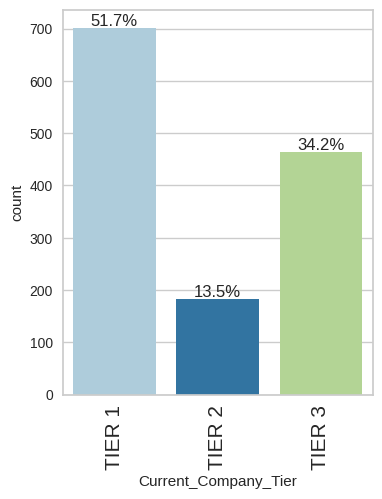

In [107]:
labeled_barplot(data_EDA, "Current_Company_Tier", perc=True)

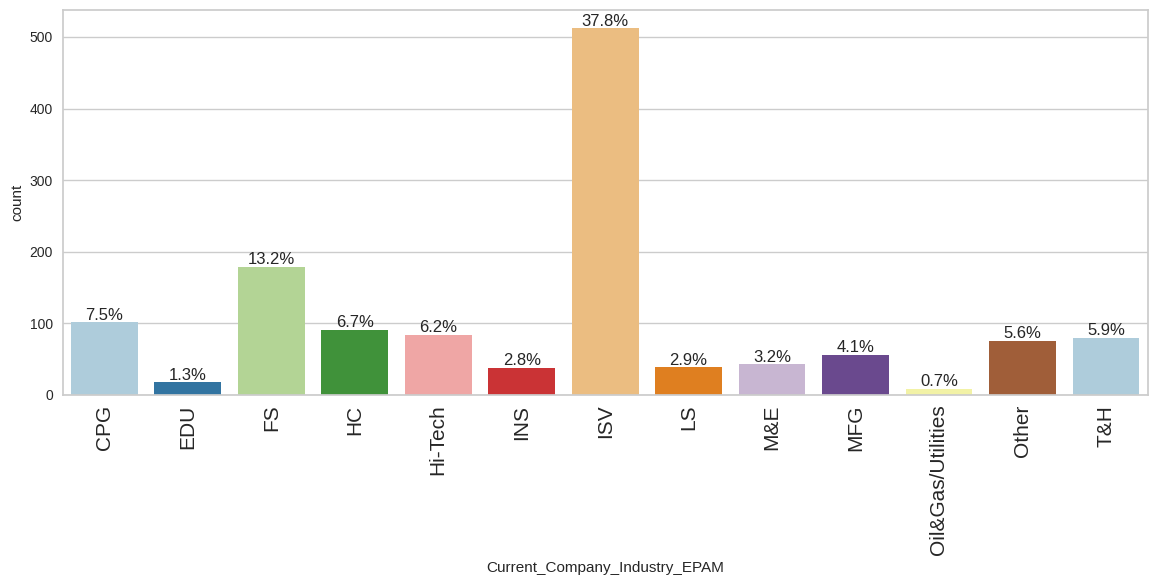

In [108]:
labeled_barplot(data_EDA, "Current_Company_Industry_EPAM", perc=True)

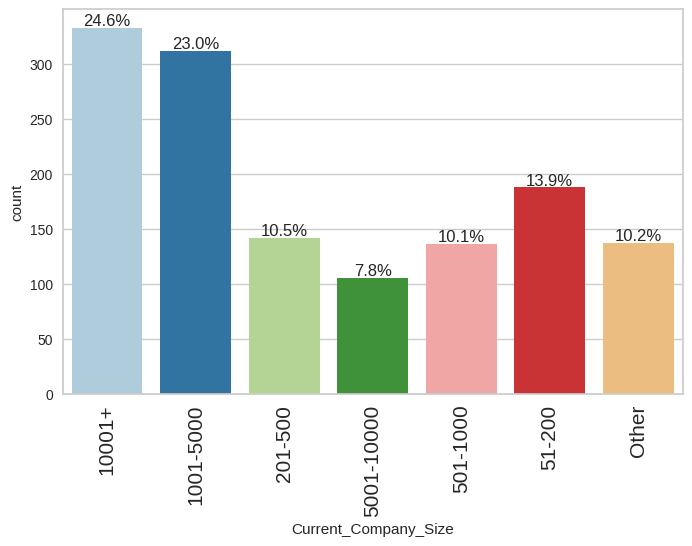

In [109]:
labeled_barplot(data_EDA, "Current_Company_Size", perc=True)

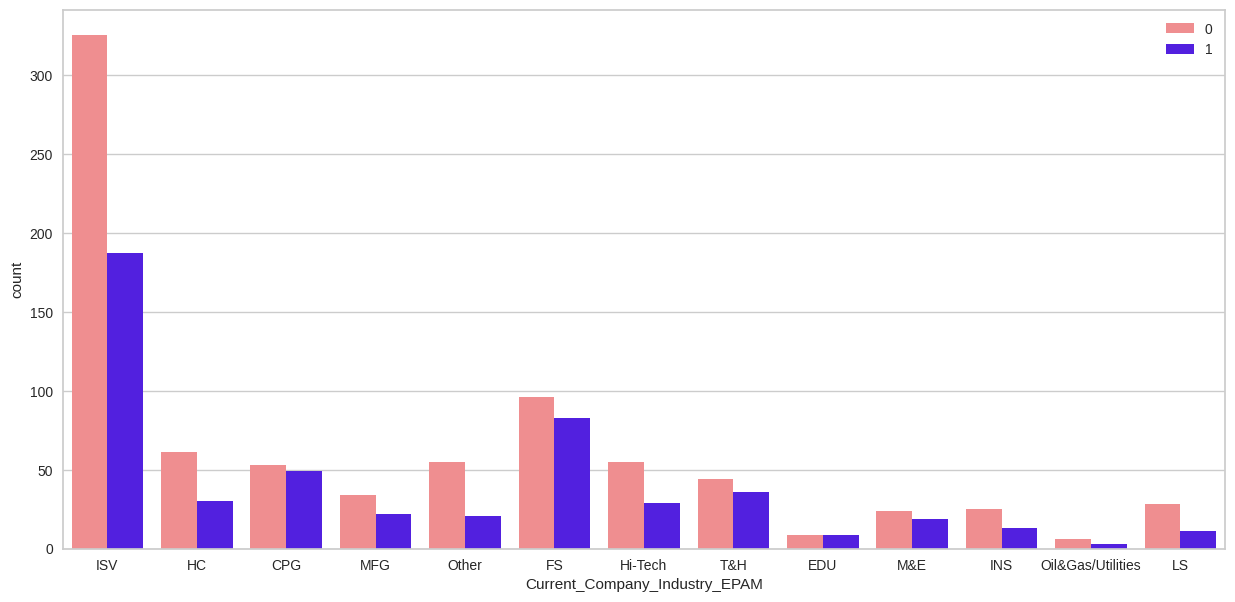

In [110]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Company_Industry_EPAM"],hue=data_EDA["LeadGen"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Current_Seniority_Level vrs LeadGen

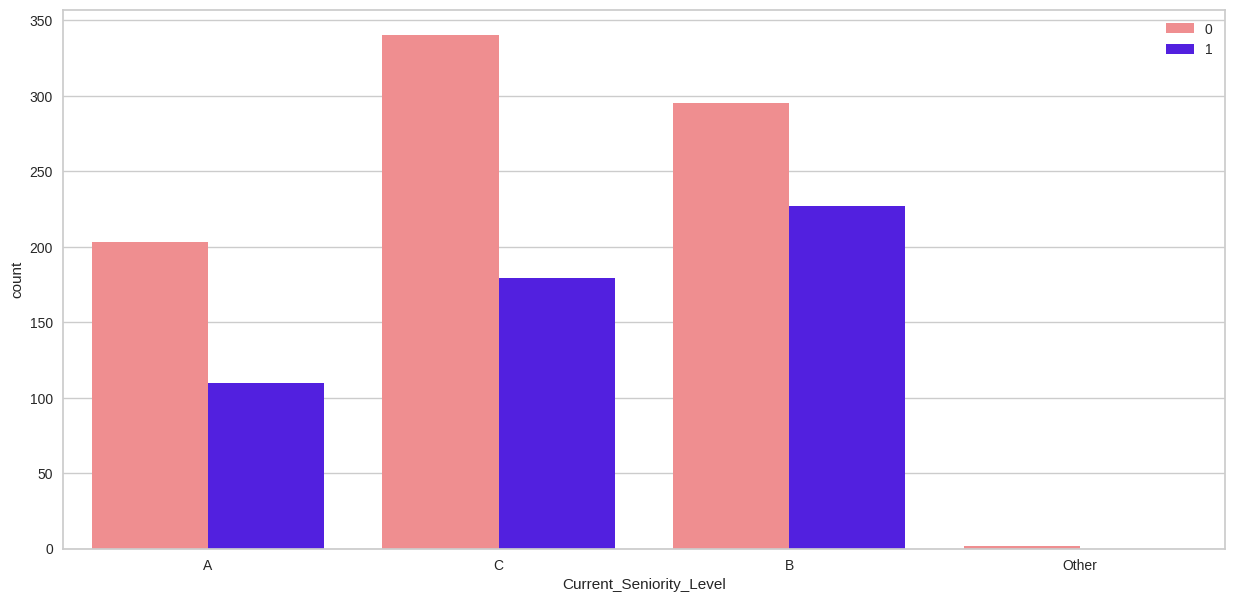

In [111]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Seniority_Level"],hue=data_EDA["LeadGen"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

LeadGen vrs Company Tier

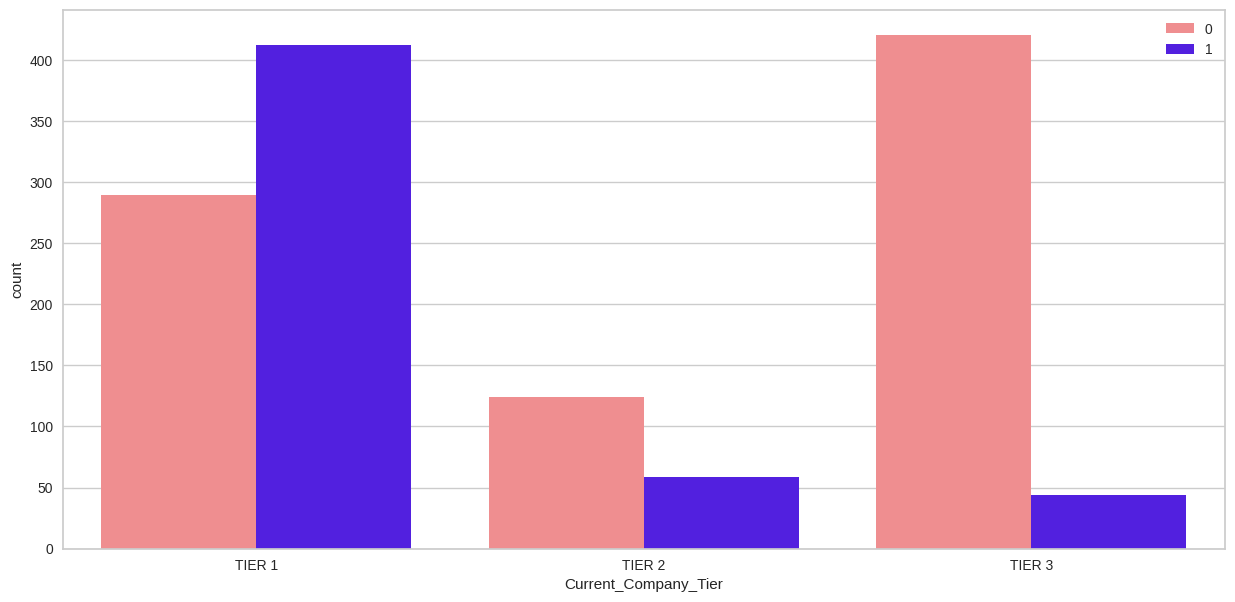

In [112]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Company_Tier"],hue=data_EDA["LeadGen"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

**Current Company Size vrs Current Seniority**

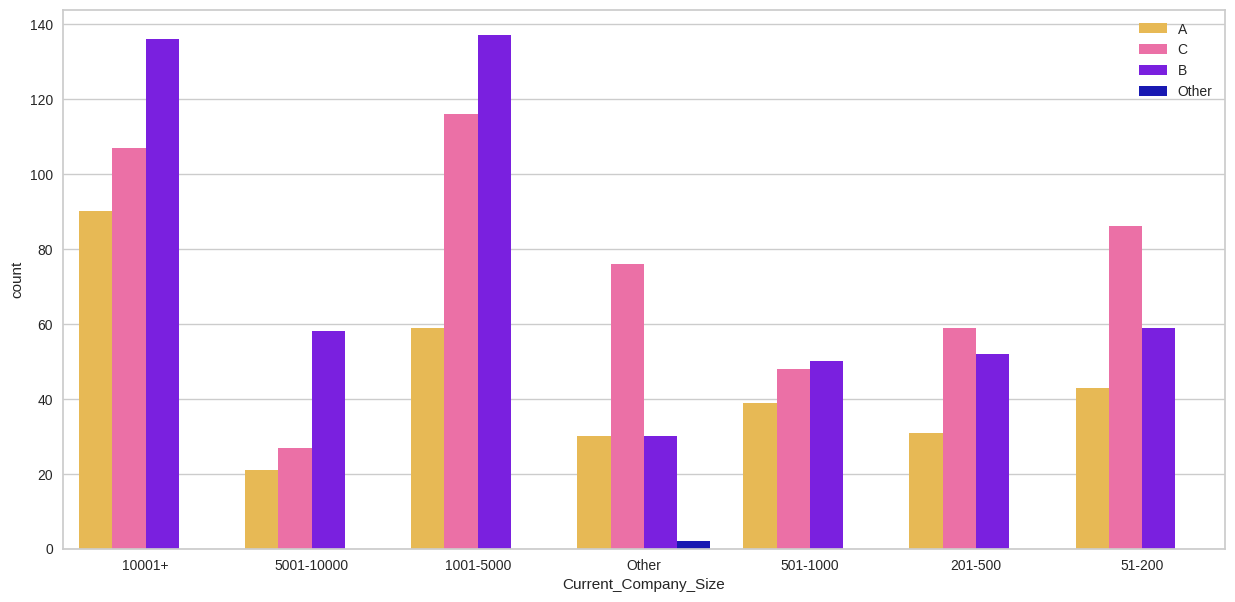

In [113]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Company_Size"],hue=data_EDA["Current_Seniority_Level"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Current Company Forbes vrs Engagement_Duration_Epam

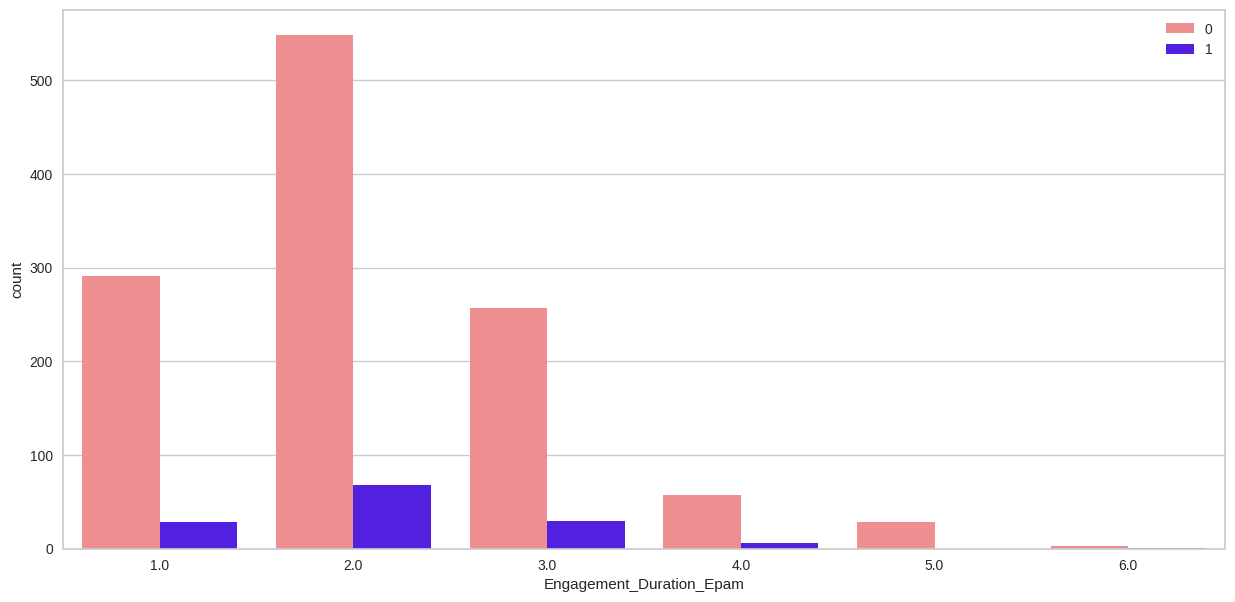

In [114]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Engagement_Duration_Epam"],hue=data_EDA["Current_Company_Forbes"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Current Company Forbes vrs Current_Seniority_Level

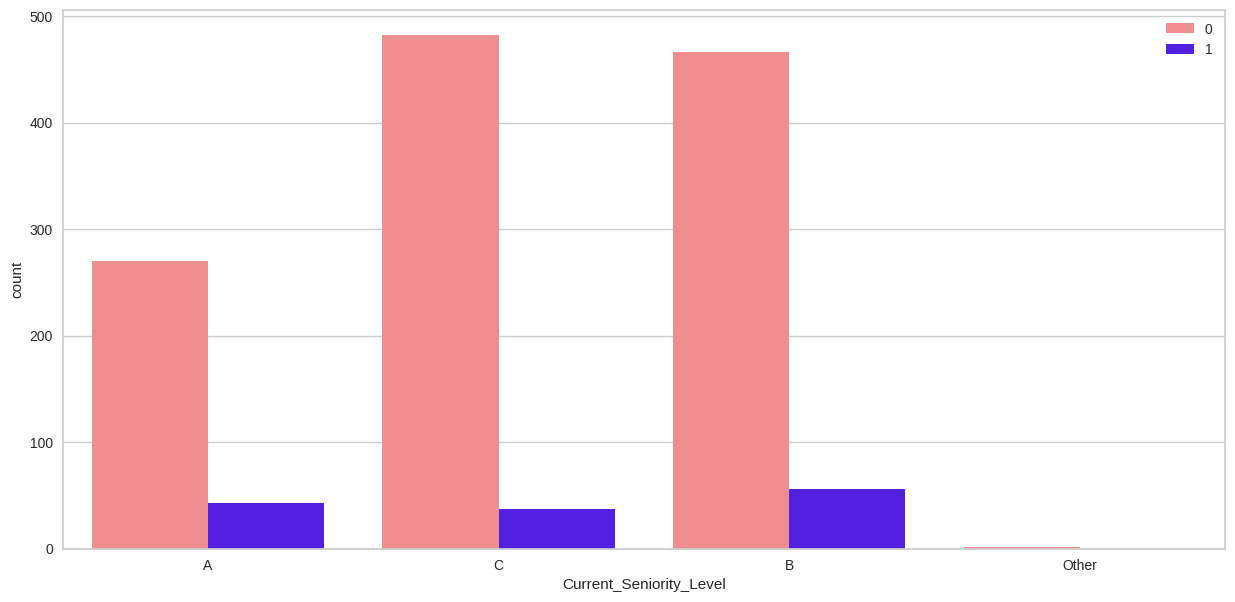

In [115]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Seniority_Level"],hue=data_EDA["Current_Company_Forbes"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

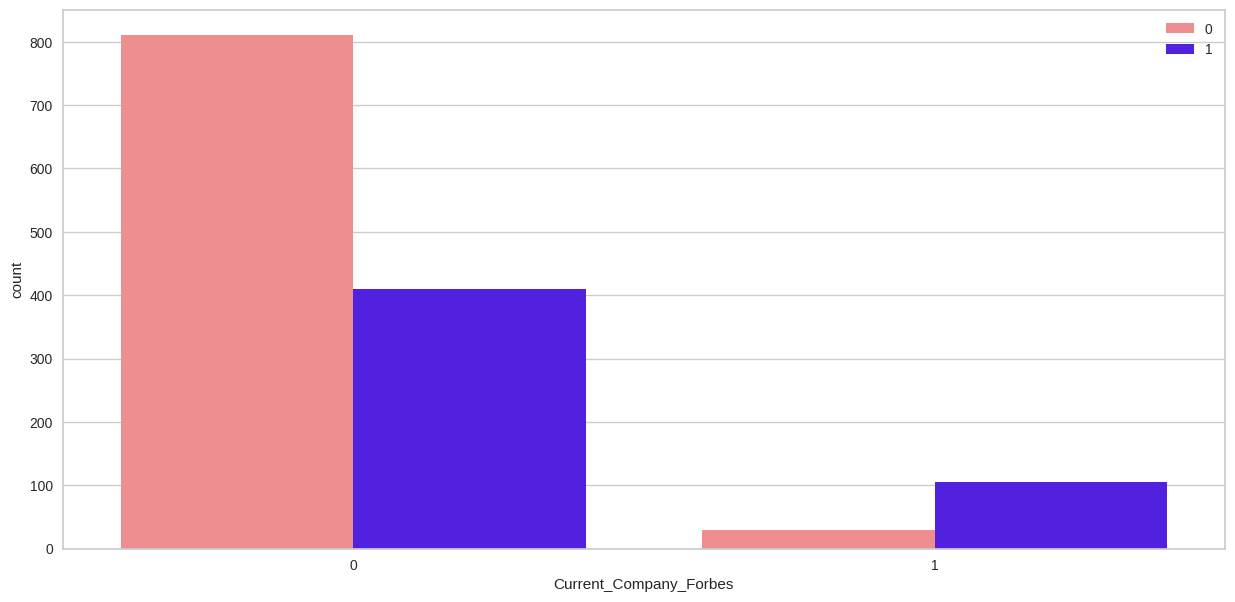

In [126]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Company_Forbes"],hue=data_EDA["LeadGen"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

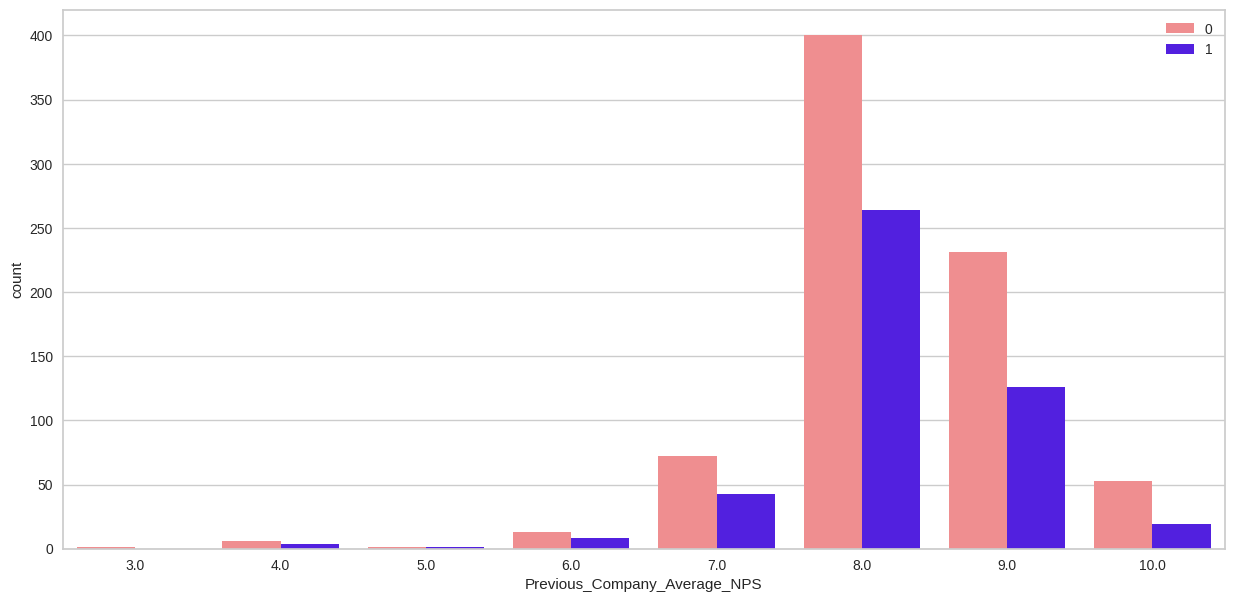

In [130]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Previous_Company_Average_NPS"],hue=data_EDA["LeadGen"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [128]:
data_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LeadGen                                 1356 non-null   int64  
 1   LinkedIn_Profile                        1356 non-null   object 
 2   LinkedIn_Follower_Count                 1306 non-null   float64
 3   Linkedin_Connection_Count               1305 non-null   float64
 4   Full_Name                               1356 non-null   object 
 5   Searched_Email                          1356 non-null   object 
 6   Previous_Seniority_Level                1356 non-null   object 
 7   Current_Seniority_Level                 1356 non-null   object 
 8   Previous_Company                        1356 non-null   object 
 9   Previous_Company_Size                   1356 non-null   object 
 10  Previous_Company_Industry_EPAM          1353 non-null   obje

0    840
1    516
Name: LeadGen, dtype: int64


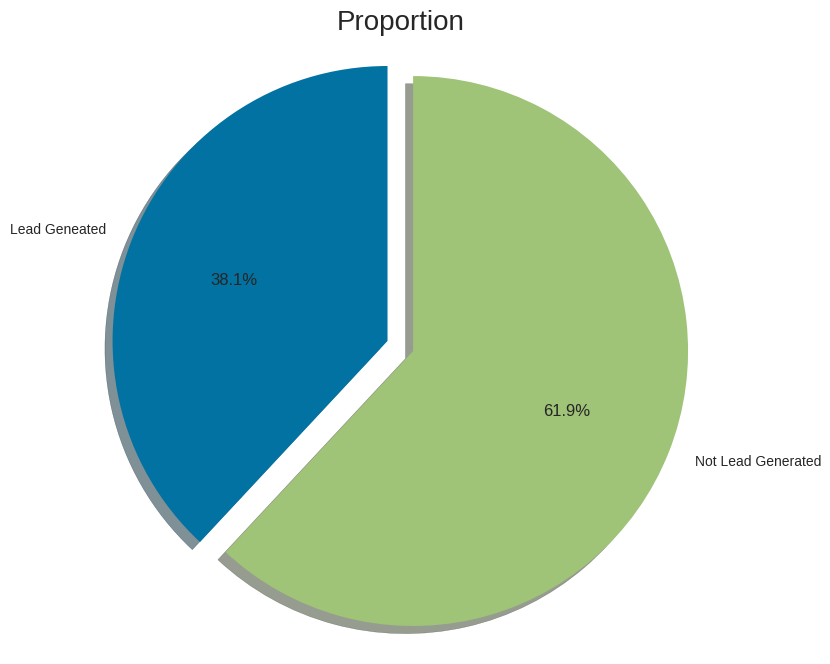

In [124]:
print(data_EDA.LeadGen.value_counts())
labels = 'Lead Geneated', 'Not Lead Generated'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [data_EDA.LeadGen[data_EDA['LeadGen']==1].count(),data_EDA.LeadGen[data_EDA['LeadGen']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

##4-DATA PREPROSESSING

Copying data_EDA to data_pre_process Data Frame for abstraction

In [132]:
data_pre_process=data_EDA.copy()

In [ ]:
##def drop_empty_rows(df):
    # Calculate the threshold based on 10% of the total number of columns
#    threshold= round(df.isnull().sum() / df().count() * 100, 2)

    # Count the number of missing values in each row
#    row_missing_values = df.isnull().sum(axis=1)

    # Filter rows where the number of missing values is greater than the threshold
#    rows_to_drop = row_missing_values[row_missing_values > threshold].index

    # Drop the identified rows
#    df_dropped = df.drop(rows_to_drop)

#    return df_dropped

In [133]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

In [ ]:
#data_pre_process.dropna(subset=["Communication_intensity"],axis=0,inplace=True)

In [ ]:
#data_pre_process.dropna(subset=["Current_Company_Employess_On_Linkedin"],axis=0,inplace=True)

In [134]:
data_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LeadGen                                 1356 non-null   int64  
 1   LinkedIn_Profile                        1356 non-null   object 
 2   LinkedIn_Follower_Count                 1306 non-null   float64
 3   Linkedin_Connection_Count               1305 non-null   float64
 4   Full_Name                               1356 non-null   object 
 5   Searched_Email                          1356 non-null   object 
 6   Previous_Seniority_Level                1356 non-null   object 
 7   Current_Seniority_Level                 1356 non-null   object 
 8   Previous_Company                        1356 non-null   object 
 9   Previous_Company_Size                   1356 non-null   object 
 10  Previous_Company_Industry_EPAM          1353 non-null   obje

In [135]:
data_pre_process

LeadGen                                   LinkedIn_Profile  \
0           1              https://www.linkedin.com/in/bajjarapu   
1           1   https://www.linkedin.com/in/kat-ashford-87383222   
2           1   https://www.linkedin.com/in/usha-karnala-966120a   
3           1            https://www.linkedin.com/in/stevegillam   
4           0       https://www.linkedin.com/in/mitesh-patel-mba   
...       ...                                                ...   
1351        1  https://www.linkedin.com/in/lan-anh-nguyen-678...   
1352        0  https://www.linkedin.com/in/priya-almelkar-17a...   
1353        0   https://www.linkedin.com/in/jan-mikrut-09667712/   
1354        0  https://www.linkedin.com/in/brian-tehako-38002...   
1355        1  https://www.linkedin.com/in/daliya-asuma-7632046/   

      LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                      1210.0                     1220.0  Bhaskar Ajjarapu   
1                       642.0                      629.0       Kat Ashford   
2                       810.0                      808.0      Usha Karnala   
3                      3892.0                     3899.0      Steve Gillam   
4                       741.0                      738.0      Mitesh Patel   
...                       ...                        ...               ...   
1351                    406.0                      407.0    Lan Anh Nguyen   
1352                   1278.0                     1009.0    Priya Almelkar   
1353                    339.0                      339.0        Jan Mikrut   
1354                  18573.0                    17510.0      Brian Tehako   
1355                    608.0                      612.0      Daliya Asuma   

                          Searched_Email Previous_Seniority_Level  \
0           bhaskar.ajjarapu@equifax.com                        C   
1          katherine.ashford@equifax.com                        C   
2               usha.karnala@equifax.com                        B   
3               steve.gillam@equifax.com                        C   
4               mitesh.patel@equifax.com                        C   
...                                  ...                      ...   
1351   lananh.nguyen@globalfoundries.com                        A   
1352  priya.almelkar@globalfoundries.com                        C   
1353                jmikrut@hehmeyer.com                        A   
1354                btehako@hehmeyer.com                        C   
1355              daliya.asuma@hilti.com                        A   

     Current_Seniority_Level     Previous_Company Previous_Company_Size  \
0                          A              Equifax                10001+   
1                          C              Equifax                10001+   
2                          B              Equifax                10001+   
3                          C              Equifax                10001+   
4                          C              Equifax                10001+   
...                      ...                  ...                   ...   
1351                       A      GlobalFoundries                10001+   
1352                       C      GlobalFoundries                10001+   
1353                       A             Hehmeyer                 Other   
1354                       C             Hehmeyer                 Other   
1355                       A  Hilti North America                10001+   

     Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                                FS                                 14124.0   
1                                FS                                 14124.0   
2                                FS                                 14124.0   
3                                FS                                 14124.0   
4                                FS                                 14124.0   
...                             ...             

In [136]:
cat_cols = [
"LeadGen",
"Previous_Seniority_Level",
"Current_Seniority_Level",
"Previous_Company_Size",
"Previous_Company_Industry_EPAM",
"Previous_Company_Parent_Cmp_exist",
"Previous_Company_Forbes",
"First_engagement_year",
"Seniority_Level_Of_Epam",
"Current_Company_Size",
"Current_Company_Tier",
"Current_Company_Parent_Cmp_exist",
"Current_Company_Industry_EPAM",
"Current_Company_Forbes",

]
data_pre_process[cat_cols] = data_pre_process[cat_cols].astype("category")

In [137]:
data_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   LeadGen                                 1356 non-null   category
 1   LinkedIn_Profile                        1356 non-null   object  
 2   LinkedIn_Follower_Count                 1306 non-null   float64 
 3   Linkedin_Connection_Count               1305 non-null   float64 
 4   Full_Name                               1356 non-null   object  
 5   Searched_Email                          1356 non-null   object  
 6   Previous_Seniority_Level                1356 non-null   category
 7   Current_Seniority_Level                 1356 non-null   category
 8   Previous_Company                        1356 non-null   object  
 9   Previous_Company_Size                   1356 non-null   category
 10  Previous_Company_Industry_EPAM          1353 non

In [138]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

**4.1** **Checking Categorial Columns**


**Previous Seniority Level**

In [139]:
print(data_pre_process.Previous_Seniority_Level.value_counts())

B        546
C        433
A        311
Other     66
Name: Previous_Seniority_Level, dtype: int64


There are four categries exits including Others category

**Current Seniority Level**

In [140]:
print(data_pre_process.Current_Seniority_Level.value_counts())

B        522
C        519
A        313
Other      2
Name: Current_Seniority_Level, dtype: int64


There are four categries exits including Others category

**Current Company Parent Cmp exist**



In [141]:
print(data_pre_process.Current_Company_Parent_Cmp_exist.value_counts())

0    1250
1     106
Name: Current_Company_Parent_Cmp_exist, dtype: int64


Seniority Level Of Epam

In [142]:
print(data_pre_process.Seniority_Level_Of_Epam.value_counts())

B        1154
A          92
C          72
Other      38
Name: Seniority_Level_Of_Epam, dtype: int64


Previous Company Size

In [143]:
print(data_pre_process.Previous_Company_Size.value_counts())

10001+        842
1001-5000     194
501-1000      106
201-500       103
5001-10000     64
Other          28
51-200         19
Name: Previous_Company_Size, dtype: int64


Current Company Size

In [144]:
print(data_pre_process.Current_Company_Size.value_counts())

10001+        333
1001-5000     312
51-200        188
201-500       142
Other         138
501-1000      137
5001-10000    106
Name: Current_Company_Size, dtype: int64


Impute Missing Values

In [145]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

Uses Simple Imputer with Strategy Median to impute missing numerical values

In [146]:
def impute_missing_with_median(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    data_copy = data.copy()
    data_copy[numeric_columns] = imputer.fit_transform(data_copy[numeric_columns])
    return data_copy

In [147]:
data_imputed = impute_missing_with_median(data_pre_process)

In [148]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   LeadGen                                 1356 non-null   category
 1   LinkedIn_Profile                        1356 non-null   object  
 2   LinkedIn_Follower_Count                 1356 non-null   float64 
 3   Linkedin_Connection_Count               1356 non-null   float64 
 4   Full_Name                               1356 non-null   object  
 5   Searched_Email                          1356 non-null   object  
 6   Previous_Seniority_Level                1356 non-null   category
 7   Current_Seniority_Level                 1356 non-null   category
 8   Previous_Company                        1356 non-null   object  
 9   Previous_Company_Size                   1356 non-null   category
 10  Previous_Company_Industry_EPAM          1353 non

In [149]:
def impute_missing_with_mode(data):
    categorical_columns = data.select_dtypes(include=['category']).columns
    data_copy = data.copy()
    for column in categorical_columns:
        mode = data_copy[column].mode()[0]
        data_copy[column].fillna(mode, inplace=True)
    return data_copy

Impute Categorical Values with their Mode

In [150]:
data_imputed=impute_missing_with_mode(data_imputed)

In [151]:
data_pre_process=data_imputed.copy()

In [152]:
round(data_imputed.isnull().sum() / data_imputed.isnull().count() * 100, 2)

LeadGen                                   0.0
LinkedIn_Profile                          0.0
LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Full_Name                                 0.0
Searched_Email                            0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company                          0.0
Previous_Company_Size                     0.0
Previous_Company_Industry_EPAM            0.0
Previous_Company_Employess_On_Linkedin    0.0
Previous_Company_Followers                0.0
Previous_Company_Parent_Cmp_exist         0.0
Previous_Company_Forbes                   0.0
Previous_Company_Average_NPS              0.0
Communication_intensity                   0.0
Engagement_Duration_Epam                  0.0
Engegement_Cnt_Epam                       0.0
First_engagement_year                     0.0
Seniority_Level_Of_Epam                   0.0
Engegement_Cnt_Epam_C_track       

**4.2** **Feature Enginering**

**4.2.1** **Outlier Treatment On Numerical Columns**

In [153]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [154]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [155]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

**4.5.1** **Outlier Treatment On Training Set**

In [156]:
numerical_col=data_pre_process.select_dtypes(include=np.number).columns.tolist()

In [157]:
numerical_col

['LinkedIn_Follower_Count',
 'Linkedin_Connection_Count',
 'Previous_Company_Employess_On_Linkedin',
 'Previous_Company_Followers',
 'Previous_Company_Average_NPS',
 'Communication_intensity',
 'Engagement_Duration_Epam',
 'Engegement_Cnt_Epam',
 'Engegement_Cnt_Epam_C_track',
 'Engegement_Cnt_Epam_C_track_CommIntens',
 'Current_Company_Employess_On_Linkedin',
 'Current_Company_Followers',
 'Current_Company_Rev']

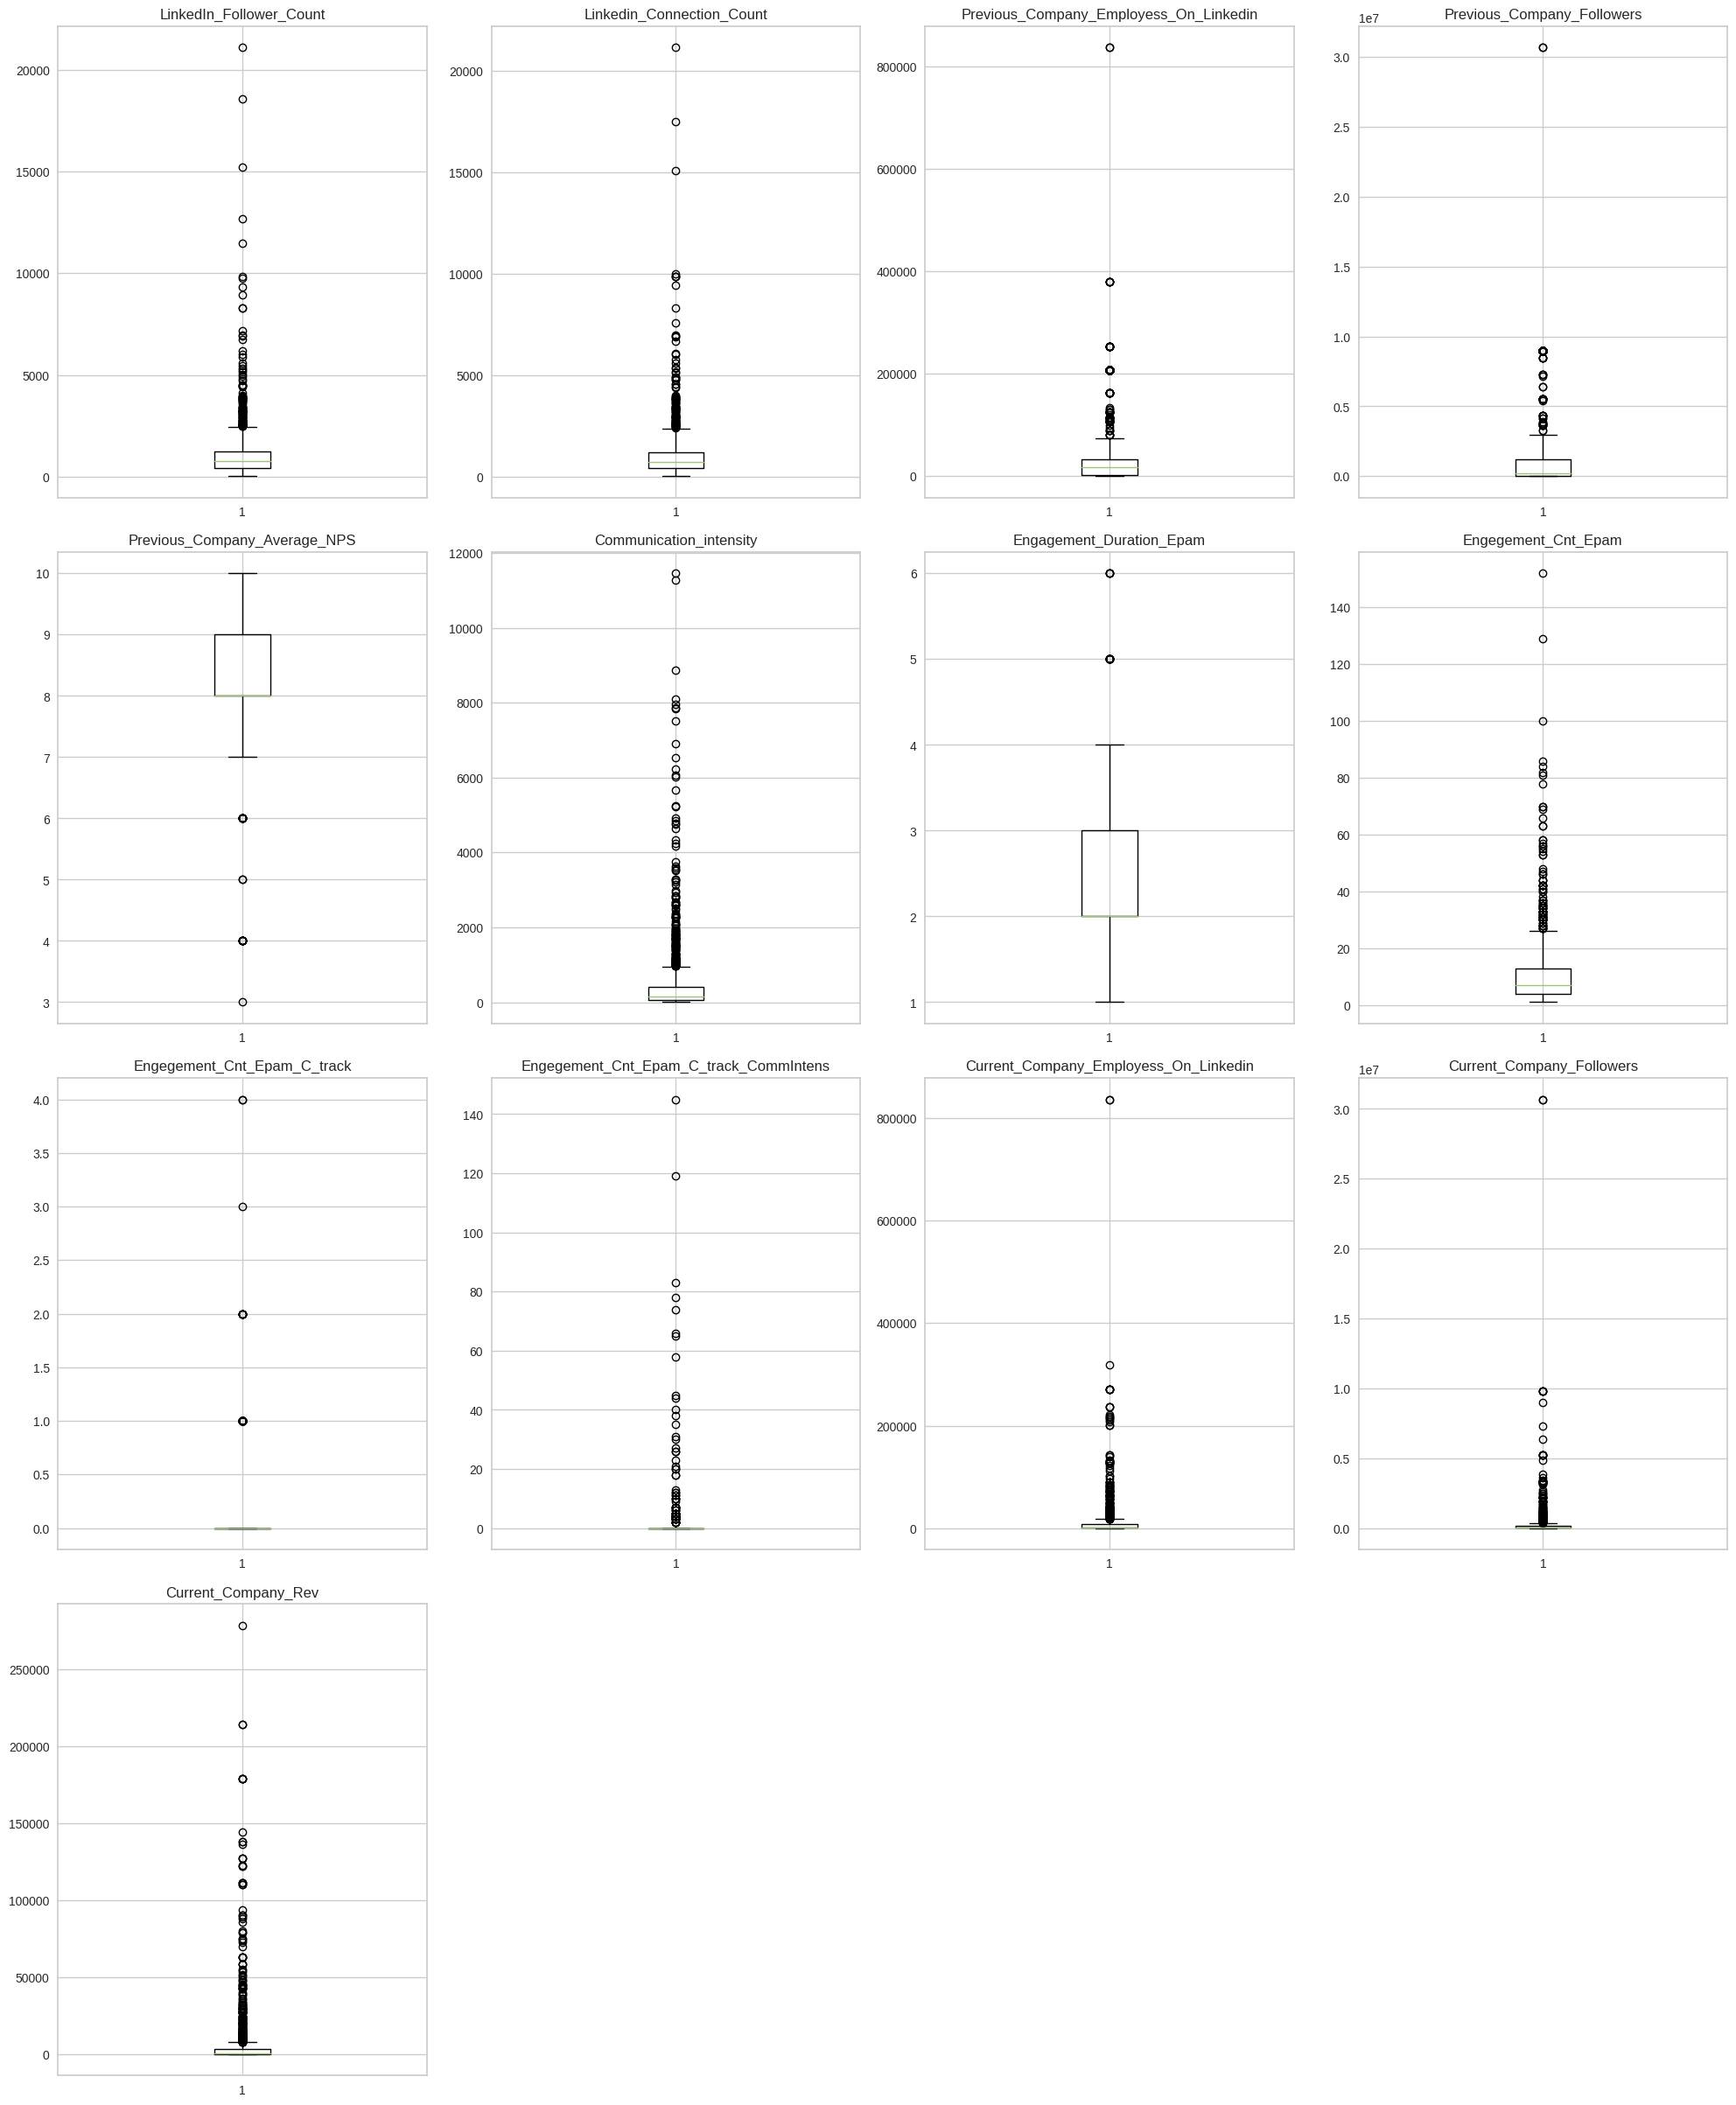

In [158]:
numerical_col = data_pre_process.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data_pre_process[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Outliers Treated for Training Data Set**

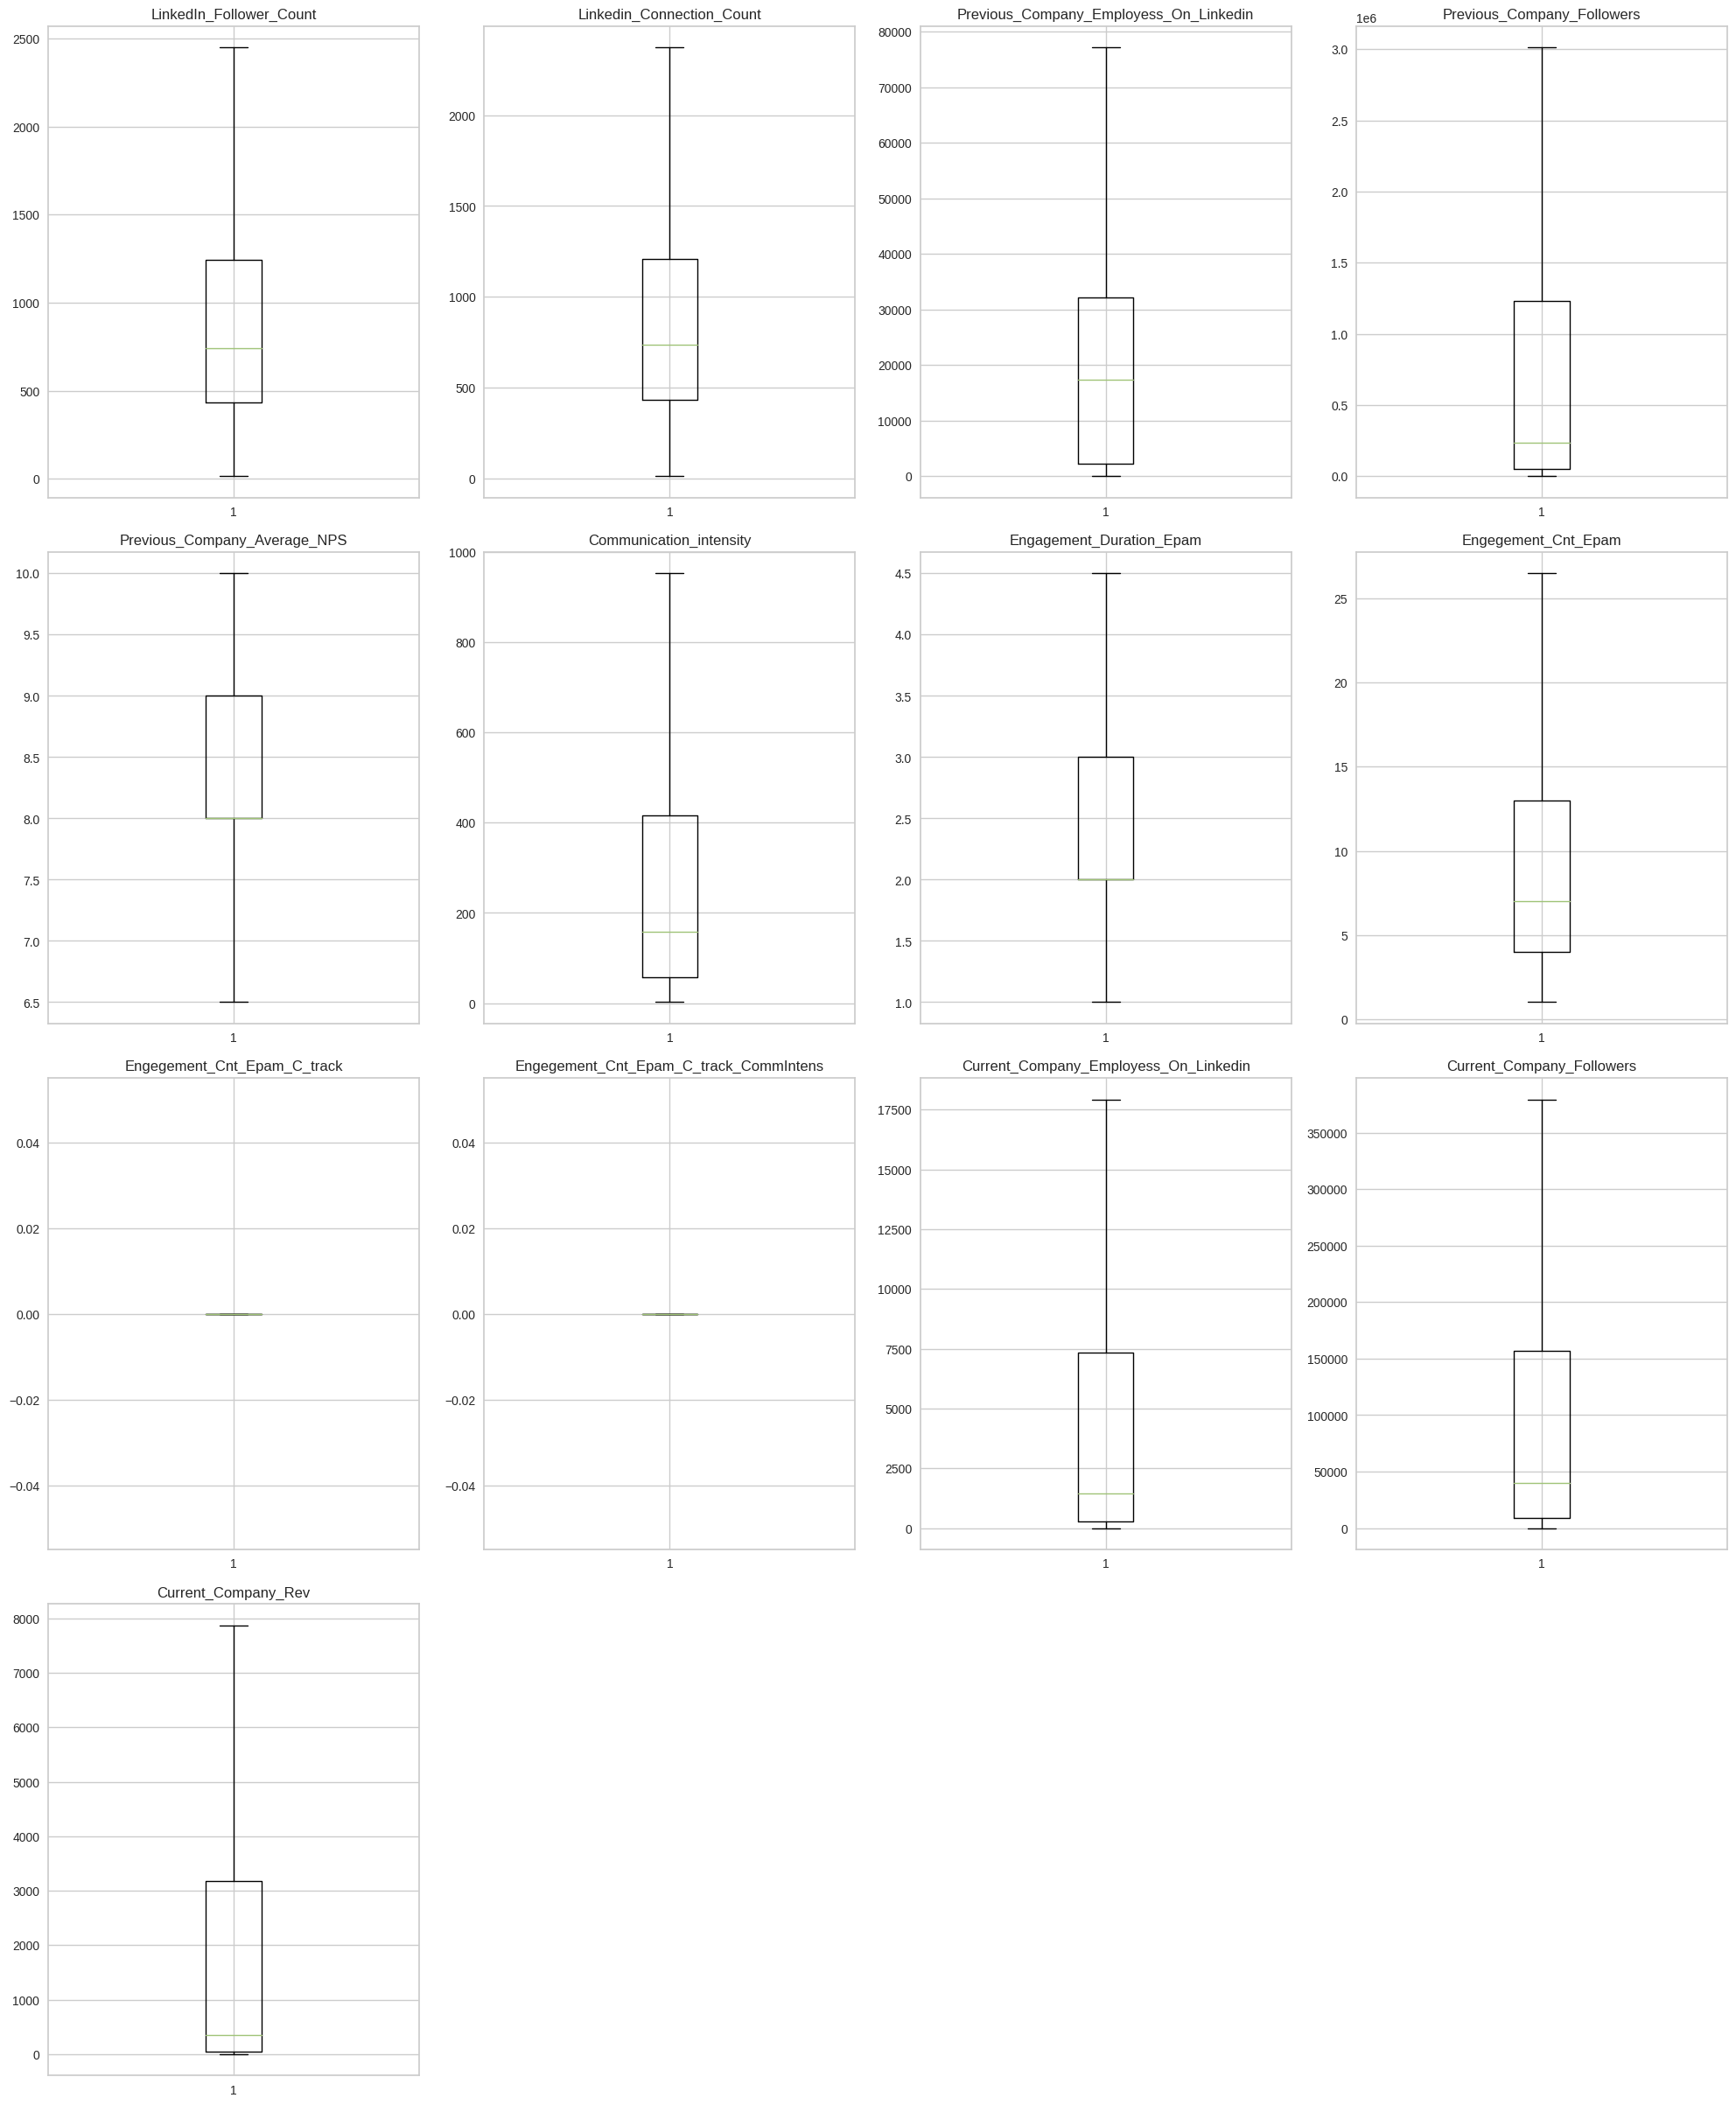

In [159]:
numerical_col = data_pre_process.select_dtypes(include=np.number).columns.tolist()
X_train = treat_outliers_all(data_pre_process, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [238]:
data_model=data_pre_process.copy()

Droping Unused String Values From Model

In [240]:
def drop_object_columns(data):
    object_columns = data.select_dtypes(include=['object']).columns
    data_copy = data.drop(object_columns, axis=1)
    return data_copy

In [241]:
data_model=drop_object_columns(data_model)

In [242]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   LeadGen                                 1356 non-null   category
 1   LinkedIn_Follower_Count                 1356 non-null   float64 
 2   Linkedin_Connection_Count               1356 non-null   float64 
 3   Previous_Seniority_Level                1356 non-null   category
 4   Current_Seniority_Level                 1356 non-null   category
 5   Previous_Company_Size                   1356 non-null   category
 6   Previous_Company_Industry_EPAM          1356 non-null   category
 7   Previous_Company_Employess_On_Linkedin  1356 non-null   float64 
 8   Previous_Company_Followers              1356 non-null   float64 
 9   Previous_Company_Parent_Cmp_exist       1356 non-null   category
 10  Previous_Company_Forbes                 1356 non

Dropping String Values to generate model data

MAP Seniority Level

In [243]:
Seniority_Level={"A":3,"B":2,"C":1,"Other":0}

In [244]:

data_model["Previous_Seniority_Level"] = data_model["Previous_Seniority_Level"].map(Seniority_Level)

In [245]:
data_model["Current_Seniority_Level"] = data_model["Current_Seniority_Level"].map(Seniority_Level)

In [246]:
data_model["Seniority_Level_Of_Epam"] = data_model["Seniority_Level_Of_Epam"].map(Seniority_Level)

In [247]:
print(data.Previous_Company_Size.value_counts())

10001+        842
1001-5000     194
501-1000      106
201-500       103
5001-10000     64
Other          28
51-200         19
Name: Previous_Company_Size, dtype: int64


MAP Company Size

In [248]:
#CompanySize={"Other":0,"0-1":1,"2-10":2,"11-50":3,"51-200":4,"201-500":5,"501-1000":6,"1001-5000":7,"5001-10000":8,"10001+":9}

Defining the new clustering sizes

In [249]:
Size_1=["Other","51-200"]

In [250]:
Size_2=["201-500","501-1000"]

In [251]:
Size_3=["1001-5000","5001-10000","10001+"]

In [252]:
def reduce_company_size(x):
    if x in Size_1:
        return "Size_1"
    elif x in Size_2:
        return "Size_2"
    elif x in Size_3:
        return "Size_3"
    else:
        return x

In [253]:
data_model.Previous_Company_Size=data_model.Previous_Company_Size.apply(reduce_company_size)

In [254]:
data_model.Current_Company_Size=data_model.Current_Company_Size.apply(reduce_company_size)

In [255]:
data_model["Previous_Company_Size"]

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
1351    Size_3
1352    Size_3
1353    Size_1
1354    Size_1
1355    Size_3
Name: Previous_Company_Size, Length: 1356, dtype: object

In [256]:
data_model["Current_Company_Size"]

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
1351    Size_3
1352    Size_3
1353    Size_2
1354    Size_1
1355    Size_3
Name: Current_Company_Size, Length: 1356, dtype: object

In [257]:
print(data_model.Previous_Seniority_Level.value_counts())

2    546
1    433
3    311
0     66
Name: Previous_Seniority_Level, dtype: int64


In [258]:
print(data_model.Current_Company_Size.value_counts())

Size_3    751
Size_1    326
Size_2    279
Name: Current_Company_Size, dtype: int64


In [259]:
round(data_model.isnull().sum() / data_model.isnull().count() * 100, 2)

LeadGen                                   0.0
LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company_Size                     0.0
Previous_Company_Industry_EPAM            0.0
Previous_Company_Employess_On_Linkedin    0.0
Previous_Company_Followers                0.0
Previous_Company_Parent_Cmp_exist         0.0
Previous_Company_Forbes                   0.0
Previous_Company_Average_NPS              0.0
Communication_intensity                   0.0
Engagement_Duration_Epam                  0.0
Engegement_Cnt_Epam                       0.0
First_engagement_year                     0.0
Seniority_Level_Of_Epam                   0.0
Engegement_Cnt_Epam_C_track               0.0
Engegement_Cnt_Epam_C_track_CommIntens    0.0
Current_Company_Size                      0.0
Current_Company_Employess_On_Linkedin     0.0
Current_Company_Followers         

In [260]:
data_model["Previous_Company_Industry_EPAM"]

0            FS
1            FS
2            FS
3            FS
4            FS
         ...   
1351    Hi-Tech
1352    Hi-Tech
1353        ISV
1354        ISV
1355      Other
Name: Previous_Company_Industry_EPAM, Length: 1356, dtype: category
Categories (13, object): ['CPG', 'EDU', 'FS', 'HC', ..., 'MFG', 'Oil&Gas/Utilities', 'Other', 'T&H']

In [261]:
data_model

LeadGen  LinkedIn_Follower_Count  Linkedin_Connection_Count  \
0          1                 1210.000                   1220.000   
1          1                  642.000                    629.000   
2          1                  810.000                    808.000   
3          1                 2449.375                   2371.875   
4          0                  741.000                    738.000   
...      ...                      ...                        ...   
1351       1                  406.000                    407.000   
1352       0                 1278.000                   1009.000   
1353       0                  339.000                    339.000   
1354       0                 2449.375                   2371.875   
1355       1                  608.000                    612.000   

     Previous_Seniority_Level Current_Seniority_Level Previous_Company_Size  \
0                           1                       3                Size_3   
1                           1                       1                Size_3   
2                           2                       2                Size_3   
3                           1                       1                Size_3   
4                           1                       1                Size_3   
...                       ...                     ...                   ...   
1351                        3                       3                Size_3   
1352                        1                       1                Size_3   
1353                        3                       3                Size_1   
1354                        1                       1                Size_1   
1355                        3                       3                Size_3   

     Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                                FS                                 14124.0   
1                                FS                                 14124.0   
2                                FS                                 14124.0   
3                                FS                                 14124.0   
4                                FS                                 14124.0   
...                             ...                                     ...   
1351                        Hi-Tech                                 12750.0   
1352                        Hi-Tech                                 12750.0   
1353                            ISV                                 17426.0   
1354                            ISV                                 17426.0   
1355                          Other                                 24151.0   

      Previous_Company_Followers Previous_Company_Parent_Cmp_exist  \
0                       173891.0                                 0   
1                       173891.0                                 0   
2                       173891.0                                 0   
3                       173891.0                                 0   
4                       173891.0                                 0   
...                          ...                               ...   
1351                    190904.0                                 0   
1352                    190904.0                                 0   
1353                    233155.0                                 0   
1354                    233155.0                                 0   
1355                    419882.0                                 1   

     Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                          1                           8.0   
1                          1                           8.0   
2                          1                           8.0   
3                          1                           8.0   
4                          1                           8.0   
...                      ...                           ...   
1351           

This function checks for existance ratio of categories

In [262]:
def calculate_existence_ratio(data, column):
    value_counts = data[column].value_counts()
    total_count = data[column].count()
    existence_ratio = value_counts / total_count
    return existence_ratio

In [263]:
existence_ratio = calculate_existence_ratio(data_model, "Previous_Company_Industry_EPAM")

In [264]:
existence_ratio

ISV                  0.382743
T&H                  0.176254
CPG                  0.118732
M&E                  0.062684
FS                   0.045723
HC                   0.040560
Hi-Tech              0.036873
MFG                  0.035398
Other                0.035398
LS                   0.033186
EDU                  0.014012
INS                  0.011062
Oil&Gas/Utilities    0.007375
Name: Previous_Company_Industry_EPAM, dtype: float64

In [265]:
existence_ratio = calculate_existence_ratio(data_model, "Current_Company_Industry_EPAM")

In [266]:
existence_ratio

ISV                  0.398968
FS                   0.132006
CPG                  0.075221
HC                   0.067109
Hi-Tech              0.061947
T&H                  0.058997
Other                0.056047
MFG                  0.041298
M&E                  0.031711
LS                   0.028761
INS                  0.028024
EDU                  0.013274
Oil&Gas/Utilities    0.006637
Name: Current_Company_Industry_EPAM, dtype: float64

In [ ]:
#Previous_Company_Satisfaction_Category={"Passive":4,"Promoter":3,"Detractor":2,"Other":1}

In [ ]:
#data_model["Previous_Company_Satisfaction_Category"] = data_model["Previous_Company_Satisfaction_Category"].map(Previous_Company_Satisfaction_Category)

In [267]:
data_model

LeadGen  LinkedIn_Follower_Count  Linkedin_Connection_Count  \
0          1                 1210.000                   1220.000   
1          1                  642.000                    629.000   
2          1                  810.000                    808.000   
3          1                 2449.375                   2371.875   
4          0                  741.000                    738.000   
...      ...                      ...                        ...   
1351       1                  406.000                    407.000   
1352       0                 1278.000                   1009.000   
1353       0                  339.000                    339.000   
1354       0                 2449.375                   2371.875   
1355       1                  608.000                    612.000   

     Previous_Seniority_Level Current_Seniority_Level Previous_Company_Size  \
0                           1                       3                Size_3   
1                           1                       1                Size_3   
2                           2                       2                Size_3   
3                           1                       1                Size_3   
4                           1                       1                Size_3   
...                       ...                     ...                   ...   
1351                        3                       3                Size_3   
1352                        1                       1                Size_3   
1353                        3                       3                Size_1   
1354                        1                       1                Size_1   
1355                        3                       3                Size_3   

     Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                                FS                                 14124.0   
1                                FS                                 14124.0   
2                                FS                                 14124.0   
3                                FS                                 14124.0   
4                                FS                                 14124.0   
...                             ...                                     ...   
1351                        Hi-Tech                                 12750.0   
1352                        Hi-Tech                                 12750.0   
1353                            ISV                                 17426.0   
1354                            ISV                                 17426.0   
1355                          Other                                 24151.0   

      Previous_Company_Followers Previous_Company_Parent_Cmp_exist  \
0                       173891.0                                 0   
1                       173891.0                                 0   
2                       173891.0                                 0   
3                       173891.0                                 0   
4                       173891.0                                 0   
...                          ...                               ...   
1351                    190904.0                                 0   
1352                    190904.0                                 0   
1353                    233155.0                                 0   
1354                    233155.0                                 0   
1355                    419882.0                                 1   

     Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                          1                           8.0   
1                          1                           8.0   
2                          1                           8.0   
3                          1                           8.0   
4                          1                           8.0   
...                      ...                           ...   
1351           

Dropping Weak Features To Improve Model

In [268]:
data_model=data_model.drop(["LinkedIn_Follower_Count"],axis=1)

In [269]:
data_model=data_model.drop(["Linkedin_Connection_Count"],axis=1)

In [270]:
data_model=data_model.drop(["Previous_Company_Employess_On_Linkedin"],axis=1)

In [271]:
data_model=data_model.drop(["Previous_Company_Followers"],axis=1)

In [272]:
data_model=data_model.drop(["First_engagement_year"],axis=1)

In [273]:
data_model=data_model.drop(["Current_Company_Employess_On_Linkedin"],axis=1)

In [274]:
data_model=data_model.drop(["Current_Company_Followers"],axis=1)

In [275]:
data_model=data_model.drop(["Engegement_Cnt_Epam_C_track_CommIntens"],axis=1)

In [276]:
data_model=data_model.drop(["Engegement_Cnt_Epam_C_track"],axis=1)

In [277]:
data_model=data_model.drop(["Seniority_Level_Of_Epam"],axis=1)

In [278]:
data_model=data_model.drop(["Engegement_Cnt_Epam"],axis=1)

In [279]:
data_model=data_model.drop(["Engagement_Duration_Epam"],axis=1)

In [280]:
data_model=data_model.drop(["Communication_intensity"],axis=1)

In [281]:
data_model=data_model.drop(["Current_Company_Parent_Cmp_exist"],axis=1)

In [282]:
data_model=data_model.drop(["Previous_Company_Industry_EPAM"],axis=1)

In [283]:
data_model=data_model.drop(["Previous_Company_Parent_Cmp_exist"],axis=1)

In [284]:
data_model=data_model.drop(["Current_Company_Size"],axis=1)

In [285]:
data_model=data_model.drop(["Previous_Company_Size"],axis=1)

In [286]:
data_model=data_model.drop(["Current_Company_Industry_EPAM"],axis=1)

In [209]:
#data_model=data_model.drop(["LeadGen"],axis=1)

In [287]:
data_model

LeadGen Previous_Seniority_Level Current_Seniority_Level  \
0          1                        1                       3   
1          1                        1                       1   
2          1                        2                       2   
3          1                        1                       1   
4          0                        1                       1   
...      ...                      ...                     ...   
1351       1                        3                       3   
1352       0                        1                       1   
1353       0                        3                       3   
1354       0                        1                       1   
1355       1                        3                       3   

     Previous_Company_Forbes  Previous_Company_Average_NPS  \
0                          1                           8.0   
1                          1                           8.0   
2                          1                           8.0   
3                          1                           8.0   
4                          1                           8.0   
...                      ...                           ...   
1351                       1                           8.0   
1352                       1                           8.0   
1353                       0                          10.0   
1354                       0                          10.0   
1355                       0                           8.0   

     Current_Company_Tier  Current_Company_Rev Current_Company_Forbes  
0                  TIER 1               4611.9                      1  
1                  TIER 1               7874.8                      0  
2                  TIER 1               3433.5                      0  
3                  TIER 1               7874.8                      1  
4                  TIER 1               7874.8                      0  
...                   ...                  ...                    ...  
1351               TIER 1               7874.8                      0  
1352               TIER 2                746.2                      0  
1353               TIER 3                 99.2                      0  
1354               TIER 3                  2.0                      0  
1355               TIER 1               7874.8                      0  

[1356 rows x 8 columns]

In [ ]:
#data_heatmap = data_heatmap.drop(["Previous_Company_Parent_Cmp_exist"], axis=1)

**4.3** **Creating Dummy Variables On Data Set**

In [288]:
data_model_one_hot_encoding = pd.get_dummies(data_model, drop_first=True)


In [289]:
data_model_one_hot_encoding

Previous_Company_Average_NPS  Current_Company_Rev  LeadGen_1  \
0                              8.0               4611.9          1   
1                              8.0               7874.8          1   
2                              8.0               3433.5          1   
3                              8.0               7874.8          1   
4                              8.0               7874.8          0   
...                            ...                  ...        ...   
1351                           8.0               7874.8          1   
1352                           8.0                746.2          0   
1353                          10.0                 99.2          0   
1354                          10.0                  2.0          0   
1355                           8.0               7874.8          1   

      Previous_Seniority_Level_2  Previous_Seniority_Level_1  \
0                              0                           1   
1                              0                           1   
2                              1                           0   
3                              0                           1   
4                              0                           1   
...                          ...                         ...   
1351                           0                           0   
1352                           0                           1   
1353                           0                           0   
1354                           0                           1   
1355                           0                           0   

      Previous_Seniority_Level_0  Current_Seniority_Level_2  \
0                              0                          0   
1                              0                          0   
2                              0                          1   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
1351                           0                          0   
1352                           0                          0   
1353                           0                          0   
1354                           0                          0   
1355                           0                          0   

      Current_Seniority_Level_1  Current_Seniority_Level_0  \
0                             0                          0   
1                             1                          0   
2                             0                          0   
3                             1                          0   
4                             1                          0   
...                         ...                        ...   
1351                          0                          0   
1352                          1                          0   
1353                          0                          0   
1354                          1                          0   
1355                          0                          0   

      Previous_Company_Forbes_1  Current_Company_Tier_TIER 2  \
0                             1                            0   
1                             1                            0   
2                             1                            0   
3                             1                            0   
4                             1                            0   
...                         ...                          ...   
1351                          1                            0   
1352                          1                            1   
1353                          0                            0   
1354                          0                            0   
1355                          0                            0   

      Current_Company_Tier_TIER 3  Current_Company_Forbes_1  
0                               0                         1  
1

In [ ]:
#data_model

##5-BUILDING MODEL

Scale Data

In [290]:
sc = StandardScaler()


In [291]:
data_scaled = pd.DataFrame(
    sc.fit_transform(data_model_one_hot_encoding),
)

In [292]:
data_scaled.head()

0         1         2         3         4         5         6   \
0 -0.331364  0.880683  1.275895 -0.821020  1.460014 -0.226192 -0.791138   
1 -0.331364  1.997036  1.275895 -0.821020  1.460014 -0.226192 -0.791138   
2 -0.331364  0.477510  1.275895  1.217997 -0.684925 -0.226192  1.264002   
3 -0.331364  1.997036  1.275895 -0.821020  1.460014 -0.226192 -0.791138   
4 -0.331364  1.997036 -0.783764 -0.821020  1.460014 -0.226192 -0.791138   

         7         8         9         10        11        12  
0 -0.787446 -0.038433  1.711851 -0.394981 -0.721235  2.995094  
1  1.269928 -0.038433  1.711851 -0.394981 -0.721235 -0.333879  
2 -0.787446 -0.038433  1.711851 -0.394981 -0.721235 -0.333879  
3  1.269928 -0.038433  1.711851 -0.394981 -0.721235  2.995094  
4  1.269928 -0.038433  1.711851 -0.394981 -0.721235 -0.333879

5.1 UNSUPERVISED LEARNING METHODS

5.1.1 K-Means

Choosing up to cluster range(1,9) , matching the Euclidean distance calculation

Data is scaled(before) since Euclidean Calculation is sensitive to outliers

Number of Clusters: 1 	Average Distortion: 3.4191874634890254
Number of Clusters: 2 	Average Distortion: 3.103647468725205
Number of Clusters: 3 	Average Distortion: 2.9278954206607692
Number of Clusters: 4 	Average Distortion: 2.771825191794262
Number of Clusters: 5 	Average Distortion: 2.7268577132173406
Number of Clusters: 6 	Average Distortion: 2.5728002669728607
Number of Clusters: 7 	Average Distortion: 2.4851131967903672
Number of Clusters: 8 	Average Distortion: 2.385507993432049
Number of Clusters: 9 	Average Distortion: 2.3002319944317033
Number of Clusters: 10 	Average Distortion: 2.233947352115542
Number of Clusters: 11 	Average Distortion: 2.160779659035572
Number of Clusters: 12 	Average Distortion: 2.112446485913918
Number of Clusters: 13 	Average Distortion: 2.0831452530916823
Number of Clusters: 14 	Average Distortion: 2.022228091956936


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

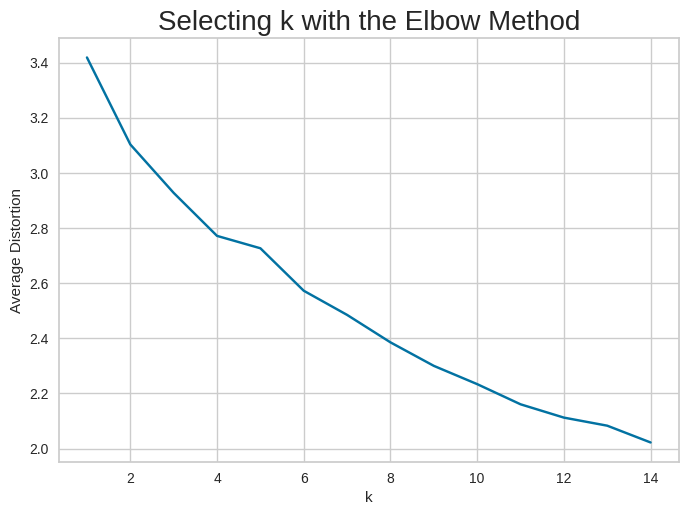

In [293]:
clusters = range(1, 15)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(data_scaled)  # Fit kMeans on the data
    prediction = model.predict(data_scaled)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(data_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / data_scaled.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

Check Elbow method for 3, 6 Clusters

5.1.2 Calculating Silhouette Score

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means.

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Silhouette score has a range of [-1, 1].

Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.
Silhouette score near -1 indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2, silhouette score is 0.15712547373040103
For n_clusters = 3, silhouette score is 0.16736838022713746
For n_clusters = 4, silhouette score is 0.20054304249027496
For n_clusters = 5, silhouette score is 0.22138351214065136
For n_clusters = 6, silhouette score is 0.21929566581554494
For n_clusters = 7, silhouette score is 0.20916351777560208
For n_clusters = 8, silhouette score is 0.21388690554072237
For n_clusters = 9, silhouette score is 0.21575030618627236
For n_clusters = 10, silhouette score is 0.21743919440111892
For n_clusters = 11, silhouette score is 0.2290636240322161
For n_clusters = 12, silhouette score is 0.2345373348154005
For n_clusters = 13, silhouette score is 0.24280676400171386
For n_clusters = 14, silhouette score is 0.2336338226654198


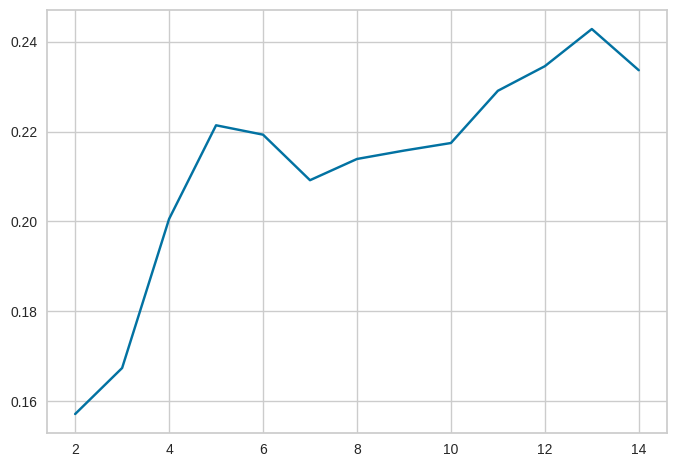

In [294]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 15))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((data_scaled))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(data_scaled, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

5.1.3 Score SilhouetteVisualizer

Below are the points that every cluster needs to satisfy for selecting the optimal K-value.

There should be no negative silhouette coefficent value
All the clusters should cross the avg silhouette score
All the clusters should have the different variations (width)
All the clusters should have different silhouette score
Note

Width of each cluster refers to the size of each cluster. (Number of data points present in each cluster)
Horizontal line refers to the Silhouette score of each cluster.
Dotted red line is an Average Silhouette score

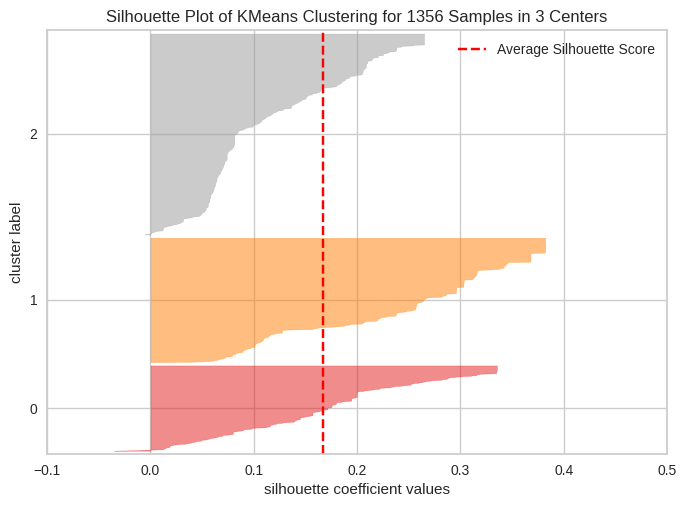

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1356 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [295]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

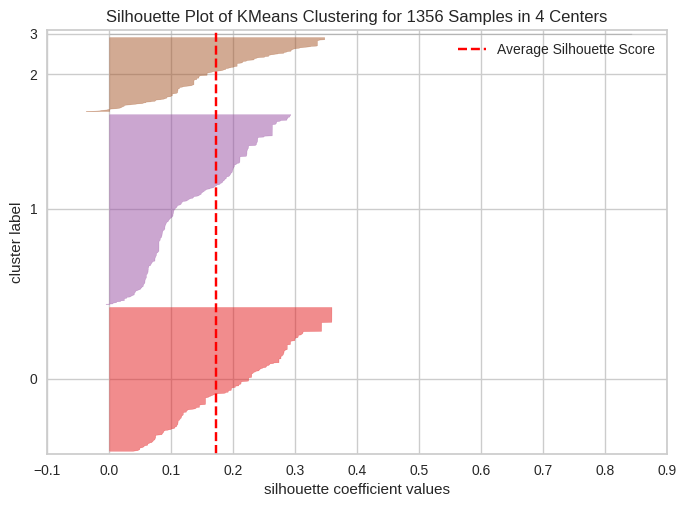

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1356 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [339]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

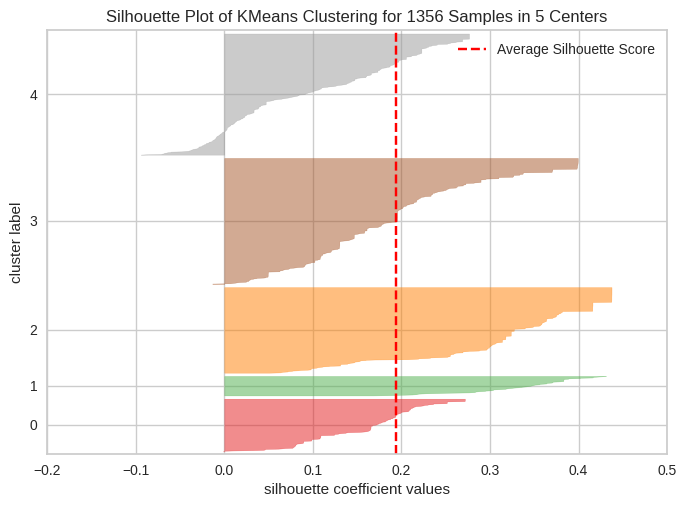

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1356 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [297]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

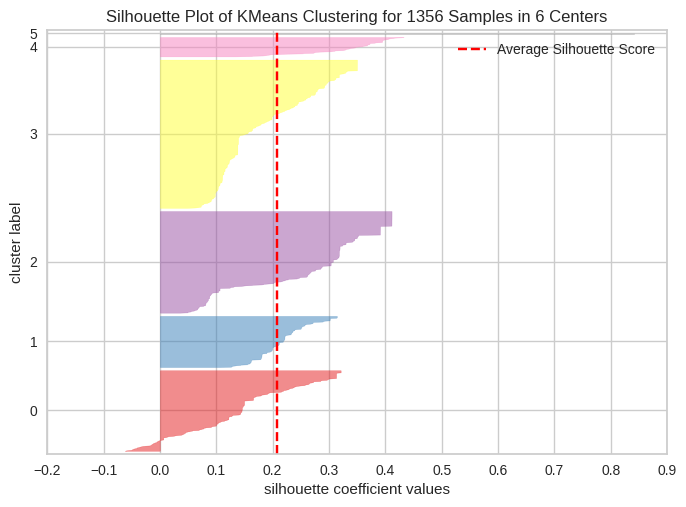

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1356 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [298]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

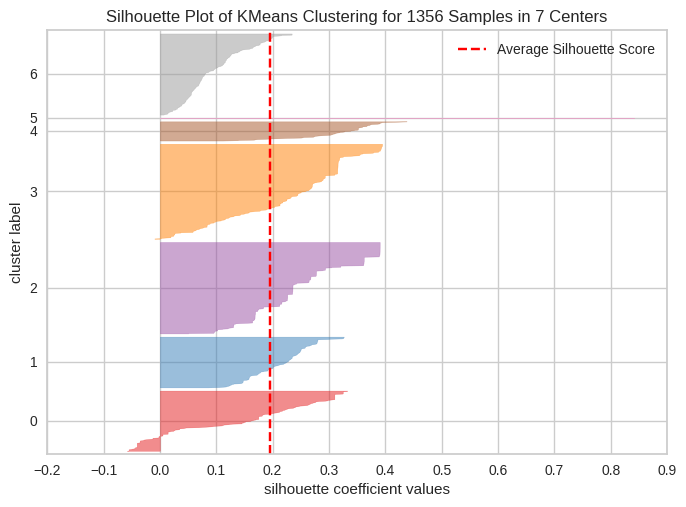

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1356 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [299]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

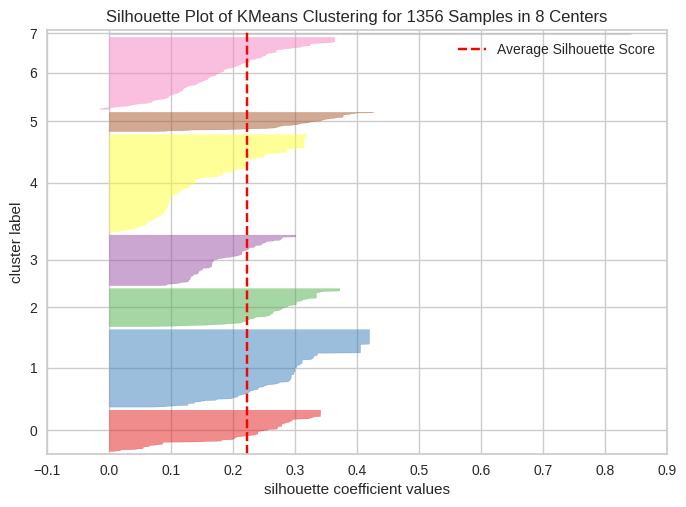

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1356 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [300]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

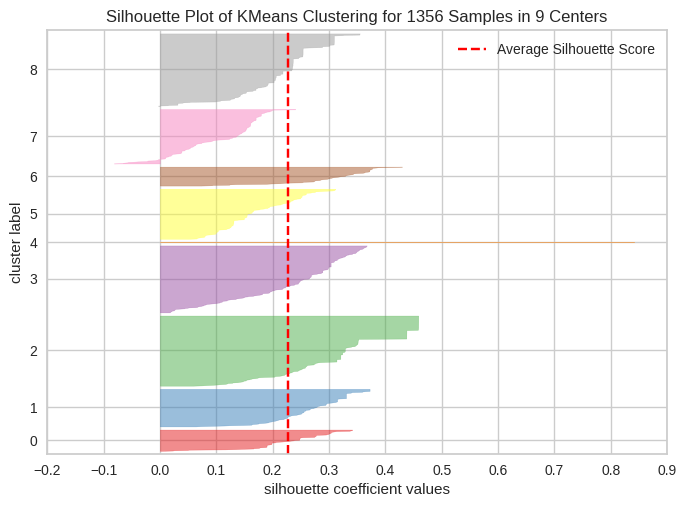

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1356 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [301]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

5.1.4 **Applying K Means**

In [308]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=1)

In [309]:
data_K_Means=data_pre_process.copy()

In [310]:
data_K_Means["K_means_segments"]=kmeans.labels_

In [311]:
data_K_Means

LeadGen                                   LinkedIn_Profile  \
0          1              https://www.linkedin.com/in/bajjarapu   
1          1   https://www.linkedin.com/in/kat-ashford-87383222   
2          1   https://www.linkedin.com/in/usha-karnala-966120a   
3          1            https://www.linkedin.com/in/stevegillam   
4          0       https://www.linkedin.com/in/mitesh-patel-mba   
...      ...                                                ...   
1351       1  https://www.linkedin.com/in/lan-anh-nguyen-678...   
1352       0  https://www.linkedin.com/in/priya-almelkar-17a...   
1353       0   https://www.linkedin.com/in/jan-mikrut-09667712/   
1354       0  https://www.linkedin.com/in/brian-tehako-38002...   
1355       1  https://www.linkedin.com/in/daliya-asuma-7632046/   

      LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                    1210.000                   1220.000  Bhaskar Ajjarapu   
1                     642.000                    629.000       Kat Ashford   
2                     810.000                    808.000      Usha Karnala   
3                    2449.375                   2371.875      Steve Gillam   
4                     741.000                    738.000      Mitesh Patel   
...                       ...                        ...               ...   
1351                  406.000                    407.000    Lan Anh Nguyen   
1352                 1278.000                   1009.000    Priya Almelkar   
1353                  339.000                    339.000        Jan Mikrut   
1354                 2449.375                   2371.875      Brian Tehako   
1355                  608.000                    612.000      Daliya Asuma   

                          Searched_Email Previous_Seniority_Level  \
0           bhaskar.ajjarapu@equifax.com                        C   
1          katherine.ashford@equifax.com                        C   
2               usha.karnala@equifax.com                        B   
3               steve.gillam@equifax.com                        C   
4               mitesh.patel@equifax.com                        C   
...                                  ...                      ...   
1351   lananh.nguyen@globalfoundries.com                        A   
1352  priya.almelkar@globalfoundries.com                        C   
1353                jmikrut@hehmeyer.com                        A   
1354                btehako@hehmeyer.com                        C   
1355              daliya.asuma@hilti.com                        A   

     Current_Seniority_Level     Previous_Company Previous_Company_Size  \
0                          A              Equifax                10001+   
1                          C              Equifax                10001+   
2                          B              Equifax                10001+   
3                          C              Equifax                10001+   
4                          C              Equifax                10001+   
...                      ...                  ...                   ...   
1351                       A      GlobalFoundries                10001+   
1352                       C      GlobalFoundries                10001+   
1353                       A             Hehmeyer                 Other   
1354                       C             Hehmeyer                 Other   
1355                       A  Hilti North America                10001+   

     Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                                FS                                 14124.0   
1                                FS                                 14124.0   
2                                FS                                 14124.0   
3                                FS                                 14124.0   
4                                FS                                 14124.0   
...                             ...                        

In [312]:
# let's see the names of the countries in each cluster
for cl in data_K_Means["K_means_segments"].unique():
    print("In cluster {}, Contacts are :".format(cl))
    print(data_K_Means[data_K_Means["K_means_segments"] == cl]["LinkedIn_Profile"].unique())
    print()

In cluster 0, Contacts are :
['https://www.linkedin.com/in/bajjarapu'
 'https://www.linkedin.com/in/stevegillam'
 'https://www.linkedin.com/in/paul-guerra-7433b09'
 'https://www.linkedin.com/in/soon-wong-6165202'
 'https://www.linkedin.com/in/mkmcinerney'
 'https://www.linkedin.com/in/paul-monette-4b19481'
 'https://www.linkedin.com/in/john-whitam'
 'https://www.linkedin.com/in/judy-champlin'
 'https://www.linkedin.com/in/ann-dixon-2b091323'
 'https://www.linkedin.com/in/kerrypeterson13'
 'https://www.linkedin.com/in/charlotte-niezgocki-ms-csm-1b27a914'
 'https://www.linkedin.com/in/roland-krcmar-4a7ab72/de'
 'https://www.linkedin.com/in/henry-vega-1381202/'
 'https://ca.linkedin.com/in/baldeepchadha'
 'https://ca.linkedin.com/in/kris-bygott-1906411'
 'https://www.linkedin.com/in/premshanker'
 'https://www.linkedin.com/in/bryanvidal/'
 'https://www.linkedin.com/in/swapna-d-869a454/'
 'https://ca.linkedin.com/in/tangcalvin'
 'https://www.linkedin.com/in/jos%C3%A9-jonathan-puertos-tavare

In [ ]:
# adding kmeans cluster labels to the original dataframe
#cluster_profile_k_means = data_K_Means.groupby("K_means_segments").mean()

In [ ]:
# let's display cluster profiles
#cluster_profile_k_means.style.highlight_max(color="red", axis=0)

In [ ]:
#fig, axes = plt.subplots(1, 5, figsize=(16, 6))
#fig.suptitle("Boxplot of numerical variables for each cluster")
#counter = 0
#for ii in range(5):
#    sns.boxplot(ax=axes[ii], y=data_K_Means[num_col[counter]], x=data_K_Means["K_means_segments"])
#    counter = counter + 1

#fig.tight_layout(pad=2.0)

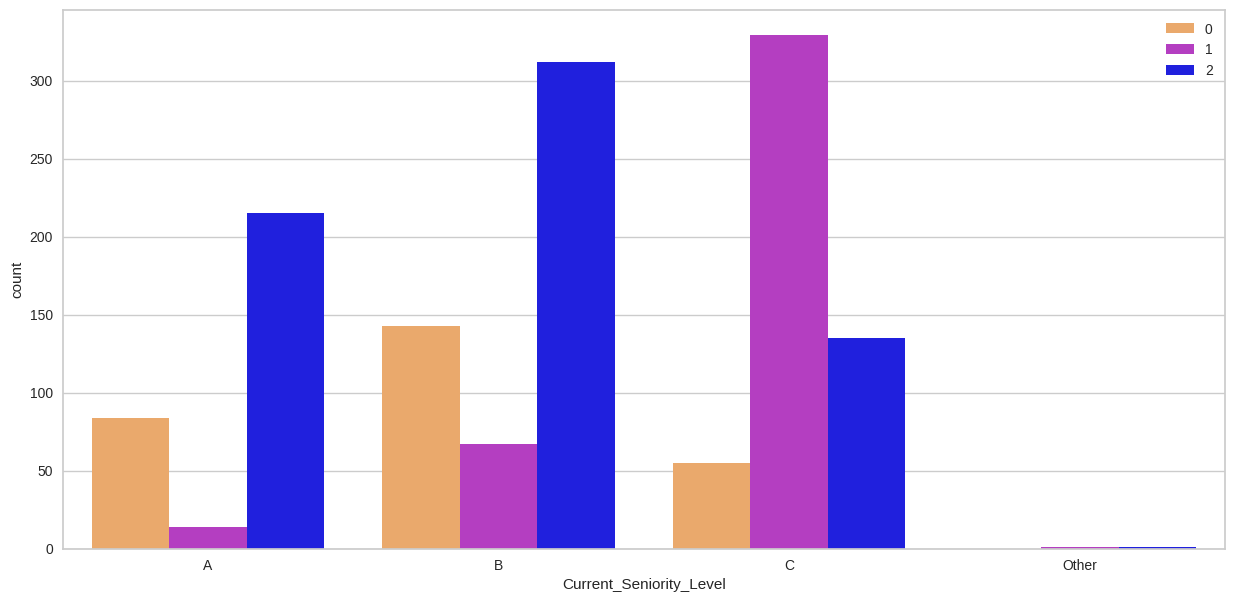

In [313]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_K_Means, x = data_K_Means["Current_Seniority_Level"],hue=data_K_Means["K_means_segments"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

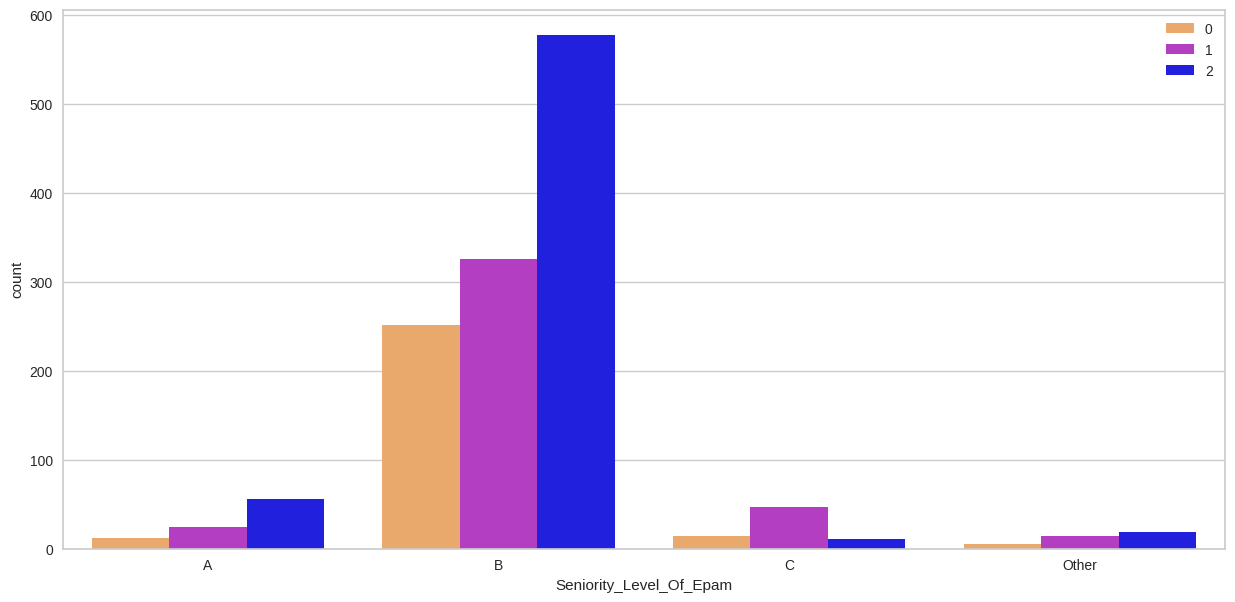

In [314]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_K_Means, x = data_K_Means["Seniority_Level_Of_Epam"],hue=data_K_Means["K_means_segments"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

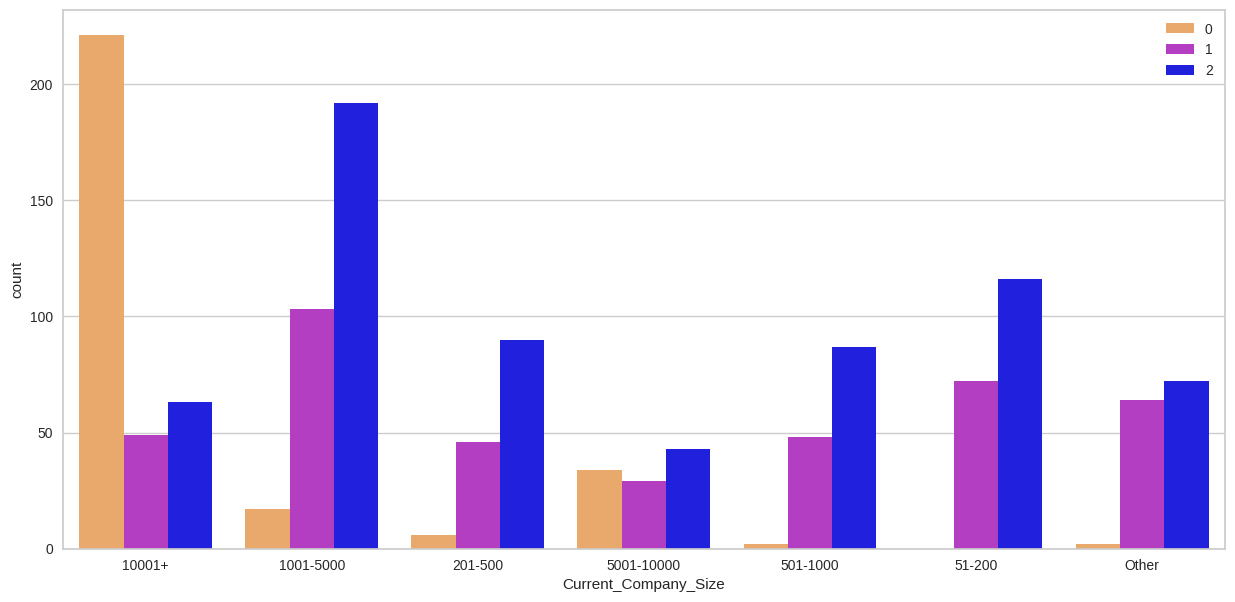

In [315]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_K_Means, x = data_K_Means["Current_Company_Size"],hue=data_K_Means["K_means_segments"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

5.2 **Hierarchical Clustering and PCA**

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree.

It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined.

That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms

In [316]:
# list of distance metrics
#distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
distance_metrics = ["euclidean", "chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8623050293681924.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7818117536427382.
Cophenetic correlation for Euclidean distance and average linkage is 0.8983268158951944.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8846523477674932.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8623259279027634.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7129923515079541.
Cophenetic correlation for Chebyshev distance and average linkage is 0.858603386718388.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8424330270154854.
Cophenetic correlation for Cityblock distance and single linkage is 0.8619207611747602.
Cophenetic correlation for Cityblock distance and complete linkage is 0.6874115465505796.
Cophenetic correlation for Cityblock distance and average linkage is 0.7950772349170527.
Cophenetic correlati

In [317]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8983268158951944, which is obtained with Euclidean distance and average linkage.


In [318]:
# list of linkage methods
linkage_methods = ["single", "complete","average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(data_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(data_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8623050293681924.
Cophenetic correlation for complete linkage is 0.7818117536427382.
Cophenetic correlation for average linkage is 0.8983268158951944.
Cophenetic correlation for centroid linkage is 0.874778427552903.
Cophenetic correlation for ward linkage is 0.464917305527687.
Cophenetic correlation for weighted linkage is 0.8846523477674932.


In [319]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8983268158951944, which is obtained with average linkage.


5.2.1 Cophenetic Correlation On Dendogram

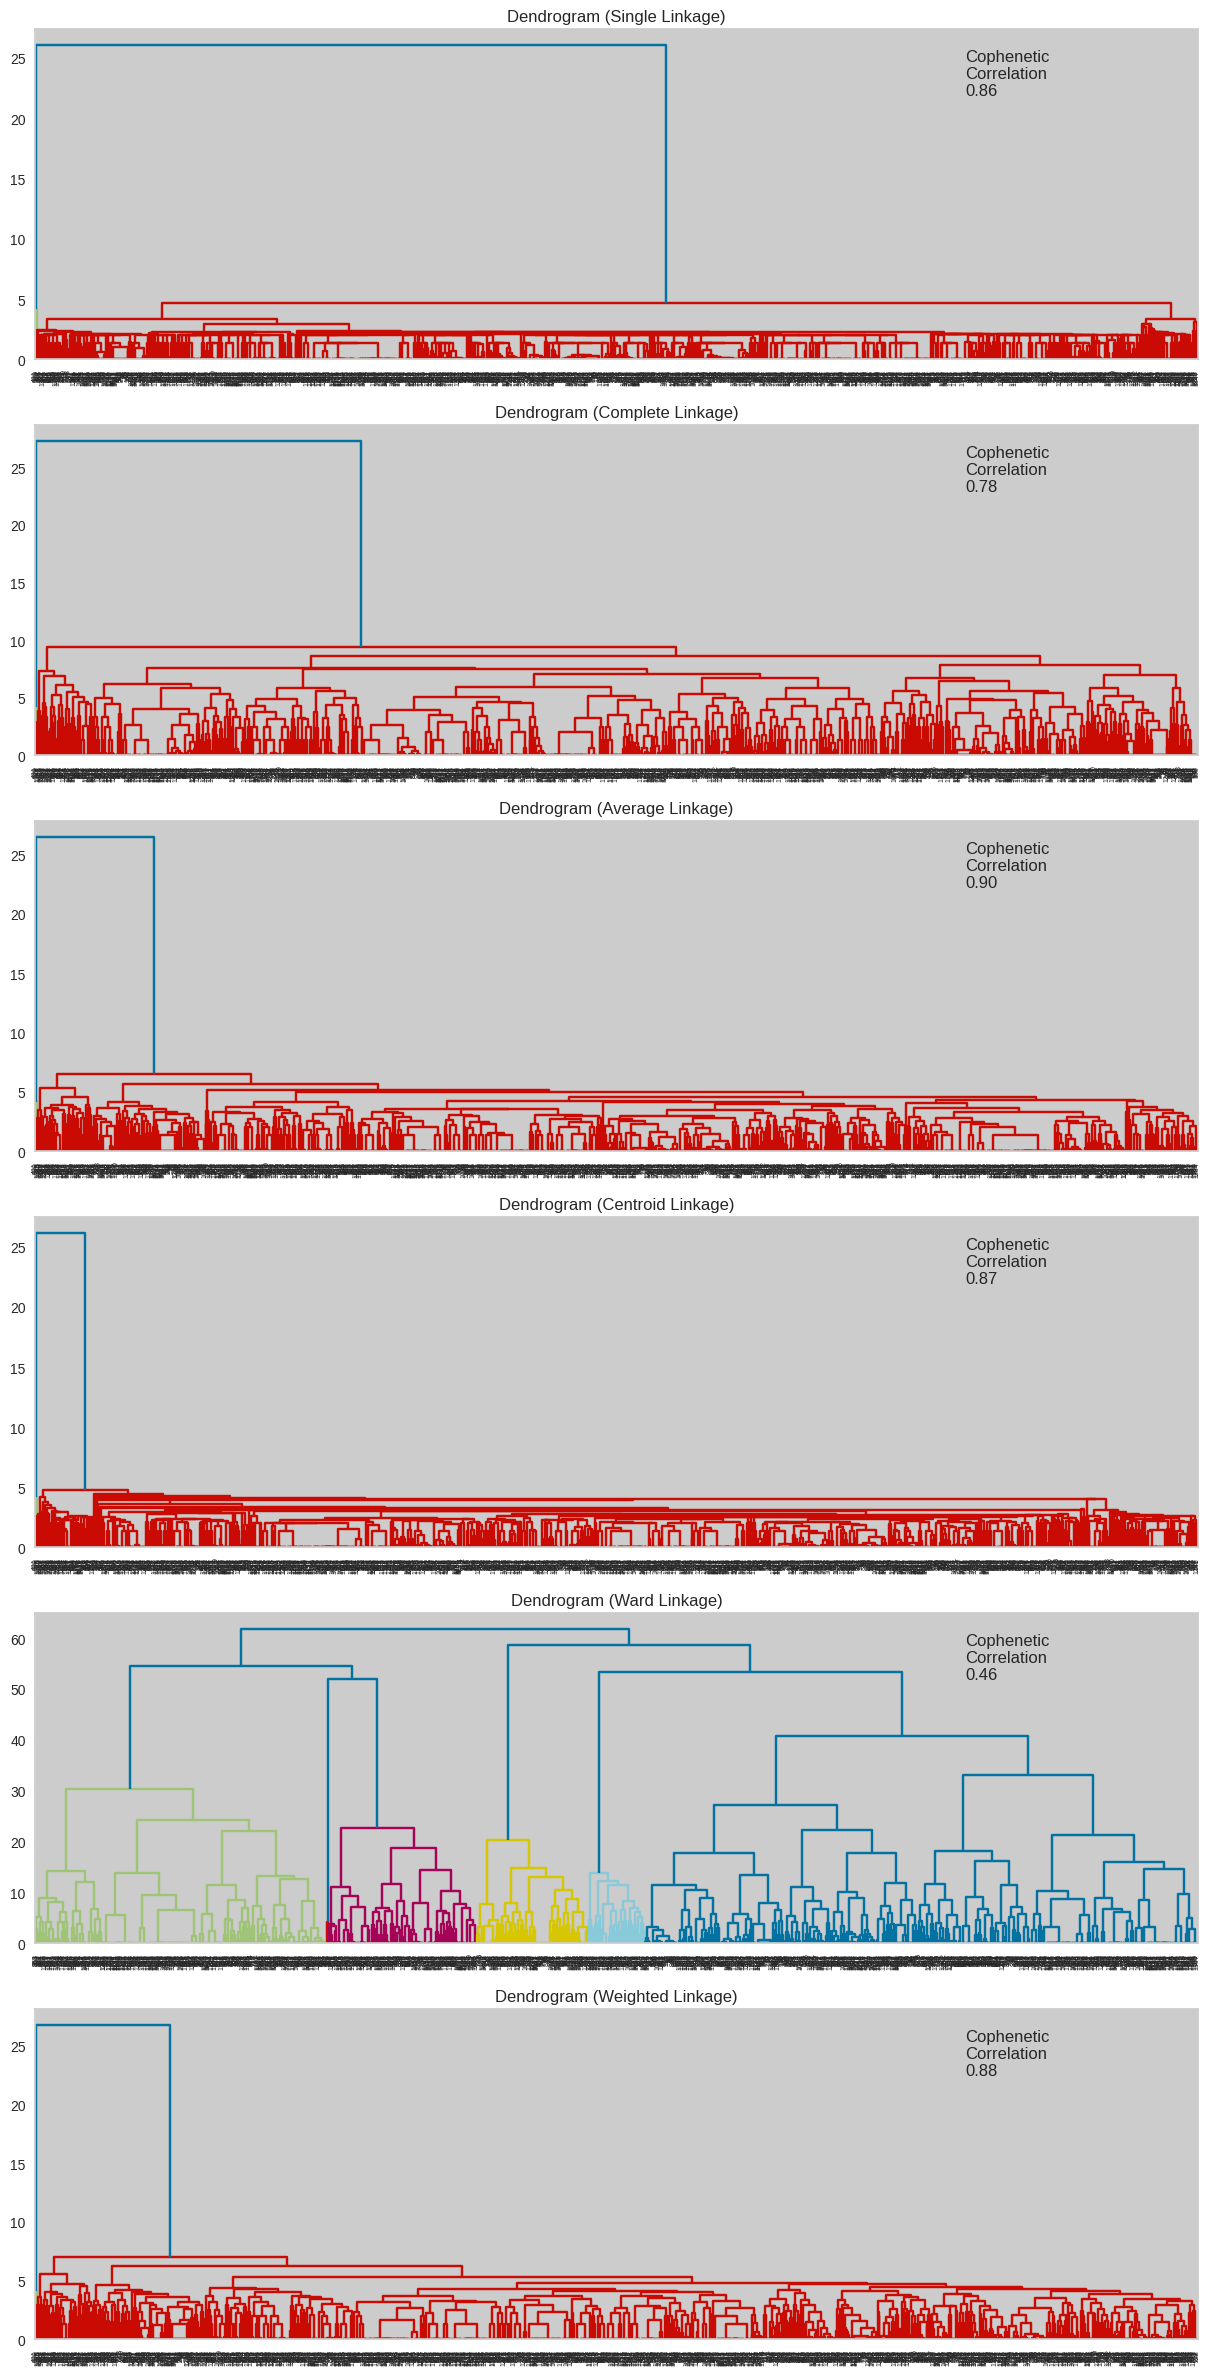

In [320]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**5.2.2 Agglomerative Clustering With Complete Linkage with Affinity Euclidean With 4 Clusters**

In [321]:
HCmodel_complete = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel_complete.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

**5.2.3 Cluster Profiling Complete Linkage with Affinity Euclidean With 4 Clusters**

In [322]:
data_hier_clustering_complete=data.copy()

In [323]:
datascaled_hier_clustering_complete=data_scaled.copy()

In [324]:
datascaled_hier_clustering_complete["HC_Clusters"] = HCmodel_complete.labels_


In [325]:
data_hier_clustering_complete["HC_Clusters"] = HCmodel_complete.labels_

In [326]:
data_hier_clustering_complete

LeadGen                                   LinkedIn_Profile  \
0           1              https://www.linkedin.com/in/bajjarapu   
1           1   https://www.linkedin.com/in/kat-ashford-87383222   
2           1   https://www.linkedin.com/in/usha-karnala-966120a   
3           1            https://www.linkedin.com/in/stevegillam   
4           0       https://www.linkedin.com/in/mitesh-patel-mba   
...       ...                                                ...   
1351        1  https://www.linkedin.com/in/lan-anh-nguyen-678...   
1352        0  https://www.linkedin.com/in/priya-almelkar-17a...   
1353        0   https://www.linkedin.com/in/jan-mikrut-09667712/   
1354        0  https://www.linkedin.com/in/brian-tehako-38002...   
1355        1  https://www.linkedin.com/in/daliya-asuma-7632046/   

      LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                      1210.0                     1220.0  Bhaskar Ajjarapu   
1                       642.0                      629.0       Kat Ashford   
2                       810.0                      808.0      Usha Karnala   
3                      3892.0                     3899.0      Steve Gillam   
4                       741.0                      738.0      Mitesh Patel   
...                       ...                        ...               ...   
1351                    406.0                      407.0    Lan Anh Nguyen   
1352                   1278.0                     1009.0    Priya Almelkar   
1353                    339.0                      339.0        Jan Mikrut   
1354                  18573.0                    17510.0      Brian Tehako   
1355                    608.0                      612.0      Daliya Asuma   

                          Searched_Email Previous_Seniority_Level  \
0           bhaskar.ajjarapu@equifax.com                        C   
1          katherine.ashford@equifax.com                        C   
2               usha.karnala@equifax.com                        B   
3               steve.gillam@equifax.com                        C   
4               mitesh.patel@equifax.com                        C   
...                                  ...                      ...   
1351   lananh.nguyen@globalfoundries.com                        A   
1352  priya.almelkar@globalfoundries.com                        C   
1353                jmikrut@hehmeyer.com                        A   
1354                btehako@hehmeyer.com                        C   
1355              daliya.asuma@hilti.com                        A   

     Current_Seniority_Level     Previous_Company Previous_Company_Size  \
0                          A              Equifax                10001+   
1                          C              Equifax                10001+   
2                          B              Equifax                10001+   
3                          C              Equifax                10001+   
4                          C              Equifax                10001+   
...                      ...                  ...                   ...   
1351                       A      GlobalFoundries                10001+   
1352                       C      GlobalFoundries                10001+   
1353                       A             Hehmeyer                 Other   
1354                       C             Hehmeyer                 Other   
1355                       A  Hilti North America                10001+   

     Previous_Company_Industry_EPAM  Previous_Company_Employess_On_Linkedin  \
0                                FS                                 14124.0   
1                                FS                                 14124.0   
2                                FS                                 14124.0   
3                                FS                                 14124.0   
4                                FS                                 14124.0   
...                             ...             

In [327]:
cluster_profile_complete = data_hier_clustering_complete.groupby("HC_Clusters").mean()

In [328]:
cluster_profile_complete["count_in_each_segments"] = (
    data_hier_clustering_complete.groupby("HC_Clusters")["Current_Seniority_Level"].count().values
)

In [329]:
# let's see the names of the countries in each cluster
for cl in data_hier_clustering_complete["HC_Clusters"].unique():
    print("In cluster {}, Customers are :".format(cl))
    print(data_hier_clustering_complete[data_hier_clustering_complete["HC_Clusters"] == cl]["Searched_Email"].unique())
    print()

In cluster 0, Customers are :
['bhaskar.ajjarapu@equifax.com' 'katherine.ashford@equifax.com'
 'usha.karnala@equifax.com' ... 'jmikrut@hehmeyer.com'
 'btehako@hehmeyer.com' 'daliya.asuma@hilti.com']

In cluster 2, Customers are :
['guido.dicesare@cantire.com' 'amavrommati@slb.com' 'mike.brisk@abc.com'
 'shapiro-ying@aramark.com' 'shkothari@ebay.com' 'gautam@workfusion.com'
 'cyril.perducat@schneider-electric.com' 'kmulligan@coloniallife.com'
 'alan.mace@thomsonreuters.com' 'chris.moltenbrey@thomsonreuters.com'
 'james.lander@thomsonreuters.com' 'kevin.rhoades@thomsonreuters.com'
 'troy.yung@thomsonreuters.com' 'avillanova@bioreference.com'
 'chardy@toryburch.com' 'jconigliaro@toryburch.com'
 'mmootrey@toryburch.com' 'rmaupin@toryburch.com' 'htanner@plex.com'
 'ealfson@plex.com' 'cathy.loveless@nbcuni.com' 'david.greco@pnc.com'
 'chirranjeevi.gopal@tri.global' 'jonathan.pond@kronos.com'
 'jared.deluca@keurig.com' 'bryce.avila.contractor@kdrp.com'
 'lisa.mumford@kronos.com' 'maira.santos

**5.3 Dimensionality Reduction using PCA for visualization**

In [330]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 5
pca = PCA(n_components=5)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(data_scaled)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2",'Component 3','Component 4','Component 5']
)

In [331]:
pca.explained_variance_ratio_.sum()

0.6096697833450878

In [332]:
pca.explained_variance_ratio_

array([0.20033917, 0.14691709, 0.09736278, 0.0864112 , 0.07863955])

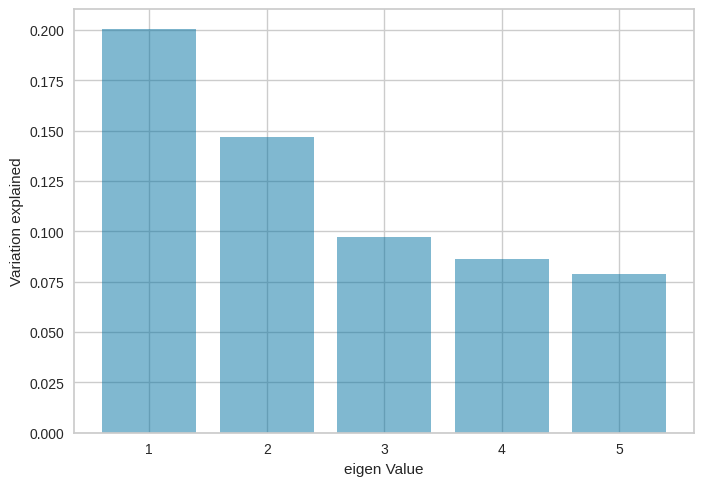

In [333]:
plt.bar(list(range(1,6)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [334]:
pca.components_

array([[-0.07853542,  0.39605   ,  0.29579085,  0.32682078, -0.3727502 ,
        -0.01707041,  0.37594201, -0.40371796, -0.00986312,  0.0329469 ,
        -0.05332711, -0.34195162,  0.27957176],
       [ 0.01756018,  0.40788981,  0.37374923, -0.32963807,  0.36348238,
        -0.03011778, -0.3111488 ,  0.32259822, -0.01699255,  0.00928397,
        -0.03923615, -0.32107316,  0.38217233],
       [ 0.01697016, -0.17280007,  0.0808097 , -0.04380691,  0.0273867 ,
         0.00678015, -0.00234182, -0.04342257,  0.19164019,  0.03060632,
         0.79966224, -0.4762097 , -0.23413201],
       [ 0.12747924,  0.01043696, -0.02567138, -0.38048335, -0.16568454,
         0.86976132, -0.03415963, -0.21437771, -0.06230127,  0.01897062,
        -0.00346734, -0.00215635,  0.05380252],
       [-0.43427988,  0.02470533,  0.01786702,  0.03878686, -0.04094437,
         0.13420801, -0.08041913,  0.03741224,  0.61652203, -0.62671963,
        -0.06320336,  0.0524759 ,  0.04226747]])

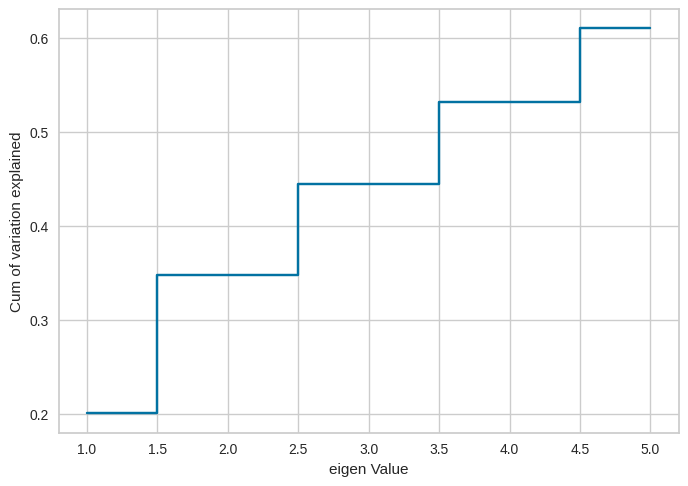

In [335]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

5.3.1 Dimensionality Reduction using PCA to two components

In [336]:
pca2 = PCA(n_components=2)
pca2.fit(data_scaled)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
Xpca2 = pca2.transform(data_scaled)

[[-0.07853543  0.39605     0.29579085  0.32682087 -0.37275009 -0.01707038
   0.37594192 -0.40371806 -0.00986313  0.0329469  -0.05332711 -0.34195163
   0.27957176]
 [ 0.01756015  0.40788975  0.37374932 -0.32963608  0.36348473 -0.03011712
  -0.31115072  0.32259586 -0.01699275  0.00928402 -0.03923628 -0.3210732
   0.38217223]]
[0.20033917 0.14691709]


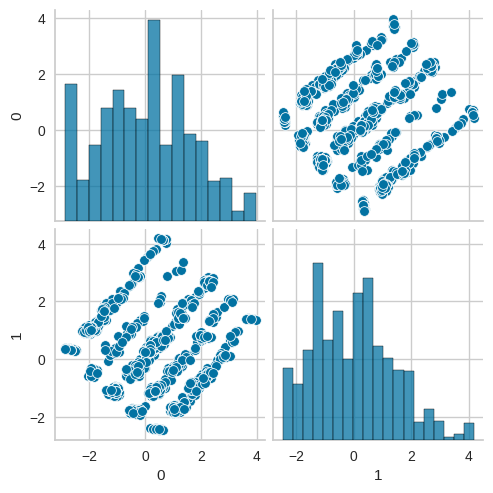

In [337]:
sns.pairplot(pd.DataFrame(Xpca2))

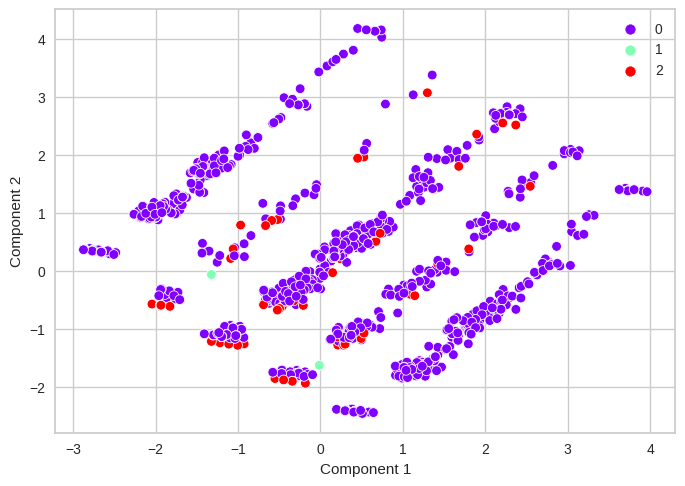

In [338]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data_hier_clustering_complete["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))